# ultimate-gplearn-3D

In [1]:
### 导入相关内容
import sys
import os
sys.path.append(f"{os.path.abspath(os.path.join(os.getcwd(), '../..'))}/ultimate-gplearn/")
sys.path.append(f"{os.path.abspath(os.path.join(os.getcwd(), '../..'))}/factor-test/")
from Signal_generator import *
from factor_evaluation_v3 import *
import numpy as np
import pandas as pd
import genetic
from IPython.core.interactiveshell import InteractiveShell
import warnings
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', True)
# pd.set_option('display.unUicode.ambiguous_as_wide', True)
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
import random
# from add_ts_function import dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_delay, ts_delta, ts_dema, ts_kama, ts_midpoint, ts_beta, ts_linearreg_angle, ts_linearreg_slope, ts_correl, ts_ht_dcphase, ts_atr, ts_avgprice, ts_bbands, ts_bop, ts_cci, ts_ht_dcperiod, ts_ht_phasor, ts_ht_sine, ts_ht_trendmode, ts_macd, ts_medprice, ts_mfi, ts_mom, ts_natr, ts_obv, ts_roc, ts_rsi, ts_sma, ts_stoch, ts_trange, ts_typprice, ts_wclprice, ts_willr
from add_ts_function import *
from functions import _function_map
from add_ts_function import _extra_function_map
import os
import traceback

In [2]:
def make_XY(df, index_name, columns_name, Y_column1,):
    '''
    return: X: ndarray[n_dates, n_feature, n_stocks], Y: ndarray[n_dates, n_stocks], X_feature_names
    '''
    df = df.pivot_table(index=[index_name], columns=[columns_name], sort=False, dropna=False)
    Y1 = df.loc[:,(Y_column1,)].to_numpy(dtype=np.double)

    df = df.drop([Y_column1,],axis=1)
    X_0_len = len(df.index)
    # df.columns.levels[0] not change after drop
    X_1_len = len(df.columns.levels[0]) - 1
    X_2_len = len(df.columns.levels[1])
    return df.to_numpy(dtype=np.double).reshape((X_0_len, X_1_len, X_2_len)), Y1, df.columns.levels[0].drop([Y_column1,])


In [11]:
bar = pd.read_parquet(f"../data/usdt_4h_kline_bar_2020_10_01_to_now.parquet")

# symbol_lis = ['1000LUNCUSDT', '1000SHIBUSDT', '1INCHUSDT', 'AAVEUSDT', 'ADAUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARPAUSDT', 'ARUSDT', 'ATAUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLZUSDT', 'BNBUSDT', 'BTCDOMUSDT', 'BTCSTUSDT', 'BTCUSDT', 'CELOUSDT', 'CHZUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVXUSDT', 'DARUSDT', 'DASHUSDT', 'DENTUSDT', 'DGBUSDT', 'DOGEUSDT', 'DOTUSDT', 'DUSKUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FILUSDT', 'FLMUSDT', 'FLOWUSDT', 'FOOTBALLUSDT', 'FTMUSDT', 'FTTUSDT', 'GALAUSDT', 'GALUSDT', 'GMTUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'IMXUSDT', 'INJUSDT', 'IOSTUSDT', 'IOTAUSDT', 'IOTXUSDT', 'JASMYUSDT', 'KAVAUSDT', 'KLAYUSDT', 'KNCUSDT', 'KSMUSDT', 'LDOUSDT', 'LINAUSDT', 'LINKUSDT', 'LITUSDT', 'LPTUSDT', 'LRCUSDT', 'LTCUSDT', 'LUNA2USDT', 'MANAUSDT', 'MASKUSDT', 'MATICUSDT', 'MKRUSDT', 'MTLUSDT', 'NEARUSDT', 'NEOUSDT', 'NKNUSDT', 'OCEANUSDT', 'OGNUSDT', 'OMGUSDT', 'ONEUSDT', 'ONTUSDT', 'OPUSDT', 'PEOPLEUSDT', 'QNTUSDT', 'QTUMUSDT', 'RAYUSDT', 'REEFUSDT', 'RENUSDT', 'RLCUSDT', 'ROSEUSDT', 'RSRUSDT', 'RUNEUSDT', 'RVNUSDT', 'SANDUSDT', 'SCUSDT', 'SFPUSDT', 'SKLUSDT', 'SNXUSDT', 'SOLUSDT', 'SPELLUSDT', 'SRMUSDT', 'STGUSDT', 'STMXUSDT', 'STORJUSDT', 'SUSHIUSDT', 'SXPUSDT', 'THETAUSDT', 'TOMOUSDT', 'TRBUSDT', 'TRXUSDT', 'UNFIUSDT', 'UNIUSDT', 'VETUSDT', 'WAVESUSDT', 'WOOUSDT', 'XEMUSDT', 'XLMUSDT', 'XMRUSDT', 'XRPUSDT', 'XTZUSDT', 'YFIUSDT', 'ZECUSDT', 'ZENUSDT', 'ZILUSDT', 'ZRXUSDT', 'TLMUSDT', 'BNXUSDT']
bar = bar.loc[bar.index.get_level_values(0) > pd.to_datetime('2023-06-01', utc=True)]
bar["takerlongshortratio_buySellRatio"] = bar["taker_buy_v"] / (bar["volume"] - bar["taker_buy_v"])

In [ ]:
bigdata = pd.read_parquet(f"{os.path.abspath(os.path.join(os.getcwd(), '../..'))}/GPLearnFinance3D/data/usdt_4h_bigdata_2020_10_01_to_now.parquet")
symbol_lis = list(set(bar.index.get_level_values(1).unique()).intersection(set(bigdata.index.get_level_values(1).unique())))
bar.loc[(bigdata.index.get_level_values(0).unique(), symbol_lis), bigdata.columns] = bigdata
bar = bar.loc[(bigdata.index.get_level_values(0).unique(), symbol_lis), :].unstack().stack()

In [ ]:
dexdata = pd.read_parquet(f"{os.path.abspath(os.path.join(os.getcwd(), '../..'))}/GPLearnFinance3D/data/usdt_4h_dexdata_2020_10_01_to_now.parquet")
symbol_lis = list(set(bar.index.get_level_values(1).unique()).intersection(set(dexdata.index.get_level_values(1).unique())))
bar.loc[(dexdata.index.get_level_values(0).unique(), symbol_lis), dexdata.columns] = dexdata
bar = bar.loc[(dexdata.index.get_level_values(0).unique(), symbol_lis), :].unstack().stack()

In [12]:
import sys
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import inspect
# sys.path.append('/home/ubuntu/quantlab_v2/Experiments/URT/Python')
# import CyURT as urt
import statsmodels.regression.linear_model as sm
from tqdm import tqdm
import inspect
from numba import jit,prange
from joblib import Parallel,delayed
import numba
import numba as nb
nb.config.NUMBA_DEFAULT_NUM_THREADS=4
# import cvxpy as cp

# import talib as ta
# import pandas_ta as pta

def make_XY(df, index_name, columns_name, Y_column1,):
    '''
    return: X: ndarray[n_dates, n_feature, n_stocks], Y: ndarray[n_dates, n_stocks], X_feature_names
    '''
    df = df.pivot_table(index=[index_name], columns=[columns_name], sort=False, dropna=False)
    Y1 = df.loc[:,(Y_column1,)].to_numpy(dtype=np.double)

    df = df.drop([Y_column1,],axis=1)
    X_0_len = len(df.index)
    # df.columns.levels[0] not change after drop
    X_1_len = len(df.columns.levels[0]) - 1
    X_2_len = len(df.columns.levels[1])
    return df.to_numpy(dtype=np.double).reshape((X_0_len, X_1_len, X_2_len)), Y1, df.columns.levels[0].drop([Y_column1,])


import re
def cal_gplearn_factor(factor, data, different_axis, _function_map, _extra_function_map):

    X, Y, feature_names = make_XY(data, *different_axis)
    
    
    feature_dictionary = {}
    for index, feature in enumerate(feature_names):
        feature_dictionary[feature] = "trainX[:,{},:]".format(index)

    
    trainX, Y = X, Y

    ts_lis = pd.unique(data[different_axis[0]]).tolist()
    symbol_lis = pd.unique(data[different_axis[1]]).tolist()
    
    all_cal_dictionary = dict(list(_function_map.items()) + list(_extra_function_map.items()))
    
    formulation = factor
    
    # Use regular expressions to find the number in the string
    if len(re.findall(r'-?\d+\.\d+', formulation)) > 0:
        # Use regular expressions to find all the numbers in the string
        numbers = re.findall(r'-?\d+\.\d+', formulation)
    
        # Replace each number with the desired string
        new_string = formulation
        for number in numbers:
            new_string = new_string.replace(number,
                                            "np.tile({}, (trainX.shape[0], trainX.shape[2]))".format(
                                                number))
        formulation = new_string
    for feature, feature_input in feature_dictionary.items():
        formulation = re.sub(r"(?<![a-zA-Z])" + re.escape(feature) + r"(?![a-zA-Z])", feature_input, formulation)

    for function_name, _function in all_cal_dictionary.items():
        formulation = re.sub(r"\b" + re.escape(function_name) + r"\b", "all_cal_dictionary['{}']".format(function_name), formulation)
        
    factor_df = pd.DataFrame(eval(formulation), index=ts_lis, columns=symbol_lis).stack()
    
    return factor_df
    


@jit(nopython=True,nogil=True,parallel=True)
def calc_zscore_2d(series,rolling_window):
    res=series.copy()#初始填充原始值，不是nan
    symbol_num=len(series[0,:])
    for i in prange(rolling_window,len(series)):
        temp=series[i+1-rolling_window:i+1,:]
        # s_mean=np.nanmean(temp,axis=0)
        # s_std=np.nanstd(temp,axis=0)
        for j in prange(symbol_num):
            s_mean=np.nanmean(temp[:,j])
            s_std=np.nanstd(temp[:,j])
            res[i,j] = (series[i,j]-s_mean)/max(s_std,10e-9)
    return res

def calc_zscore_2d_parallel(series,rolling_window,n_jobs=-2):
    symbol_num=len(series[0,:])
    last_num=symbol_num%10
    chunk_slice=list(np.arange(symbol_num-last_num).reshape(-1,10))
    chunk_slice.append(list(range(symbol_num-last_num,symbol_num)))
    task_res=Parallel(n_jobs=n_jobs)(delayed(calc_zscore_2d)(series[:,select_slice],rolling_window) for select_slice in chunk_slice)
    res=np.hstack(task_res)
    return res

@jit(nopython=True,nogil=True,parallel=True)
def calc_zscore_cross_section(series):
    res=series.copy()
    symbol_num=len(series[0,:])
    for i in prange(len(series)):
        temp = series[i, :]
        s_mean = np.nanmean(temp)
        s_std = np.nanstd(temp)
        for j in prange(symbol_num):
            res[i, j] = (series[i, j] - s_mean) / max(s_std, 10e-9)
    return res


from copy import deepcopy
class Factor_calculator:
    """
    外部定义函数，函数名即为因子名
    """

    def __init__(self, bar):
        self.bar = deepcopy(bar.unstack().stack())
        self.bar['return_1'] = (self.bar['close'].unstack().diff(1).shift(-1) / self.bar['close'].unstack()).stack()
        self.bar = self.bar.unstack().iloc[:-1].stack()

        symbol_lis = self.bar.return_1.unstack().isna().sum(axis=0)[
            self.bar.return_1.unstack().isna().sum(axis=0) == 0].index.tolist()
        missing_symbol = list(set(self.bar.index.get_level_values(1).unique()).difference(set(symbol_lis)))
        if len(missing_symbol) == 0:
            pass
        else:
            print('数据有缺失', list(set(self.bar.index.get_level_values(1).unique()).difference(set(symbol_lis))))
            
        self.bar = self.bar.loc[(slice(None), symbol_lis), :]

        m = len(self.bar.open.unstack().columns)
        n = len(self.bar.open.unstack().index)
        benchmark_Open = pd.DataFrame(np.array(self.bar.open.unstack()['BTCUSDT'].values.tolist() * m).reshape(m, n).T)
        benchmark_close = pd.DataFrame(
            np.array(self.bar.close.unstack()['BTCUSDT'].values.tolist() * m).reshape(m, n).T)

        self.data_dict = {'Open': self.bar.open.unstack(), 'close': self.bar.close.unstack(),
                          'high': self.bar.high.unstack(),
                          'low': self.bar.low.unstack(), 'volume': self.bar.volume.unstack(),
                          'vwap': self.bar.vwap.unstack(),
                          'amount': self.bar.usd_v.unstack(),
                          'usd_v': self.bar.usd_v.unstack(),
                          'n_trades': self.bar.n_trades.unstack(),
                          'returns': bar.close.unstack() / bar.close.unstack().shift(1) - 1,
                          'benchmark_Open': benchmark_Open, 'benchmark_close': benchmark_close}

    def calculate_factor(self, factor_lis, hyper_param_lis=None, factor_type='gplearn'):
        if factor_type == 'gplearn':
            different_axis = ['ts', 'symbol', 'return_1']
            for factor in factor_lis:
                try:
                    factor_df = cal_gplearn_factor(factor, self.bar.reset_index(), different_axis, _function_map=_function_map, _extra_function_map=_extra_function_map)
                    self.bar[factor] = factor_df
                except:
                    import traceback
                    traceback.print_exc()
                    print(f'{factor}出现问题')
        else:
            for func in factor_lis:
                try:
                    if hyper_param_lis:
                        for res in hyper_param_lis:
                            factor, best_param, study, factor_stable = res
                            if func == factor and best_param != None:
                                sig = inspect.signature(eval(func))
                                for param in sig.parameters:
                                    if param in ['Open', 'close', 'high', 'low', 'vwap', 'volume', 'amount', 'usd_v', 'n_trades',
                                                  'returns', 'benchmark_Open', 'benchmark_close']:
                                        best_param[param] = self.data_dict[param]
                                self.bar[func] = self._generate_bar_factor(func, best_param).stack()
                    else:
                        best_param = {}
                        sig = inspect.signature(eval(func))
                        for param in sig.parameters:
                            if param in ['Open', 'close', 'high', 'low', 'vwap', 'volume', 'amount', 'usd_v', 'n_trades',
                                                  'returns', 'benchmark_Open', 'benchmark_close']:
                                best_param[param] = self.data_dict[param]
                        self.bar[func] = self._generate_bar_factor(func, best_param).stack()
                except:
                    import traceback
                    traceback.print_exc()
                    print(f'{func}出现问题')

        return self.bar

    def _generate_bar_factor(self, func, params):
        return eval(f"{func}(**params)")
    


In [13]:
factor_calculator = Factor_calculator(bar)
data = factor_calculator.bar

数据有缺失 ['BSVUSDT', 'XAIUSDT', 'ALTUSDT', 'BIGTIMEUSDT', 'WLDUSDT', 'MBLUSDT', 'BICOUSDT', 'OMUSDT', 'PIXELUSDT', 'NMRUSDT', '1000BONKUSDT', 'PENDLEUSDT', 'AUCTIONUSDT', 'HIFIUSDT', 'USTCUSDT', 'WAXPUSDT', 'POLYXUSDT', 'ONGUSDT', 'BEAMXUSDT', 'STEEMUSDT', 'RONINUSDT', 'GLMUSDT', 'BNTUSDT', 'SLPUSDT', 'TIAUSDT', 'STRKUSDT', 'AGLDUSDT', 'ARKMUSDT', 'XVGUSDT', 'NTRNUSDT', 'CYBERUSDT', 'MDTUSDT', 'PORTALUSDT', 'POWRUSDT', 'ORBSUSDT', 'GASUSDT', 'CAKEUSDT', 'ILVUSDT', 'PYTHUSDT', 'ZETAUSDT', 'ORDIUSDT', 'DYMUSDT', 'BADGERUSDT', 'ACEUSDT', 'DODOXUSDT', 'STRAXUSDT', 'BONDUSDT', 'RIFUSDT', 'ONDOUSDT', 'LOOMUSDT', 'OXTUSDT', 'LSKUSDT', 'WIFUSDT', 'SEIUSDT', 'FRONTUSDT', 'SUPERUSDT', 'SNTUSDT', 'MEMEUSDT', 'MAVIAUSDT', 'STPTUSDT', 'NFPUSDT', 'ARKUSDT', 'JUPUSDT', 'MOVRUSDT', '1000RATSUSDT', 'TOKENUSDT', 'TWTUSDT', 'ETHWUSDT', '1000SATSUSDT', 'GLMRUSDT', 'MANTAUSDT', 'MAVUSDT', 'COMBOUSDT', 'JTOUSDT', 'AIUSDT', 'KASUSDT', 'YGGUSDT']


In [14]:
from numba import jit,prange
import numba as nb


@jit(nopython=True,nogil=True,parallel=True)
def calc_zscore_2d(series,rolling_window):
    res=series.copy()#初始填充原始值，不是nan
    symbol_num=len(series[0,:])
    for i in prange(rolling_window,len(series)):
        temp=series[i+1-rolling_window:i+1,:]
        # s_mean=np.nanmean(temp,axis=0)
        # s_std=np.nanstd(temp,axis=0)
        for j in prange(symbol_num):
            s_mean=np.nanmean(temp[:,j])
            s_std=np.nanstd(temp[:,j])
            res[i,j] = (series[i,j]-s_mean)/max(s_std,10e-9)
    return res

In [15]:
# 先进行原始数据集的时许标准化 

col_lis = data.columns[:-1]
normalized_data = data.copy()
for factor in col_lis:
    normalized_data[factor] = pd.DataFrame(calc_zscore_2d(normalized_data[factor].unstack().values, 180),
                          index=normalized_data[factor].unstack().index,
                          columns=normalized_data[factor].unstack().columns).stack()
    

In [16]:
# total_train_df = data.loc[(data.index.get_level_values(0) > pd.to_datetime('2022-01-01', utc=True)) & (data.index.get_level_values(0) <= pd.to_datetime('2022-12-01', utc=True))].reset_index()
# total_eval_df = data.loc[(data.index.get_level_values(0) > pd.to_datetime('2022-12-01', utc=True)) & (data.index.get_level_values(0) <= pd.to_datetime('2023-12-01', utc=True))].reset_index()


different_axis = ['ts', 'symbol', 'return_1']
X,Y, feature_names = make_XY(data.reset_index(), *different_axis)
# eval_X,eval_Y, _ = make_XY(total_eval_df, *different_axis)


# X = np.concatenate([train_X,eval_X],axis=0)
# Y = np.concatenate([train_Y,eval_Y],axis=0)
X_feature_names = feature_names
sample_weight = []
# sample_weight.extend([1]*train_X.shape[0])
# sample_weight.extend([0]*eval_X.shape[0])
sample_weight.extend([1]*X.shape[0])
sample_weight = np.array(sample_weight)
max_samples = X.shape[0]

total_train_df = normalized_data.loc[(normalized_data.index.get_level_values(0) > pd.to_datetime('2022-01-01', utc=True)) & (normalized_data.index.get_level_values(0) <= pd.to_datetime('2022-12-01', utc=True))].reset_index()
total_eval_df = normalized_data.loc[(normalized_data.index.get_level_values(0) > pd.to_datetime('2022-12-01', utc=True)) & (normalized_data.index.get_level_values(0) <= pd.to_datetime('2023-12-01', utc=True))].reset_index()


different_axis = ['col', 'symbol', 'return_1']
train_X,train_Y, feature_names = make_XY(total_train_df, *different_axis)
eval_X,eval_Y, _ = make_XY(total_eval_df, *different_axis)


X = np.concatenate([train_X,eval_X],axis=0)
Y = np.concatenate([train_Y,eval_Y],axis=0)
X_feature_names = feature_names
sample_weight = []
sample_weight.extend([1]*train_X.shape[0])
sample_weight.extend([0]*eval_X.shape[0])
sample_weight = np.array(sample_weight)

In [17]:

# function_set_sample = ['common_add'] #'std_10'

# my_function = [ts_atr]
"""
function_set_sample = ['common_add', 'common_sub', 'common_mul', 'common_div',
                       'common_log', 'common_sqrt', 'common_abs', 'common_inv', 'common_max', 'common_min', 'common_tan',] #'std_10'

my_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_dema,
               ts_kama, ts_midpoint, ts_beta, ts_linearreg_angle, ts_linearreg_slope, ts_correl]

my_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_delay, ts_delta, ts_dema,
               ts_kama, ts_midpoint, ts_beta, ts_linearreg_angle, ts_linearreg_slope, ts_correl, ts_ht_dcphase, ts_atr, ts_natr,
               ts_avgprice, ts_bbands, ts_bop, ts_cci, ts_ht_dcperiod, ts_ht_phasor, ts_ht_sine, ts_ht_trendmode, ts_macd,
               ts_medprice, ts_mfi, ts_mom, ts_natr, ts_obv, ts_roc, ts_rsi, ts_sma, ts_stoch, ts_trange, ts_typprice, ts_wclprice, ts_willr]
"""            
function_set_sample = []
my_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_delay, ts_delta, ts_bbands, ts_dema, ts_ht_trendmode, ts_kama, ts_midpoint,
                ts_midprice, ts_sar, ts_sma, ts_tema, ts_trima, ts_adx, ts_adxr, ts_apo, ts_stochrsi, ts_aroonosc, ts_bop, ts_cci, ts_cmo, ts_dx,
                ts_macd, ts_mfi, ts_minus_di, ts_minus_dm, ts_mom, ts_plus_di, ts_plus_dm, ts_ppo, ts_roc, ts_rsi, ts_stoch, ts_trix, ts_ultosc,
                ts_willr, ts_ad, ts_adosc, ts_obv, ts_natr, ts_atr, ts_trange, ts_avgprice, ts_medprice, ts_typprice, ts_wclprice, ts_ht_dcperiod,
                ts_ht_dcphase, ts_ht_phasor, ts_ht_sine, ts_beta, ts_correl, ts_linearreg, ts_linearreg_angle, ts_linearreg_intercept, ts_linearreg_slope, ts_tsf]
wrong_function = []
# my_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean,ts_beta]
# my_function = [ts_mean_10, ts_std_10, ts_max_10, ts_mean_20, ts_std_20, ts_max_20]
function_set = function_set_sample + my_function
function_set = list(set(function_set).difference(set(wrong_function)))

init_function_set = []

"\nfunction_set_sample = ['common_add', 'common_sub', 'common_mul', 'common_div',\n                       'common_log', 'common_sqrt', 'common_abs', 'common_inv', 'common_max', 'common_min', 'common_tan',] #'std_10'\n\nmy_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_dema,\n               ts_kama, ts_midpoint, ts_beta, ts_linearreg_angle, ts_linearreg_slope, ts_correl]\n\nmy_function = [dynamic_ts_std, dynamic_ts_max, dynamic_ts_mean, ts_delay, ts_delta, ts_dema,\n               ts_kama, ts_midpoint, ts_beta, ts_linearreg_angle, ts_linearreg_slope, ts_correl, ts_ht_dcphase, ts_atr, ts_natr,\n               ts_avgprice, ts_bbands, ts_bop, ts_cci, ts_ht_dcperiod, ts_ht_phasor, ts_ht_sine, ts_ht_trendmode, ts_macd,\n               ts_medprice, ts_mfi, ts_mom, ts_natr, ts_obv, ts_roc, ts_rsi, ts_sma, ts_stoch, ts_trange, ts_typprice, ts_wclprice, ts_willr]\n"

In [18]:
gp_sample = genetic.SymbolicTransformer(generations=10,
                                        population_size=2000,
                                        tournament_size=400,
                                        stopping_criteria=4.0,
                                        init_depth=(2, 5),
                                        hall_of_fame=1200,
                                        n_components=400,
                                        function_set=function_set,
                                        init_function_set=init_function_set,
                                        metric="pnl",
                                        rolling_window_1=180,
                                        rolling_window_2=90,
                                        fee=0.0004,
                                        const_range=(-1, 1),
                                        p_crossover=0.6,
                                        p_hoist_mutation=0.01,
                                        p_subtree_mutation=0.1,
                                        p_point_mutation=0.1,
                                        p_point_replace=0.6,
                                        parsimony_coefficient="auto",
                                        feature_names=X_feature_names,
                                        max_samples=max_samples, verbose=1,low_memory=False,
                                        random_state=111, n_jobs=3)

In [19]:
gp_sample.fit_3D(X, Y, feature_names, sample_weight=sample_weight, standard_expression=None, need_parallel=True)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
正在生成表达式458/667 68.67%7%Evolve finished, time cost: 2203.7 seconds
cal focus program finished time cost: 0.00026726722717285156 seconds
Remove old programs finished time cost: 0.0 seconds
   0     1.48        -0.433484        3         0.163193              N/A    330.56m
正在生成表达式666/667 99.85%  表达式生成完成
正在生成表达式666/667 99.85%  表达式生成完成
正在生成表达式665/666 99.85%  表达式生成完成
正在生成表达式477/667 71.51%1%Evolve finished, time cost: 1166.5 seconds
cal focus program finished time cost: 0.0002779960632324219 seconds
Remove old programs finished time cost: 0.0 seconds
   1     1.67       -0.0786957        3         0.164088              N/A    155.53m
正在生成表达式666/667 99.85%  表达式生成完成
正在生成表达式666/667 99.85%  表达式生成完成
正在生成表达式665/666 99.85%  表达式生成完成
正在生成表达式496/666 74.47%7%Evo

SymbolicTransformer(const_range=(-1, 1),
                    feature_names=Index(['open', 'high', 'low', 'close', 'volume', 'usd_v', 'n_trades',
       'taker_buy_v', 'taker_buy_usd', 'vwap',
       'takerlongshortratio_buySellRatio'],
      dtype='object'),
                    fee=0.0004,
                    function_set=[<functions._Function object at 0xffff36689810>,
                                  <functions._Function object at 0xffff36689840>,
                                  <functions._Function object at 0xff...
                                  <functions._Function object at 0xffff366893f0>, ...],
                    generations=10, hall_of_fame=1200, init_depth=(2, 5),
                    max_samples=1643, metric='pnl', n_components=400, n_jobs=3,
                    p_crossover=0.6, p_point_mutation=0.1, p_point_replace=0.6,
                    p_subtree_mutation=0.1, parsimony_coefficient='auto',
                    population_size=2000, random_state=111,
                    stopping_criteria=4.0, tournament_size=400, verbose=1)

In [20]:
result = pd.DataFrame(columns=["formulation", "fitness"])


from tqdm import tqdm
for batch in tqdm(gp_sample._programs):
    if batch == None:
       pass
    else:
        for program in batch:
            if program == None:
                pass
            else:
                result = result._append({'formulation': program.__str__(), 'fitness': program.raw_fitness_}, ignore_index=True)

result.drop_duplicates(subset='formulation', keep='last', inplace=True) 
result.drop_duplicates(subset='fitness', keep='last', inplace=True)
result.sort_values(by='fitness', ascending=False, inplace=True)
result.reset_index(drop=True, inplace=True)

100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


In [30]:
for batch in tqdm(gp_sample._programs):
    if batch == None:
       pass
    else:
        for program in batch:
            if program.__str__() == factor:
                tmp = deepcopy(program)

100%|██████████| 9/9 [00:00<00:00, 25.91it/s]


In [32]:
from functions import _Function
# Check for single-node programs
node = program.program[0]

In [16]:
result.to_parquet("../data/gplearn_4h_results_2023_03_01_to_2023_11_21.parquet")

In [176]:
apply_stack = []

for node in program.program:

    if isinstance(node, _Function):
        apply_stack.append([node])
    # elif isinstance(node,tuple):
    #     apply_stack.append([node])
    else:
        # Lazily evaluate later
        apply_stack[-1].append(node)
    
    while len(apply_stack[-1]) == apply_stack[-1][0].arity + 1:
        # Apply functions that have sufficient arguments
        function = apply_stack[-1][0]
        
        print(function.name, function.baseConst)
        if (function.need_param is not None) and not (function.name.startswith('alpha_pool')):
            terminals = [X[:, list(program.feature_names).index(param), :] for param in function.need_param]
            # print(0, terminals)
        # alpha_pool
        elif (function.need_param is not None) and (function.name.startswith('alpha_pool')):
            
            terminals = [np.tile(t, (X.shape[0],X.shape[2])) if isinstance(t, float) else X[:,t,:] if isinstance(t, int) else t for t in apply_stack[-1][1:]]
            terminals.append(X[:, list(program.feature_names).index(function.need_param[0]), :])
            # print(1, terminals)
        else:
            terminals = [np.tile(t, (X.shape[0],X.shape[2])) if isinstance(t, float) else X[:,t,:] if isinstance(t, int) else t for t in apply_stack[-1][1:]]
            # print(2, terminals)
        # print('final', len(terminals))
        intermediate_result = function(*terminals)
        if len(apply_stack) != 1:
            apply_stack.pop()
            apply_stack[-1].append(intermediate_result)
        else:
            break

ts_ht_trendmode 28


dynamic_ts_max 28


In [31]:
import re
def cal_gplearn_factor(factor, data, X, Y, feature_names, _function_map, _extra_function_map):
    # preparation, set global parameter
    
    feature_dictionary = {}
    for index, feature in enumerate(feature_names):
        feature_dictionary[feature] = "trainX[:,{},:]".format(index)

    
    trainX, Y = X, Y
    
    ts_lis = data.index.get_level_values(0).unique().tolist()
    symbol_lis = data.index.get_level_values(1).unique().tolist()
    
    all_cal_dictionary = dict(list(_function_map.items()) + list(_extra_function_map.items()))
    
    formulation = factor
    
    # Use regular expressions to find the number in the string
    if len(re.findall(r'-?\d+\.\d+', formulation)) > 0:
        # Use regular expressions to find all the numbers in the string
        numbers = re.findall(r'-?\d+\.\d+', formulation)
    
        # Replace each number with the desired string
        new_string = formulation
        for number in numbers:
            new_string = new_string.replace(number,
                                            "np.tile({}, (trainX.shape[0], trainX.shape[2]))".format(
                                                number))
        formulation = new_string
    for feature, feature_input in feature_dictionary.items():
        formulation = re.sub(r"(?<![a-zA-Z])" + re.escape(feature) + r"(?![a-zA-Z])", feature_input, formulation)
    
    for function_name, _function in all_cal_dictionary.items():
        formulation = re.sub(r"\b" + re.escape(function_name) + r"\b", "all_cal_dictionary['{}']".format(function_name), formulation)

    factor_df = pd.DataFrame(eval(formulation), index=ts_lis, columns=symbol_lis).stack()
    
    return factor_df
    

In [32]:
total_factor_lis = result['formulation'].tolist()[:300]

In [34]:
total_bt_result = pd.DataFrame(index=range(len(total_factor_lis)), columns=['factor', 'annual_sharpe_ratio', 'annual_pnl', 'max_drawdown', 'win_rate', 'pnl_ratio'])

for i in range(len(total_factor_lis)):
    try:
        factor = total_factor_lis[i]
        print(factor)
        factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                           _function_map=_function_map, _extra_function_map=_extra_function_map)
        data[factor] = factor_df
    
        signal_generator = Signal_generator_IC(data, [factor])
        signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                                 buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')
        
        simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                              position=0, cash=500, order_size=1600, taker_fee=0.0004, step_size=1, max_leverage=5000, plot=False)
        simulator.start_loop()
        simulator.result_analysis()
    
        total_bt_result.loc[i, :] = [factor, simulator.annual_sharpe_ratio, simulator.annual_pnl, simulator.max_drawdown, simulator.win_rate, simulator.pnl_ratio]
        
    except KeyboardInterrupt:
        print('KeyboardInterrupt exception is caught')
        raise
        
    except:
        print(f"{factor}出现问题")
        traceback.print_exc()

ts_linearreg_slope(ts_ultosc(high,low,close,28),28)
5496 小时, 16581 笔交易, 411216.321 USDT, PnL 209.85 USDT = 42.1226%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0306346%
最大多仓: 60.722, 最大空仓: -78.468, maker手续费损耗: 0.00, taker手续费损耗: 164.49
最大总杠杆: 3.43,最小总杠杆: 2.10,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.14 
最大回撤: 15.273%,交易胜率: 50.437%,平均盈亏比: 109.813% 年化 PnL: 67.14%
月化交易量: 53871 USDT, 每小时总换手率: 0.0468, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 1.86, 年化索提诺率: 3.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,42.122587,0.030635,1.859229,15.273431,0.000255,50.436681,109.812853


ts_linearreg_slope(ts_kama(ts_adosc(high,low,close,volume),28),28)
5496 小时, 14366 笔交易, 380094.699 USDT, PnL 197.76 USDT = 39.9094%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0290250%
最大多仓: 77.967, 最大空仓: -78.470, maker手续费损耗: 0.00, taker手续费损耗: 152.04
最大总杠杆: 3.39,最小总杠杆: 1.97,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.13 
最大回撤: 15.895%,交易胜率: 51.164%,平均盈亏比: 106.240% 年化 PnL: 63.61%
月化交易量: 49794 USDT, 每小时总换手率: 0.0432, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 2.04, 年化索提诺率: 3.60



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,39.909419,0.029025,2.036601,15.894779,0.000236,51.164483,106.239693


ts_linearreg_angle(ts_ultosc(high,low,close,28),28)
5496 小时, 16581 笔交易, 410815.354 USDT, PnL 187.82 USDT = 37.7014%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0274192%
最大多仓: 60.722, 最大空仓: -78.410, maker手续费损耗: 0.00, taker手续费损耗: 164.33
最大总杠杆: 3.39,最小总杠杆: 2.17,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.15 
最大回撤: 15.209%,交易胜率: 50.291%,平均盈亏比: 109.098% 年化 PnL: 60.09%
月化交易量: 53818 USDT, 每小时总换手率: 0.0467, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 1.68, 年化索提诺率: 2.77



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,37.701378,0.027419,1.675932,15.209264,0.000255,50.291121,109.098421


ts_linearreg_slope(ts_linearreg_slope(ts_ad(high,low,close,volume),28),28)
5496 小时, 17610 笔交易, 454961.951 USDT, PnL 178.44 USDT = 35.9832%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0261696%
最大多仓: 71.821, 最大空仓: -70.058, maker手续费损耗: 0.00, taker手续费损耗: 181.98
最大总杠杆: 3.69,最小总杠杆: 2.13,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.14 
最大回撤: 35.894%,交易胜率: 49.563%,平均盈亏比: 112.000% 年化 PnL: 57.35%
月化交易量: 59602 USDT, 每小时总换手率: 0.0517, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 1.77, 年化索提诺率: 3.14



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,35.983242,0.026170,1.767194,35.893853,0.000283,49.563319,112.000347


ts_trima(ts_kama(volume,21),28)
5496 小时, 7816 笔交易, 219003.490 USDT, PnL 131.34 USDT = 26.2061%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0190590%
最大多仓: 66.410, 最大空仓: -75.541, maker手续费损耗: 0.00, taker手续费损耗: 87.60
最大总杠杆: 3.61,最小总杠杆: 2.13,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.11 
最大回撤: 21.226%,交易胜率: 51.019%,平均盈亏比: 102.565% 年化 PnL: 41.77%
月化交易量: 28690 USDT, 每小时总换手率: 0.0249, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.33, 年化索提诺率: 2.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,26.206077,0.019059,1.326607,21.225548,0.000136,51.018923,102.564855


ts_linearreg_slope(dynamic_ts_std(dynamic_ts_max(taker_buy_usd,21),28),28)
5496 小时, 15803 笔交易, 409748.641 USDT, PnL 120.87 USDT = 24.1076%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0175328%
最大多仓: 76.007, 最大空仓: -39.824, maker手续费损耗: 0.00, taker手续费损耗: 163.90
最大总杠杆: 4.18,最小总杠杆: 2.35,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.09 
最大回撤: 27.386%,交易胜率: 49.054%,平均盈亏比: 110.478% 年化 PnL: 38.42%
月化交易量: 53678 USDT, 每小时总换手率: 0.0466, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 1.15, 年化索提诺率: 2.01



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,24.107646,0.017533,1.149276,27.386485,0.000255,49.053857,110.477648


ts_trima(ts_linearreg(ts_obv(close,volume),14),21)
5496 小时, 7329 笔交易, 174809.867 USDT, PnL 110.76 USDT = 22.0591%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0160430%
最大多仓: 97.278, 最大空仓: -53.945, maker手续费损耗: 0.00, taker手续费损耗: 69.92
最大总杠杆: 3.29,最小总杠杆: 2.03,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.09 
最大回撤: 15.699%,交易胜率: 51.164%,平均盈亏比: 100.897% 年化 PnL: 35.16%
月化交易量: 22900 USDT, 每小时总换手率: 0.0199, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.20, 年化索提诺率: 2.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,22.059072,0.016043,1.196532,15.698649,0.000109,51.164483,100.897339


ts_linearreg_intercept(ts_linearreg_intercept(volume,28),21)
5496 小时, 15344 笔交易, 362940.496 USDT, PnL 98.29 USDT = 19.7255%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0143458%
最大多仓: 69.860, 最大空仓: -63.655, maker手续费损耗: 0.00, taker手续费损耗: 145.18
最大总杠杆: 3.32,最小总杠杆: 2.25,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.11 
最大回撤: 18.990%,交易胜率: 49.927%,平均盈亏比: 105.642% 年化 PnL: 31.44%
月化交易量: 47546 USDT, 每小时总换手率: 0.0413, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 1.10, 年化索提诺率: 1.89



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,19.725483,0.014346,1.099222,18.989787,0.000225,49.927220,105.642471


ts_linearreg_slope(ts_ad(high,low,close,volume),28)
5496 小时, 15564 笔交易, 372766.584 USDT, PnL 114.85 USDT = 23.1833%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0168606%
最大多仓: 59.561, 最大空仓: -82.536, maker手续费损耗: 0.00, taker手续费损耗: 149.11
最大总杠杆: 3.29,最小总杠杆: 2.21,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.13 
最大回撤: 14.994%,交易胜率: 50.509%,平均盈亏比: 104.007% 年化 PnL: 36.95%
月化交易量: 48834 USDT, 每小时总换手率: 0.0424, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 1.27, 年化索提诺率: 2.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,23.183347,0.016861,1.270616,14.993674,0.000232,50.509461,104.007258


ts_linearreg_slope(dynamic_ts_max(ts_sma(ts_sma(close,28),21),14),28)
5496 小时, 8525 笔交易, 199472.155 USDT, PnL 102.71 USDT = 20.5435%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0149407%
最大多仓: 75.415, 最大空仓: -75.070, maker手续费损耗: 0.00, taker手续费损耗: 79.79
最大总杠杆: 3.80,最小总杠杆: 2.31,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.13 
最大回撤: 24.719%,交易胜率: 50.873%,平均盈亏比: 101.543% 年化 PnL: 32.74%
月化交易量: 26131 USDT, 每小时总换手率: 0.0227, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.04, 年化索提诺率: 1.78



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,20.543469,0.014941,1.039802,24.719223,0.000124,50.873362,101.543002


ts_linearreg_slope(ts_roc(close,14),28)
5496 小时, 19608 笔交易, 460318.840 USDT, PnL 94.53 USDT = 18.8166%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0136848%
最大多仓: 51.667, 最大空仓: -70.275, maker手续费损耗: 0.00, taker手续费损耗: 184.13
最大总杠杆: 3.32,最小总杠杆: 2.17,最大多头风险头寸杠杆：0.09, 最大空头风险头寸杠杆：-0.11 
最大回撤: 19.574%,交易胜率: 47.817%,平均盈亏比: 113.826% 年化 PnL: 29.99%
月化交易量: 60303 USDT, 每小时总换手率: 0.0523, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.94, 年化索提诺率: 1.67



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,18.816617,0.013685,0.942856,19.573907,0.000286,47.816594,113.826442


ts_trima(ts_obv(close,volume),21)
5496 小时, 6725 笔交易, 158112.520 USDT, PnL 103.00 USDT = 20.5335%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0149335%
最大多仓: 94.187, 最大空仓: -53.209, maker手续费损耗: 0.00, taker手续费损耗: 63.25
最大总杠杆: 3.35,最小总杠杆: 2.14,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.09 
最大回撤: 18.011%,交易胜率: 51.164%,平均盈亏比: 100.378% 年化 PnL: 32.73%
月化交易量: 20713 USDT, 每小时总换手率: 0.0180, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.09, 年化索提诺率: 1.90



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,20.533550,0.014933,1.089871,18.011115,0.000098,51.164483,100.378061


dynamic_ts_std(dynamic_ts_mean(ts_midpoint(n_trades,28),28),14)
5496 小时, 13271 笔交易, 311979.696 USDT, PnL 95.57 USDT = 19.0826%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0138783%
最大多仓: 96.303, 最大空仓: -58.408, maker手续费损耗: 0.00, taker手续费损耗: 124.79
最大总杠杆: 3.33,最小总杠杆: 1.92,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.09 
最大回撤: 20.398%,交易胜率: 50.364%,平均盈亏比: 103.690% 年化 PnL: 30.42%
月化交易量: 40870 USDT, 每小时总换手率: 0.0355, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 1.13, 年化索提诺率: 1.94



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,19.082645,0.013878,1.128698,20.397890,0.000194,50.363901,103.689621


ts_linearreg_slope(ts_trima(ts_obv(close,volume),7),28)
5496 小时, 14117 笔交易, 345041.831 USDT, PnL 78.49 USDT = 15.6033%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0113479%
最大多仓: 61.294, 最大空仓: -63.187, maker手续费损耗: 0.00, taker手续费损耗: 138.02
最大总杠杆: 3.33,最小总杠杆: 2.17,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.09 
最大回撤: 20.001%,交易胜率: 51.164%,平均盈亏比: 99.239% 年化 PnL: 24.87%
月化交易量: 45201 USDT, 每小时总换手率: 0.0392, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.90, 年化索提诺率: 1.48



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,15.603315,0.011348,0.900260,20.001468,0.000214,51.164483,99.239231


ts_kama(dynamic_ts_std(ts_adosc(high,low,close,volume),14),28)
5496 小时, 10580 笔交易, 273116.204 USDT, PnL 71.58 USDT = 14.2704%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0103785%
最大多仓: 86.754, 最大空仓: -61.448, maker手续费损耗: 0.00, taker手续费损耗: 109.25
最大总杠杆: 4.63,最小总杠杆: 2.40,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.12 
最大回撤: 28.833%,交易胜率: 49.491%,平均盈亏比: 105.645% 年化 PnL: 22.75%
月化交易量: 35779 USDT, 每小时总换手率: 0.0311, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.74, 年化索提诺率: 1.32



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,14.270416,0.010378,0.744035,28.832843,0.000170,49.490539,105.645363


ts_tema(ts_linearreg_intercept(ts_ht_phasor(close),28),28)
5496 小时, 18341 笔交易, 449413.620 USDT, PnL 67.65 USDT = 13.5506%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0098550%
最大多仓: 60.814, 最大空仓: -68.118, maker手续费损耗: 0.00, taker手续费损耗: 179.77
最大总杠杆: 3.41,最小总杠杆: 2.37,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.13 
最大回撤: 24.986%,交易胜率: 49.709%,平均盈亏比: 104.704% 年化 PnL: 21.60%
月化交易量: 58875 USDT, 每小时总换手率: 0.0511, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.77, 年化索提诺率: 1.28



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,13.550581,0.009855,0.768286,24.986234,0.000279,49.708879,104.704153


ts_trima(ts_kama(volume,21),21)
5496 小时, 7151 笔交易, 185264.422 USDT, PnL 81.42 USDT = 16.2320%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0118051%
最大多仓: 71.939, 最大空仓: -78.956, maker手续费损耗: 0.00, taker手续费损耗: 74.11
最大总杠杆: 3.70,最小总杠杆: 2.12,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.11 
最大回撤: 21.213%,交易胜率: 50.728%,平均盈亏比: 101.151% 年化 PnL: 25.87%
月化交易量: 24270 USDT, 每小时总换手率: 0.0211, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.91, 年化索提诺率: 1.49



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,16.231971,0.011805,0.909920,21.213388,0.000115,50.727802,101.151322


ts_trima(ts_minus_dm(high,low,5),28)
5496 小时, 12584 笔交易, 313774.362 USDT, PnL 16.21 USDT = 3.2373%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0023544%
最大多仓: 79.949, 最大空仓: -80.303, maker手续费损耗: 0.00, taker手续费损耗: 125.51
最大总杠杆: 3.80,最小总杠杆: 2.84,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.15 
最大回撤: 20.322%,交易胜率: 50.146%,平均盈亏比: 100.194% 年化 PnL: 5.16%
月化交易量: 41105 USDT, 每小时总换手率: 0.0357, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.33, 年化索提诺率: 0.51



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,3.237298,0.002354,0.329980,20.322148,0.000195,50.145560,100.194427


ts_linearreg_slope(ts_ppo(close,7),28)
5496 小时, 20723 笔交易, 496838.951 USDT, PnL 92.96 USDT = 18.5087%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0134608%
最大多仓: 62.244, 最大空仓: -68.838, maker手续费损耗: 0.00, taker手续费损耗: 198.74
最大总杠杆: 3.30,最小总杠杆: 2.11,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.11 
最大回撤: 18.257%,交易胜率: 48.253%,平均盈亏比: 111.995% 年化 PnL: 29.50%
月化交易量: 65088 USDT, 每小时总换手率: 0.0565, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.97, 年化索提诺率: 1.68



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,18.508661,0.013461,0.971357,18.257416,0.000309,48.253275,111.995064


ts_linearreg_slope(dynamic_ts_max(ts_atr(high,low,close,28),28),28)
5496 小时, 11800 笔交易, 304222.296 USDT, PnL 51.96 USDT = 10.3440%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0075229%
最大多仓: 78.424, 最大空仓: -69.675, maker手续费损耗: 0.00, taker手续费损耗: 121.69
最大总杠杆: 3.71,最小总杠杆: 2.63,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.14 
最大回撤: 18.641%,交易胜率: 50.146%,平均盈亏比: 101.839% 年化 PnL: 16.49%
月化交易量: 39854 USDT, 每小时总换手率: 0.0346, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.60, 年化索提诺率: 1.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,10.344017,0.007523,0.601346,18.640777,0.000189,50.145560,101.838515


dynamic_ts_max(ts_macd(close,28),28)
5496 小时, 7061 笔交易, 153877.313 USDT, PnL 56.31 USDT = 11.2305%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0081676%
最大多仓: 79.314, 最大空仓: -71.598, maker手续费损耗: 0.00, taker手续费损耗: 61.55
最大总杠杆: 3.88,最小总杠杆: 2.62,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 22.881%,交易胜率: 49.491%,平均盈亏比: 104.650% 年化 PnL: 17.90%
月化交易量: 20158 USDT, 每小时总换手率: 0.0175, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.62, 年化索提诺率: 1.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,11.230487,0.008168,0.615606,22.880924,0.000096,49.490539,104.650123


ts_dema(ts_dx(high,low,close,28),28)
5496 小时, 15112 笔交易, 376189.874 USDT, PnL 70.01 USDT = 13.9645%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0101560%
最大多仓: 67.070, 最大空仓: -62.637, maker手续费损耗: 0.00, taker手续费损耗: 150.48
最大总杠杆: 3.66,最小总杠杆: 2.15,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.10 
最大回撤: 28.734%,交易胜率: 49.854%,平均盈亏比: 103.897% 年化 PnL: 22.26%
月化交易量: 49282 USDT, 每小时总换手率: 0.0428, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.76, 年化索提诺率: 1.22



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,13.964499,0.010156,0.755696,28.734173,0.000234,49.854440,103.897131


ts_delay(ts_trix(close,28),28)
5496 小时, 9256 笔交易, 260479.537 USDT, PnL 61.04 USDT = 12.2357%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0088987%
最大多仓: 90.049, 最大空仓: -60.438, maker手续费损耗: 0.00, taker手续费损耗: 104.19
最大总杠杆: 3.60,最小总杠杆: 2.61,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.13 
最大回撤: 20.520%,交易胜率: 50.655%,平均盈亏比: 100.658% 年化 PnL: 19.50%
月化交易量: 34123 USDT, 每小时总换手率: 0.0296, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.73, 年化索提诺率: 1.23



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.235696,0.008899,0.730847,20.519668,0.000162,50.655022,100.657819


dynamic_ts_mean(ts_kama(taker_buy_v,21),28)
5496 小时, 7203 笔交易, 198592.133 USDT, PnL 95.24 USDT = 19.0188%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0138318%
最大多仓: 89.426, 最大空仓: -62.092, maker手续费损耗: 0.00, taker手续费损耗: 79.44
最大总杠杆: 3.68,最小总杠杆: 2.04,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.09 
最大回撤: 20.910%,交易胜率: 50.946%,平均盈亏比: 100.935% 年化 PnL: 30.31%
月化交易量: 26016 USDT, 每小时总换手率: 0.0226, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.04, 年化索提诺率: 1.75



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,19.018786,0.013832,1.036923,20.910100,0.000123,50.946143,100.935488


ts_linearreg_angle(ts_roc(close,28),14)
5496 小时, 27380 笔交易, 628508.630 USDT, PnL 88.33 USDT = 17.6139%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0128101%
最大多仓: 64.543, 最大空仓: -77.588, maker手续费损耗: 0.00, taker手续费损耗: 251.40
最大总杠杆: 3.74,最小总杠杆: 2.40,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.15 
最大回撤: 30.596%,交易胜率: 50.655%,平均盈亏比: 101.145% 年化 PnL: 28.07%
月化交易量: 82337 USDT, 每小时总换手率: 0.0715, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.84, 年化索提诺率: 1.42



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,17.613857,0.012810,0.844177,30.595598,0.000390,50.655022,101.145408


ts_linearreg_slope(ts_mom(close,14),28)
5496 小时, 19648 笔交易, 460967.915 USDT, PnL 66.60 USDT = 13.2566%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0096412%
最大多仓: 67.008, 最大空仓: -70.727, maker手续费损耗: 0.00, taker手续费损耗: 184.39
最大总杠杆: 3.30,最小总杠杆: 2.28,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.13 
最大回撤: 23.234%,交易胜率: 48.108%,平均盈亏比: 111.114% 年化 PnL: 21.13%
月化交易量: 60388 USDT, 每小时总换手率: 0.0524, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.72, 年化索提诺率: 1.26



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,13.256603,0.009641,0.720331,23.233605,0.000286,48.107715,111.114021


ts_trima(ts_kama(ts_obv(close,volume),21),28)
5496 小时, 5500 笔交易, 130057.333 USDT, PnL 87.17 USDT = 17.4135%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0126644%
最大多仓: 85.710, 最大空仓: -59.209, maker手续费损耗: 0.00, taker手续费损耗: 52.02
最大总杠杆: 3.31,最小总杠杆: 2.09,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.09 
最大回撤: 16.180%,交易胜率: 51.456%,平均盈亏比: 98.807% 年化 PnL: 27.76%
月化交易量: 17038 USDT, 每小时总换手率: 0.0148, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 1.02, 年化索提诺率: 1.72



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,17.413489,0.012664,1.016667,16.180376,0.000081,51.455604,98.807378


dynamic_ts_std(ts_obv(close,volume),21)
5496 小时, 17724 笔交易, 414330.668 USDT, PnL 49.67 USDT = 9.8690%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0071775%
最大多仓: 74.779, 最大空仓: -57.011, maker手续费损耗: 0.00, taker手续费损耗: 165.73
最大总杠杆: 3.44,最小总杠杆: 2.41,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.10 
最大回撤: 15.102%,交易胜率: 51.164%,平均盈亏比: 97.643% 年化 PnL: 15.73%
月化交易量: 54279 USDT, 每小时总换手率: 0.0471, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.59, 年化索提诺率: 1.00



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,9.868998,0.007177,0.588685,15.102191,0.000257,51.164483,97.643457


dynamic_ts_max(ts_mfi(high,low,close,volume,28),28)
5496 小时, 13086 笔交易, 309614.207 USDT, PnL 63.58 USDT = 12.7341%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0092611%
最大多仓: 65.622, 最大空仓: -69.819, maker手续费损耗: 0.00, taker手续费损耗: 123.85
最大总杠杆: 4.63,最小总杠杆: 2.71,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 28.520%,交易胜率: 49.491%,平均盈亏比: 105.211% 年化 PnL: 20.30%
月化交易量: 40560 USDT, 每小时总换手率: 0.0352, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.66, 年化索提诺率: 1.17



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.734052,0.009261,0.659718,28.520447,0.000192,49.490539,105.210780


ts_linearreg(dynamic_ts_std(volume,28),28)
5496 小时, 10852 笔交易, 260366.215 USDT, PnL 77.66 USDT = 15.5075%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0112782%
最大多仓: 81.880, 最大空仓: -56.711, maker手续费损耗: 0.00, taker手续费损耗: 104.15
最大总杠杆: 3.95,最小总杠杆: 2.33,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.10 
最大回撤: 18.972%,交易胜率: 50.146%,平均盈亏比: 103.244% 年化 PnL: 24.72%
月化交易量: 34109 USDT, 每小时总换手率: 0.0296, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.83, 年化索提诺率: 1.42



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,15.507495,0.011278,0.828871,18.971761,0.000162,50.145560,103.244230


dynamic_ts_mean(ts_obv(close,volume),21)
5496 小时, 6179 笔交易, 142870.693 USDT, PnL 58.98 USDT = 11.7663%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0085573%
最大多仓: 90.966, 最大空仓: -55.718, maker手续费损耗: 0.00, taker手续费损耗: 57.15
最大总杠杆: 3.60,最小总杠杆: 2.16,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.10 
最大回撤: 20.488%,交易胜率: 50.801%,平均盈亏比: 99.656% 年化 PnL: 18.75%
月化交易量: 18716 USDT, 每小时总换手率: 0.0162, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.69, 年化索提诺率: 1.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,11.766298,0.008557,0.690119,20.488332,0.000089,50.800582,99.656294


ts_linearreg_intercept(ts_sma(ts_trix(close,21),14),28)
5496 小时, 10002 笔交易, 264205.040 USDT, PnL 33.00 USDT = 6.6148%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0048108%
最大多仓: 77.195, 最大空仓: -62.567, maker手续费损耗: 0.00, taker手续费损耗: 105.68
最大总杠杆: 3.97,最小总杠杆: 2.71,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 27.764%,交易胜率: 50.437%,平均盈亏比: 100.029% 年化 PnL: 10.54%
月化交易量: 34612 USDT, 每小时总换手率: 0.0300, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.47, 年化索提诺率: 0.78



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.614843,0.004811,0.466973,27.764186,0.000164,50.436681,100.028918


ts_delay(dynamic_ts_mean(ts_linearreg_angle(high,7),7),3)
5496 小时, 31118 笔交易, 718438.950 USDT, PnL 54.82 USDT = 10.9354%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0079530%
最大多仓: 63.597, 最大空仓: -70.216, maker手续费损耗: 0.00, taker手续费损耗: 287.38
最大总杠杆: 3.30,最小总杠杆: 2.09,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.11 
最大回撤: 22.274%,交易胜率: 51.601%,平均盈亏比: 96.046% 年化 PnL: 17.43%
月化交易量: 94118 USDT, 每小时总换手率: 0.0817, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.65, 年化索提诺率: 1.06



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,10.935408,0.007953,0.647832,22.274021,0.000446,51.601164,96.046120


ts_kama(volume,21)
5496 小时, 8237 笔交易, 201123.252 USDT, PnL 50.78 USDT = 10.1400%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0073745%
最大多仓: 71.983, 最大空仓: -90.571, maker手续费损耗: 0.00, taker手续费损耗: 80.45
最大总杠杆: 4.31,最小总杠杆: 2.23,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 26.055%,交易胜率: 51.202%,平均盈亏比: 97.591% 年化 PnL: 16.16%
月化交易量: 26348 USDT, 每小时总换手率: 0.0229, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.60, 年化索提诺率: 0.98



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,10.139974,0.007375,0.596167,26.055114,0.000125,51.201748,97.591188


ts_midpoint(ts_obv(close,volume),28)
5496 小时, 7281 笔交易, 167378.101 USDT, PnL 63.20 USDT = 12.6114%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0091719%
最大多仓: 63.139, 最大空仓: -61.391, maker手续费损耗: 0.00, taker手续费损耗: 66.95
最大总杠杆: 4.03,最小总杠杆: 2.21,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.10 
最大回撤: 23.396%,交易胜率: 49.854%,平均盈亏比: 103.669% 年化 PnL: 20.10%
月化交易量: 21927 USDT, 每小时总换手率: 0.0190, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.71, 年化索提诺率: 1.24



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.611378,0.009172,0.706211,23.396107,0.000104,49.854440,103.669008


dynamic_ts_max(ts_obv(close,volume),21)
5496 小时, 8600 笔交易, 206563.336 USDT, PnL 75.66 USDT = 15.0479%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0109439%
最大多仓: 87.336, 最大空仓: -57.319, maker手续费损耗: 0.00, taker手续费损耗: 82.63
最大总杠杆: 4.45,最小总杠杆: 2.15,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.12 
最大回撤: 28.389%,交易胜率: 48.035%,平均盈亏比: 111.970% 年化 PnL: 23.98%
月化交易量: 27060 USDT, 每小时总换手率: 0.0235, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.77, 年化索提诺率: 1.36



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,15.047875,0.010944,0.765699,28.388884,0.000128,48.034934,111.970499


dynamic_ts_max(ts_midpoint(ts_macd(close,28),7),7)
5496 小时, 7644 笔交易, 172481.146 USDT, PnL 47.29 USDT = 9.4241%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0068539%
最大多仓: 78.784, 最大空仓: -64.409, maker手续费损耗: 0.00, taker手续费损耗: 68.99
最大总杠杆: 4.35,最小总杠杆: 2.90,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.15 
最大回撤: 26.170%,交易胜率: 50.582%,平均盈亏比: 99.747% 年化 PnL: 15.02%
月化交易量: 22595 USDT, 每小时总换手率: 0.0196, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.54, 年化索提诺率: 0.96



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,9.424069,0.006854,0.539484,26.170465,0.000107,50.582242,99.747403


ts_linearreg_slope(ts_midpoint(ts_ht_trendmode(close),7),28)
5496 小时, 22170 笔交易, 525186.181 USDT, PnL 45.13 USDT = 9.0083%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0065515%
最大多仓: 48.767, 最大空仓: -76.444, maker手续费损耗: 0.00, taker手续费损耗: 210.07
最大总杠杆: 3.83,最小总杠杆: 2.69,最大多头风险头寸杠杆：0.09, 最大空头风险头寸杠杆：-0.14 
最大回撤: 19.270%,交易胜率: 50.364%,平均盈亏比: 101.202% 年化 PnL: 14.36%
月化交易量: 68801 USDT, 每小时总换手率: 0.0597, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.59, 年化索提诺率: 0.99



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,9.008296,0.006551,0.592070,19.269769,0.000326,50.363901,101.201750


ts_tema(ts_dx(high,low,close,28),28)
5496 小时, 17037 笔交易, 409856.112 USDT, PnL 59.07 USDT = 11.7698%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0085598%
最大多仓: 86.474, 最大空仓: -46.980, maker手续费损耗: 0.00, taker手续费损耗: 163.94
最大总杠杆: 3.34,最小总杠杆: 2.12,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.08 
最大回撤: 32.705%,交易胜率: 49.709%,平均盈亏比: 104.002% 年化 PnL: 18.76%
月化交易量: 53692 USDT, 每小时总换手率: 0.0466, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.68, 年化索提诺率: 1.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,11.769767,0.008560,0.682142,32.704908,0.000255,49.708879,104.001936


ts_tsf(ts_stochrsi(close,28),28)
5496 小时, 63698 笔交易, 1446749.277 USDT, PnL -361.34 USDT = -72.3047%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0525852%
最大多仓: 44.296, 最大空仓: -84.417, maker手续费损耗: 0.00, taker手续费损耗: 578.70
最大总杠杆: 17.21,最小总杠杆: 3.15,最大多头风险头寸杠杆：0.31, 最大空头风险头寸杠杆：-0.67 
最大回撤: 80.945%,交易胜率: 46.434%,平均盈亏比: 94.411% 年化 PnL: -115.25%
月化交易量: 189530 USDT, 每小时总换手率: 0.1645, 每小时各标的的平均换手率: 0.0009, 年化夏普率: -1.89, 年化索提诺率: -3.17



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-72.304665,-0.052585,-1.890242,80.945045,0.000899,46.433770,94.410976


ts_sma(ts_cci(high,low,close,14),21)
5496 小时, 15845 笔交易, 355720.488 USDT, PnL 50.14 USDT = 10.0153%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0072838%
最大多仓: 44.844, 最大空仓: -78.795, maker手续费损耗: 0.00, taker手续费损耗: 142.29
最大总杠杆: 3.48,最小总杠杆: 2.32,最大多头风险头寸杠杆：0.09, 最大空头风险头寸杠杆：-0.15 
最大回撤: 20.152%,交易胜率: 50.509%,平均盈亏比: 100.185% 年化 PnL: 15.96%
月化交易量: 46600 USDT, 每小时总换手率: 0.0404, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.58, 年化索提诺率: 1.01



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,10.015261,0.007284,0.581405,20.152052,0.000221,50.509461,100.185436


ts_linearreg_slope(ts_linearreg_slope(dynamic_ts_std(vwap,14),7),28)
5496 小时, 26991 笔交易, 651626.521 USDT, PnL 39.73 USDT = 7.9291%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0057667%
最大多仓: 78.200, 最大空仓: -70.303, maker手续费损耗: 0.00, taker手续费损耗: 260.65
最大总杠杆: 3.58,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.15 
最大回撤: 26.095%,交易胜率: 50.509%,平均盈亏比: 99.846% 年化 PnL: 12.64%
月化交易量: 85365 USDT, 每小时总换手率: 0.0741, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.51, 年化索提诺率: 0.87



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,7.929149,0.005767,0.512806,26.095341,0.000405,50.509461,99.845844


ts_linearreg_slope(ts_kama(volume,21),28)
5496 小时, 12626 笔交易, 318825.267 USDT, PnL 59.55 USDT = 11.8817%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0086412%
最大多仓: 68.972, 最大空仓: -59.861, maker手续费损耗: 0.00, taker手续费损耗: 127.53
最大总杠杆: 3.97,最小总杠杆: 2.30,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.11 
最大回撤: 24.961%,交易胜率: 48.981%,平均盈亏比: 107.293% 年化 PnL: 18.94%
月化交易量: 41767 USDT, 每小时总换手率: 0.0362, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.68, 年化索提诺率: 1.15



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,11.881692,0.008641,0.679590,24.960757,0.000198,48.981077,107.292821


ts_midpoint(ts_cci(high,low,close,28),28)
5496 小时, 15275 笔交易, 341739.085 USDT, PnL 65.12 USDT = 12.9778%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0094384%
最大多仓: 77.740, 最大空仓: -69.138, maker手续费损耗: 0.00, taker手续费损耗: 136.70
最大总杠杆: 3.83,最小总杠杆: 2.51,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.13 
最大回撤: 26.513%,交易胜率: 51.747%,平均盈亏比: 96.149% 年化 PnL: 20.69%
月化交易量: 44769 USDT, 每小时总换手率: 0.0389, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.70, 年化索提诺率: 1.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.977849,0.009438,0.696945,26.512795,0.000212,51.746725,96.148771


ts_sma(ts_mfi(high,low,close,volume,28),28)
5496 小时, 8763 笔交易, 189909.560 USDT, PnL 21.03 USDT = 4.2082%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0030605%
最大多仓: 65.362, 最大空仓: -71.813, maker手续费损耗: 0.00, taker手续费损耗: 75.96
最大总杠杆: 4.51,最小总杠杆: 2.91,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.16 
最大回撤: 27.518%,交易胜率: 51.164%,平均盈亏比: 96.457% 年化 PnL: 6.71%
月化交易量: 24878 USDT, 每小时总换手率: 0.0216, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.37, 年化索提诺率: 0.62



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,4.208189,0.003061,0.369407,27.518473,0.000118,51.164483,96.456623


ts_sma(ts_trange(high,low,close),28)
5496 小时, 12610 笔交易, 283109.839 USDT, PnL 18.64 USDT = 3.7170%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0027032%
最大多仓: 72.298, 最大空仓: -80.687, maker手续费损耗: 0.00, taker手续费损耗: 113.24
最大总杠杆: 3.95,最小总杠杆: 2.31,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.15 
最大回撤: 18.934%,交易胜率: 51.310%,平均盈亏比: 95.652% 年化 PnL: 5.92%
月化交易量: 37088 USDT, 每小时总换手率: 0.0322, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.35, 年化索提诺率: 0.60



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,3.716957,0.002703,0.347187,18.933875,0.000176,51.310044,95.651799


ts_linearreg_slope(ts_stochrsi(close,5),28)
5496 小时, 70758 笔交易, 1630770.427 USDT, PnL -446.79 USDT = -89.3488%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0649809%
最大多仓: 80.292, 最大空仓: -78.686, maker手续费损耗: 0.00, taker手续费损耗: 652.31
最大总杠杆: 53.18,最小总杠杆: 3.15,最大多头风险头寸杠杆：1.02, 最大空头风险头寸杠杆：-1.01 
最大回撤: 93.819%,交易胜率: 44.469%,平均盈亏比: 97.148% 年化 PnL: -142.41%
月化交易量: 213638 USDT, 每小时总换手率: 0.1854, 每小时各标的的平均换手率: 0.0010, 年化夏普率: -2.02, 年化索提诺率: -3.26



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-89.348758,-0.064981,-2.016893,93.818538,0.001013,44.468705,97.147667


ts_linearreg_angle(ts_linearreg_angle(ts_tema(ts_atr(high,low,close,7),28),14),28)
5496 小时, 19565 笔交易, 493443.258 USDT, PnL 13.02 USDT = 2.5947%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0018871%
最大多仓: 90.431, 最大空仓: -67.976, maker手续费损耗: 0.00, taker手续费损耗: 197.38
最大总杠杆: 3.56,最小总杠杆: 2.34,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.13 
最大回撤: 24.653%,交易胜率: 49.054%,平均盈亏比: 104.529% 年化 PnL: 4.14%
月化交易量: 64643 USDT, 每小时总换手率: 0.0561, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.29, 年化索提诺率: 0.50



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.594742,0.001887,0.289430,24.653280,0.000307,49.053857,104.528930


dynamic_ts_max(ts_obv(close,volume),28)
5496 小时, 8616 笔交易, 216448.716 USDT, PnL 40.86 USDT = 8.1366%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0059175%
最大多仓: 90.095, 最大空仓: -46.170, maker手续费损耗: 0.00, taker手续费损耗: 86.58
最大总杠杆: 4.44,最小总杠杆: 2.22,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.12 
最大回撤: 31.169%,交易胜率: 49.127%,平均盈亏比: 105.524% 年化 PnL: 12.97%
月化交易量: 28355 USDT, 每小时总换手率: 0.0246, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.51, 年化索提诺率: 0.90



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,8.136621,0.005918,0.511100,31.169080,0.000134,49.126638,105.523680


ts_midpoint(ts_cci(high,low,close,21),28)
5496 小时, 16549 笔交易, 373312.791 USDT, PnL -4.71 USDT = -0.9400%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0006837%
最大多仓: 74.477, 最大空仓: -76.250, maker手续费损耗: 0.00, taker手续费损耗: 149.33
最大总杠杆: 4.25,最小总杠杆: 2.75,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.15 
最大回撤: 26.863%,交易胜率: 49.199%,平均盈亏比: 103.027% 年化 PnL: -1.50%
月化交易量: 48905 USDT, 每小时总换手率: 0.0424, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.18, 年化索提诺率: 0.31



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.940045,-0.000684,0.182901,26.862870,0.000232,49.199418,103.026806


ts_kama(ts_cmo(close,28),28)
5496 小时, 7466 笔交易, 163152.860 USDT, PnL 74.49 USDT = 14.8671%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0108125%
最大多仓: 68.359, 最大空仓: -76.824, maker手续费损耗: 0.00, taker手续费损耗: 65.26
最大总杠杆: 3.70,最小总杠杆: 2.65,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.16 
最大回撤: 19.774%,交易胜率: 51.019%,平均盈亏比: 99.383% 年化 PnL: 23.70%
月化交易量: 21373 USDT, 每小时总换手率: 0.0186, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.75, 年化索提诺率: 1.27



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,14.867120,0.010812,0.747775,19.773581,0.000101,51.018923,99.383236


ts_linearreg_slope(dynamic_ts_std(vwap,28),28)
5496 小时, 17349 笔交易, 443537.202 USDT, PnL 65.10 USDT = 12.9571%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0094233%
最大多仓: 81.263, 最大空仓: -46.806, maker手续费损耗: 0.00, taker手续费损耗: 177.41
最大总杠杆: 3.91,最小总杠杆: 2.45,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.09 
最大回撤: 24.991%,交易胜率: 51.456%,平均盈亏比: 97.299% 年化 PnL: 20.65%
月化交易量: 58105 USDT, 每小时总换手率: 0.0504, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.71, 年化索提诺率: 1.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.957074,0.009423,0.705436,24.990717,0.000276,51.455604,97.298621


ts_linearreg_angle(ts_ad(high,low,close,volume),28)
5496 小时, 19461 笔交易, 533625.961 USDT, PnL 10.50 USDT = 2.1137%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0015373%
最大多仓: 53.432, 最大空仓: -58.680, maker手续费损耗: 0.00, taker手续费损耗: 213.45
最大总杠杆: 3.92,最小总杠杆: 2.71,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.12 
最大回撤: 28.352%,交易胜率: 48.399%,平均盈亏比: 107.277% 年化 PnL: 3.37%
月化交易量: 69907 USDT, 每小时总换手率: 0.0607, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.27, 年化索提诺率: 0.45



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.113743,0.001537,0.265710,28.351949,0.000332,48.398836,107.276981


ts_bbands(close,7)
5496 小时, 30003 笔交易, 1164168.690 USDT, PnL -1142.68 USDT = -227.4520%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.1654196%
最大多仓: -185.068, 最大空仓: -1108.191, maker手续费损耗: 0.00, taker手续费损耗: 465.67
最大总杠杆: 379.40,最小总杠杆: -612.04,最大多头风险头寸杠杆：325.56, 最大空头风险头寸杠杆：-219.91 
最大回撤: 212.530%,交易胜率: 43.523%,平均盈亏比: 99.839% 年化 PnL: -362.53%
月化交易量: 152511 USDT, 每小时总换手率: 0.1324, 每小时各标的的平均换手率: 0.0007, 年化夏普率: -2.30, 年化索提诺率: -3.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-227.451991,-0.165420,-2.303891,212.529855,0.000723,43.522562,99.838952


ts_linearreg(ts_dx(high,low,close,28),21)
5496 小时, 18738 笔交易, 447644.848 USDT, PnL 20.34 USDT = 4.0597%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0029525%
最大多仓: 83.682, 最大空仓: -60.728, maker手续费损耗: 0.00, taker手续费损耗: 179.06
最大总杠杆: 3.35,最小总杠杆: 2.04,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.12 
最大回撤: 32.510%,交易胜率: 50.582%,平均盈亏比: 98.646% 年化 PnL: 6.47%
月化交易量: 58643 USDT, 每小时总换手率: 0.0509, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.36, 年化索提诺率: 0.59



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,4.059721,0.002953,0.356414,32.509960,0.000278,50.582242,98.645882


ts_dema(ts_obv(close,volume),14)
5496 小时, 8242 笔交易, 175898.955 USDT, PnL 29.51 USDT = 5.8642%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0042649%
最大多仓: 88.976, 最大空仓: -72.222, maker手续费损耗: 0.00, taker手续费损耗: 70.36
最大总杠杆: 3.71,最小总杠杆: 2.06,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.13 
最大回撤: 25.563%,交易胜率: 50.655%,平均盈亏比: 98.754% 年化 PnL: 9.35%
月化交易量: 23043 USDT, 每小时总换手率: 0.0200, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.43, 年化索提诺率: 0.76



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.864176,0.004265,0.432580,25.563238,0.000109,50.655022,98.754094


ts_midpoint(ts_atr(high,low,close,5),28)
5496 小时, 11721 笔交易, 274160.068 USDT, PnL 13.07 USDT = 2.6077%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0018965%
最大多仓: 84.321, 最大空仓: -65.467, maker手续费损耗: 0.00, taker手续费损耗: 109.66
最大总杠杆: 4.10,最小总杠杆: 2.43,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.12 
最大回撤: 22.026%,交易胜率: 49.636%,平均盈亏比: 102.034% 年化 PnL: 4.16%
月化交易量: 35916 USDT, 每小时总换手率: 0.0312, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.31, 年化索提诺率: 0.55



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.607704,0.001897,0.313679,22.026445,0.000170,49.636099,102.033980


ts_trima(ts_minus_dm(high,low,7),28)
5496 小时, 12480 笔交易, 323798.453 USDT, PnL -8.35 USDT = -1.6683%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0012133%
最大多仓: 79.061, 最大空仓: -86.676, maker手续费损耗: 0.00, taker手续费损耗: 129.52
最大总杠杆: 4.26,最小总杠杆: 3.01,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.18 
最大回撤: 26.412%,交易胜率: 49.127%,平均盈亏比: 103.139% 年化 PnL: -2.66%
月化交易量: 42419 USDT, 每小时总换手率: 0.0368, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.14, 年化索提诺率: 0.23



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.668344,-0.001213,0.140382,26.412342,0.000201,49.126638,103.138975


dynamic_ts_max(ts_trix(close,21),14)
5496 小时, 8401 笔交易, 193634.127 USDT, PnL 25.41 USDT = 5.0626%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0036819%
最大多仓: 80.624, 最大空仓: -76.149, maker手续费损耗: 0.00, taker手续费损耗: 77.45
最大总杠杆: 4.03,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 23.778%,交易胜率: 49.927%,平均盈亏比: 101.438% 年化 PnL: 8.07%
月化交易量: 25366 USDT, 每小时总换手率: 0.0220, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.40, 年化索提诺率: 0.71



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.062636,0.003682,0.398454,23.778458,0.000120,49.927220,101.437736


ts_trima(dynamic_ts_mean(volume,21),28)
5496 小时, 8685 笔交易, 211919.009 USDT, PnL 11.07 USDT = 2.2091%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0016066%
最大多仓: 80.639, 最大空仓: -65.452, maker手续费损耗: 0.00, taker手续费损耗: 84.77
最大总杠杆: 3.85,最小总杠杆: 2.22,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.12 
最大回撤: 30.226%,交易胜率: 51.674%,平均盈亏比: 94.040% 年化 PnL: 3.52%
月化交易量: 27762 USDT, 每小时总换手率: 0.0241, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.27, 年化索提诺率: 0.45



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.209100,0.001607,0.272634,30.225607,0.000132,51.673945,94.039794


ts_delta(dynamic_ts_mean(usd_v,21),14)
5496 小时, 19647 笔交易, 464430.959 USDT, PnL 48.68 USDT = 9.6898%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0070472%
最大多仓: 63.569, 最大空仓: -79.922, maker手续费损耗: 0.00, taker手续费损耗: 185.77
最大总杠杆: 3.86,最小总杠杆: 2.29,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.18 
最大回撤: 23.287%,交易胜率: 49.927%,平均盈亏比: 102.528% 年化 PnL: 15.44%
月化交易量: 60842 USDT, 每小时总换手率: 0.0528, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.57, 年化索提诺率: 0.98



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,9.689848,0.007047,0.573324,23.287162,0.000289,49.927220,102.527600


ts_tsf(dynamic_ts_std(volume,21),28)
5496 小时, 13533 笔交易, 341443.770 USDT, PnL 28.22 USDT = 5.6313%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0040955%
最大多仓: 83.687, 最大空仓: -57.592, maker手续费损耗: 0.00, taker手续费损耗: 136.58
最大总杠杆: 3.91,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.11 
最大回撤: 19.187%,交易胜率: 50.946%,平均盈亏比: 97.602% 年化 PnL: 8.98%
月化交易量: 44730 USDT, 每小时总换手率: 0.0388, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.42, 年化索提诺率: 0.70



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.631348,0.004096,0.420854,19.187039,0.000212,50.946143,97.601976


ts_beta(ts_medprice(high,low), ts_plus_dm(high,low,21),28)
5496 小时, 23064 笔交易, 546259.525 USDT, PnL 35.92 USDT = 7.1590%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0052065%
最大多仓: 47.318, 最大空仓: -79.001, maker手续费损耗: 0.00, taker手续费损耗: 218.50
最大总杠杆: 4.23,最小总杠杆: 2.70,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.16 
最大回撤: 25.494%,交易胜率: 48.763%,平均盈亏比: 107.047% 年化 PnL: 11.41%
月化交易量: 71562 USDT, 每小时总换手率: 0.0621, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.48, 年化索提诺率: 0.86



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,7.158959,0.005207,0.483571,25.494045,0.000339,48.762737,107.046713


ts_tema(ts_obv(close,volume),21)
5496 小时, 8418 笔交易, 179825.037 USDT, PnL 13.28 USDT = 2.6399%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0019199%
最大多仓: 90.166, 最大空仓: -79.440, maker手续费损耗: 0.00, taker手续费损耗: 71.93
最大总杠杆: 3.77,最小总杠杆: 2.10,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.14 
最大回撤: 26.968%,交易胜率: 50.146%,平均盈亏比: 100.037% 年化 PnL: 4.21%
月化交易量: 23557 USDT, 每小时总换手率: 0.0204, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.29, 年化索提诺率: 0.51



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.639856,0.001920,0.294634,26.968365,0.000112,50.145560,100.036891


dynamic_ts_max(ts_atr(high,low,close,28),28)
5496 小时, 7907 笔交易, 190210.191 USDT, PnL 26.19 USDT = 5.2239%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0037992%
最大多仓: 83.773, 最大空仓: -75.854, maker手续费损耗: 0.00, taker手续费损耗: 76.08
最大总杠杆: 4.83,最小总杠杆: 2.20,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 33.621%,交易胜率: 50.801%,平均盈亏比: 97.932% 年化 PnL: 8.33%
月化交易量: 24918 USDT, 每小时总换手率: 0.0216, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.40, 年化索提诺率: 0.69



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.223915,0.003799,0.403456,33.621077,0.000118,50.800582,97.931648


ts_linearreg_slope(ts_stochrsi(close,7),28)
5496 小时, 69737 笔交易, 1608427.940 USDT, PnL -303.88 USDT = -60.6494%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0441086%
最大多仓: 73.851, 最大空仓: -72.179, maker手续费损耗: 0.00, taker手续费损耗: 643.37
最大总杠杆: 9.10,最小总杠杆: 3.15,最大多头风险头寸杠杆：0.30, 最大空头风险头寸杠杆：-0.31 
最大回撤: 64.515%,交易胜率: 48.108%,平均盈亏比: 91.129% 年化 PnL: -96.67%
月化交易量: 210711 USDT, 每小时总换手率: 0.1829, 每小时各标的的平均换手率: 0.0010, 年化夏普率: -2.07, 年化索提诺率: -3.33



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-60.649378,-0.044109,-2.070789,64.515132,0.000999,48.107715,91.128914


ts_sma(ts_obv(close,volume),28)
5496 小时, 6148 笔交易, 151665.502 USDT, PnL 30.72 USDT = 6.1324%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0044599%
最大多仓: 96.909, 最大空仓: -65.153, maker手续费损耗: 0.00, taker手续费损耗: 60.67
最大总杠杆: 3.51,最小总杠杆: 2.17,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 24.814%,交易胜率: 50.509%,平均盈亏比: 99.472% 年化 PnL: 9.77%
月化交易量: 19868 USDT, 每小时总换手率: 0.0172, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.45, 年化索提诺率: 0.77



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.132351,0.004460,0.452264,24.813893,0.000094,50.509461,99.472108


ts_tsf(ts_minus_di(high,low,close,5),28)
5496 小时, 19041 笔交易, 421498.336 USDT, PnL 30.76 USDT = 6.1438%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0044682%
最大多仓: 59.899, 最大空仓: -72.097, maker手续费损耗: 0.00, taker手续费损耗: 168.60
最大总杠杆: 3.63,最小总杠杆: 2.69,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 14.570%,交易胜率: 50.218%,平均盈亏比: 100.531% 年化 PnL: 9.79%
月化交易量: 55218 USDT, 每小时总换手率: 0.0479, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.44, 年化索提诺率: 0.74



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.143759,0.004468,0.436066,14.569993,0.000262,50.218341,100.530664


ts_linearreg_angle(ts_trix(close,5),28)
5496 小时, 21884 笔交易, 549236.616 USDT, PnL 62.01 USDT = 12.3583%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0089879%
最大多仓: 54.062, 最大空仓: -63.431, maker手续费损耗: 0.00, taker手续费损耗: 219.69
最大总杠杆: 3.60,最小总杠杆: 2.27,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.13 
最大回撤: 21.341%,交易胜率: 48.472%,平均盈亏比: 109.344% 年化 PnL: 19.70%
月化交易量: 71952 USDT, 每小时总换手率: 0.0624, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.68, 年化索提诺率: 1.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,12.358308,0.008988,0.679378,21.341125,0.000341,48.471616,109.343776


ts_midpoint(ts_obv(close,volume),21)
5496 小时, 7674 笔交易, 173366.721 USDT, PnL 31.70 USDT = 6.3237%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0045990%
最大多仓: 71.884, 最大空仓: -52.375, maker手续费损耗: 0.00, taker手续费损耗: 69.35
最大总杠杆: 3.62,最小总杠杆: 2.19,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.09 
最大回撤: 21.347%,交易胜率: 49.782%,平均盈亏比: 102.402% 年化 PnL: 10.08%
月化交易量: 22711 USDT, 每小时总换手率: 0.0197, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.45, 年化索提诺率: 0.80



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.323690,0.004599,0.454703,21.347000,0.000108,49.781659,102.401891


ts_kama(ts_mfi(high,low,close,volume,28),28)
5496 小时, 10133 笔交易, 242201.905 USDT, PnL 24.18 USDT = 4.8253%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0035093%
最大多仓: 73.951, 最大空仓: -62.086, maker手续费损耗: 0.00, taker手续费损耗: 96.88
最大总杠杆: 4.78,最小总杠杆: 2.79,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.13 
最大回撤: 30.965%,交易胜率: 49.927%,平均盈亏比: 101.489% 年化 PnL: 7.69%
月化交易量: 31729 USDT, 每小时总换手率: 0.0275, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.39, 年化索提诺率: 0.65



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,4.825307,0.003509,0.390831,30.964545,0.000150,49.927220,101.489279


ts_linearreg(ts_stochrsi(close,5),28)
5496 小时, 65584 笔交易, 1504295.936 USDT, PnL -436.50 USDT = -87.4235%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0635807%
最大多仓: 60.102, 最大空仓: -83.846, maker手续费损耗: 0.00, taker手续费损耗: 601.72
最大总杠杆: 117.99,最小总杠杆: 3.15,最大多头风险头寸杠杆：0.73, 最大空头风险头寸杠杆：-2.48 
最大回撤: 97.304%,交易胜率: 45.706%,平均盈亏比: 93.688% 年化 PnL: -139.34%
月化交易量: 197069 USDT, 每小时总换手率: 0.1710, 每小时各标的的平均换手率: 0.0009, 年化夏普率: -0.90, 年化索提诺率: -1.48



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-87.423472,-0.063581,-0.899166,97.304335,0.000935,45.705968,93.687761


ts_linearreg_slope(ts_aroonosc(high,low,28),28)
5496 小时, 21034 笔交易, 531821.914 USDT, PnL -0.98 USDT = -0.1964%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0001429%
最大多仓: 60.071, 最大空仓: -74.829, maker手续费损耗: 0.00, taker手续费损耗: 212.73
最大总杠杆: 4.43,最小总杠杆: 2.67,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.18 
最大回撤: 29.939%,交易胜率: 48.763%,平均盈亏比: 105.020% 年化 PnL: -0.31%
月化交易量: 69670 USDT, 每小时总换手率: 0.0605, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.19, 年化索提诺率: 0.35



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.196443,-0.000143,0.191799,29.938568,0.000330,48.762737,105.019765


ts_linearreg_intercept(ts_stochrsi(close,5),28)
5496 小时, 66296 笔交易, 1521534.112 USDT, PnL -345.21 USDT = -68.9559%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0501497%
最大多仓: 72.662, 最大空仓: -66.874, maker手续费损耗: 0.00, taker手续费损耗: 608.61
最大总杠杆: 10.44,最小总杠杆: 3.18,最大多头风险头寸杠杆：0.29, 最大空头风险头寸杠杆：-0.30 
最大回撤: 68.956%,交易胜率: 45.852%,平均盈亏比: 96.614% 年化 PnL: -109.91%
月化交易量: 199327 USDT, 每小时总换手率: 0.1730, 每小时各标的的平均换手率: 0.0009, 年化夏普率: -2.72, 年化索提诺率: -4.38



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-68.955872,-0.050150,-2.716874,68.955872,0.000945,45.851528,96.613594


ts_linearreg_slope(ts_tsf(usd_v,14),28)
5496 小时, 20918 笔交易, 511373.083 USDT, PnL 38.87 USDT = 7.7526%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0056383%
最大多仓: 72.033, 最大空仓: -72.914, maker手续费损耗: 0.00, taker手续费损耗: 204.55
最大总杠杆: 3.31,最小总杠杆: 2.28,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 20.021%,交易胜率: 49.636%,平均盈亏比: 103.267% 年化 PnL: 12.36%
月化交易量: 66992 USDT, 每小时总换手率: 0.0581, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.51, 年化索提诺率: 0.87



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,7.752646,0.005638,0.509247,20.020901,0.000318,49.636099,103.267295


ts_trima(ts_trima(ts_kama(volume,21),28),21)
5496 小时, 8000 笔交易, 232437.115 USDT, PnL -18.91 USDT = -3.7778%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0027475%
最大多仓: 69.469, 最大空仓: -64.050, maker手续费损耗: 0.00, taker手续费损耗: 92.97
最大总杠杆: 4.01,最小总杠杆: 2.66,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.12 
最大回撤: 27.324%,交易胜率: 48.544%,平均盈亏比: 104.970% 年化 PnL: -6.02%
月化交易量: 30450 USDT, 每小时总换手率: 0.0264, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.03, 年化索提诺率: 0.05



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.777843,-0.002748,0.026398,27.324050,0.000144,48.544396,104.970372


ts_linearreg_slope(ts_linearreg(ts_cmo(close,7),21),28)
5496 小时, 20385 笔交易, 508946.871 USDT, PnL -20.05 USDT = -4.0022%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0029107%
最大多仓: 54.034, 最大空仓: -69.836, maker手续费损耗: 0.00, taker手续费损耗: 203.58
最大总杠杆: 4.47,最小总杠杆: 2.62,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 38.785%,交易胜率: 49.709%,平均盈亏比: 100.164% 年化 PnL: -6.38%
月化交易量: 66674 USDT, 每小时总换手率: 0.0579, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.05, 年化索提诺率: 0.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.002166,-0.002911,0.047349,38.785334,0.000316,49.708879,100.164161


ts_delay(ts_apo(close,28),28)
5496 小时, 10251 笔交易, 266990.059 USDT, PnL 0.33 USDT = 0.0662%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0000481%
最大多仓: 90.470, 最大空仓: -47.415, maker手续费损耗: 0.00, taker手续费损耗: 106.80
最大总杠杆: 3.93,最小总杠杆: 2.72,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.10 
最大回撤: 25.182%,交易胜率: 50.146%,平均盈亏比: 99.437% 年化 PnL: 0.11%
月化交易量: 34976 USDT, 每小时总换手率: 0.0304, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.17, 年化索提诺率: 0.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.066192,0.000048,0.173309,25.181875,0.000166,50.145560,99.437008


ts_linearreg(ts_kama(volume,21),28)
5496 小时, 8467 笔交易, 219852.484 USDT, PnL 34.28 USDT = 6.8399%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0049745%
最大多仓: 89.833, 最大空仓: -78.520, maker手续费损耗: 0.00, taker手续费损耗: 87.94
最大总杠杆: 4.40,最小总杠杆: 2.15,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 26.430%,交易胜率: 51.019%,平均盈亏比: 97.587% 年化 PnL: 10.90%
月化交易量: 28801 USDT, 每小时总换手率: 0.0250, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.47, 年化索提诺率: 0.79



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.839921,0.004974,0.470215,26.429768,0.000137,51.018923,97.587358


ts_linearreg_slope(ts_mom(close,21),28)
5496 小时, 19863 笔交易, 513510.697 USDT, PnL 22.16 USDT = 4.4130%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0032095%
最大多仓: 66.670, 最大空仓: -69.388, maker手续费损耗: 0.00, taker手续费损耗: 205.40
最大总杠杆: 3.76,最小总杠杆: 2.29,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 27.632%,交易胜率: 47.598%,平均盈亏比: 111.202% 年化 PnL: 7.03%
月化交易量: 67272 USDT, 每小时总换手率: 0.0584, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.37, 年化索提诺率: 0.65



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,4.413020,0.003209,0.371190,27.632293,0.000319,47.598253,111.201955


ts_linearreg_intercept(ts_ppo(close,28),28)
5496 小时, 10388 笔交易, 269658.892 USDT, PnL 28.32 USDT = 5.6707%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0041242%
最大多仓: 89.635, 最大空仓: -43.924, maker手续费损耗: 0.00, taker手续费损耗: 107.86
最大总杠杆: 3.80,最小总杠杆: 2.71,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.09 
最大回撤: 23.093%,交易胜率: 51.237%,平均盈亏比: 96.610% 年化 PnL: 9.04%
月化交易量: 35326 USDT, 每小时总换手率: 0.0307, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.43, 年化索提诺率: 0.71



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.670719,0.004124,0.429349,23.093026,0.000168,51.237263,96.610055


ts_linearreg_slope(ts_dema(taker_buy_usd,21),28)
5496 小时, 16369 笔交易, 405273.680 USDT, PnL 11.77 USDT = 2.3473%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0017071%
最大多仓: 73.642, 最大空仓: -80.351, maker手续费损耗: 0.00, taker手续费损耗: 162.11
最大总杠杆: 4.60,最小总杠杆: 2.61,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.17 
最大回撤: 32.880%,交易胜率: 49.782%,平均盈亏比: 101.424% 年化 PnL: 3.74%
月化交易量: 53092 USDT, 每小时总换手率: 0.0461, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.30, 年化索提诺率: 0.52



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.347313,0.001707,0.302042,32.879658,0.000252,49.781659,101.424368


ts_dema(ts_natr(high,low,close,14),28)
5496 小时, 9284 笔交易, 224376.766 USDT, PnL -2.13 USDT = -0.4255%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0003094%
最大多仓: 70.563, 最大空仓: -72.990, maker手续费损耗: 0.00, taker手续费损耗: 89.75
最大总杠杆: 4.16,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.13 
最大回撤: 25.589%,交易胜率: 49.709%,平均盈亏比: 101.071% 年化 PnL: -0.68%
月化交易量: 29394 USDT, 每小时总换手率: 0.0255, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.18, 年化索提诺率: 0.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.425461,-0.000309,0.179330,25.588761,0.000139,49.708879,101.071229


ts_linearreg_slope(ts_linearreg_slope(low,21),28)
5496 小时, 19195 笔交易, 478828.603 USDT, PnL 16.58 USDT = 3.2983%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0023987%
最大多仓: 69.252, 最大空仓: -70.074, maker手续费损耗: 0.00, taker手续费损耗: 191.53
最大总杠杆: 3.98,最小总杠杆: 2.55,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.15 
最大回撤: 31.543%,交易胜率: 49.199%,平均盈亏比: 104.048% 年化 PnL: 5.26%
月化交易量: 62728 USDT, 每小时总换手率: 0.0544, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.33, 年化索提诺率: 0.57



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,3.298254,0.002399,0.330412,31.542539,0.000297,49.199418,104.047510


ts_trima(ts_mfi(high,low,close,volume,28),28)
5496 小时, 10928 笔交易, 278850.455 USDT, PnL -24.46 USDT = -4.8915%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0035574%
最大多仓: 57.692, 最大空仓: -70.853, maker手续费损耗: 0.00, taker手续费损耗: 111.54
最大总杠杆: 4.65,最小总杠杆: 3.13,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 30.952%,交易胜率: 49.709%,平均盈亏比: 99.939% 年化 PnL: -7.80%
月化交易量: 36530 USDT, 每小时总换手率: 0.0317, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.06, 年化索提诺率: 0.10



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.891463,-0.003557,0.058764,30.951532,0.000173,49.708879,99.939103


ts_dema(ts_adosc(high,low,close,volume),28)
5496 小时, 17432 笔交易, 427166.009 USDT, PnL 8.06 USDT = 1.6204%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0011785%
最大多仓: 60.401, 最大空仓: -75.322, maker手续费损耗: 0.00, taker手续费损耗: 170.87
最大总杠杆: 4.03,最小总杠杆: 2.50,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.15 
最大回撤: 33.925%,交易胜率: 48.544%,平均盈亏比: 106.432% 年化 PnL: 2.58%
月化交易量: 55960 USDT, 每小时总换手率: 0.0486, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.25, 年化索提诺率: 0.42



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,1.620449,0.001179,0.252170,33.924959,0.000265,48.544396,106.432396


ts_linearreg_slope(ts_delta(ts_ht_phasor(close),14),28)
5496 小时, 28083 笔交易, 702345.612 USDT, PnL -7.61 USDT = -1.5159%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0011024%
最大多仓: 76.857, 最大空仓: -62.980, maker手续费损耗: 0.00, taker手续费损耗: 280.94
最大总杠杆: 3.63,最小总杠杆: 2.55,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.11 
最大回撤: 22.938%,交易胜率: 49.563%,平均盈亏比: 101.385% 年化 PnL: -2.42%
月化交易量: 92010 USDT, 每小时总换手率: 0.0799, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.11, 年化索提诺率: 0.19



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.515861,-0.001102,0.109497,22.938195,0.000436,49.563319,101.384699


ts_linearreg_slope(ts_wclprice(high,low,close),7)
5496 小时, 46970 笔交易, 1074544.839 USDT, PnL -16.48 USDT = -3.2863%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0023900%
最大多仓: 69.673, 最大空仓: -76.274, maker手续费损耗: 0.00, taker手续费损耗: 429.82
最大总杠杆: 6.17,最小总杠杆: 2.75,最大多头风险头寸杠杆：0.20, 最大空头风险头寸杠杆：-0.17 
最大回撤: 45.647%,交易胜率: 51.092%,平均盈亏比: 95.075% 年化 PnL: -5.24%
月化交易量: 140770 USDT, 每小时总换手率: 0.1222, 每小时各标的的平均换手率: 0.0007, 年化夏普率: 0.17, 年化索提诺率: 0.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.286253,-0.002390,0.172518,45.647115,0.000668,51.091703,95.074581


ts_linearreg_slope(ts_ultosc(high,low,close,21),28)
5496 小时, 19113 笔交易, 479759.051 USDT, PnL 3.11 USDT = 0.6258%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0004552%
最大多仓: 65.967, 最大空仓: -87.269, maker手续费损耗: 0.00, taker手续费损耗: 191.90
最大总杠杆: 4.17,最小总杠杆: 2.58,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 31.038%,交易胜率: 48.180%,平均盈亏比: 107.734% 年化 PnL: 1.00%
月化交易量: 62850 USDT, 每小时总换手率: 0.0545, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.21, 年化索提诺率: 0.37



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.625841,0.000455,0.210085,31.038063,0.000298,48.180495,107.733900


ts_sma(dynamic_ts_mean(ts_obv(close,volume),14),28)
5496 小时, 6725 笔交易, 183391.466 USDT, PnL -4.78 USDT = -0.9542%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0006940%
最大多仓: 87.803, 最大空仓: -56.592, maker手续费损耗: 0.00, taker手续费损耗: 73.36
最大总杠杆: 3.61,最小总杠杆: 2.47,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.11 
最大回撤: 18.310%,交易胜率: 51.456%,平均盈亏比: 94.105% 年化 PnL: -1.52%
月化交易量: 24025 USDT, 每小时总换手率: 0.0209, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.12, 年化索提诺率: 0.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.954219,-0.000694,0.124704,18.309780,0.000114,51.455604,94.105234


ts_trima(ts_obv(close,volume),28)
5496 小时, 6872 笔交易, 174247.048 USDT, PnL 0.83 USDT = 0.1662%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0001209%
最大多仓: 90.387, 最大空仓: -52.471, maker手续费损耗: 0.00, taker手续费损耗: 69.70
最大总杠杆: 3.74,最小总杠杆: 2.37,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.10 
最大回撤: 23.997%,交易胜率: 50.437%,平均盈亏比: 98.309% 年化 PnL: 0.26%
月化交易量: 22827 USDT, 每小时总换手率: 0.0198, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.18, 年化索提诺率: 0.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.166186,0.000121,0.178290,23.996981,0.000108,50.436681,98.309403


ts_dema(ts_obv(close,volume),28)
5496 小时, 6465 笔交易, 136382.807 USDT, PnL -5.83 USDT = -1.1607%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0008442%
最大多仓: 87.315, 最大空仓: -66.584, maker手续费损耗: 0.00, taker手续费损耗: 54.55
最大总杠杆: 3.56,最小总杠杆: 2.20,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.10 
最大回撤: 29.203%,交易胜率: 49.927%,平均盈亏比: 100.017% 年化 PnL: -1.85%
月化交易量: 17866 USDT, 每小时总换手率: 0.0155, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.13, 年化索提诺率: 0.22



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.160733,-0.000844,0.126137,29.203459,0.000085,49.927220,100.017454


ts_dema(ts_adosc(high,low,close,volume),21)
5496 小时, 19307 笔交易, 465377.840 USDT, PnL 5.67 USDT = 1.1412%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0008300%
最大多仓: 63.861, 最大空仓: -70.725, maker手续费损耗: 0.00, taker手续费损耗: 186.15
最大总杠杆: 4.03,最小总杠杆: 2.55,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 33.621%,交易胜率: 48.544%,平均盈亏比: 106.300% 年化 PnL: 1.82%
月化交易量: 60966 USDT, 每小时总换手率: 0.0529, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.23, 年化索提诺率: 0.39



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,1.141187,0.000830,0.234354,33.621203,0.000289,48.544396,106.300216


ts_correl(vwap, ts_linearreg_slope(taker_buy_usd,28),21)
5496 小时, 23132 笔交易, 545468.692 USDT, PnL 33.35 USDT = 6.6440%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0048320%
最大多仓: 75.794, 最大空仓: -71.389, maker手续费损耗: 0.00, taker手续费损耗: 218.19
最大总杠杆: 4.25,最小总杠杆: 2.81,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.17 
最大回撤: 24.920%,交易胜率: 48.108%,平均盈亏比: 109.690% 年化 PnL: 10.59%
月化交易量: 71458 USDT, 每小时总换手率: 0.0620, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.45, 年化索提诺率: 0.80



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.643975,0.004832,0.454286,24.919713,0.000339,48.107715,109.690399


ts_linearreg_slope(ts_macd(close,7),28)
5496 小时, 18471 笔交易, 449529.332 USDT, PnL -0.77 USDT = -0.1535%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0001117%
最大多仓: 58.900, 最大空仓: -76.151, maker手续费损耗: 0.00, taker手续费损耗: 179.81
最大总杠杆: 3.56,最小总杠杆: 2.45,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 21.112%,交易胜率: 48.326%,平均盈亏比: 106.891% 年化 PnL: -0.24%
月化交易量: 58890 USDT, 每小时总换手率: 0.0511, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.19, 年化索提诺率: 0.34



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.153534,-0.000112,0.194524,21.111872,0.000279,48.326055,106.891279


dynamic_ts_max(dynamic_ts_mean(ts_dema(ts_apo(close,7),21),28),28)
5496 小时, 9763 笔交易, 239699.857 USDT, PnL 12.12 USDT = 2.4189%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0017592%
最大多仓: 59.713, 最大空仓: -51.859, maker手续费损耗: 0.00, taker手续费损耗: 95.88
最大总杠杆: 3.78,最小总杠杆: 2.64,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.11 
最大回撤: 26.216%,交易胜率: 50.437%,平均盈亏比: 98.837% 年化 PnL: 3.86%
月化交易量: 31401 USDT, 每小时总换手率: 0.0273, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.29, 年化索提诺率: 0.50



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.418933,0.001759,0.291860,26.216301,0.000149,50.436681,98.837423


ts_trima(ts_atr(high,low,close,28),28)
5496 小时, 7379 笔交易, 191076.435 USDT, PnL -29.06 USDT = -5.8131%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0042277%
最大多仓: 70.442, 最大空仓: -77.449, maker手续费损耗: 0.00, taker手续费损耗: 76.43
最大总杠杆: 4.17,最小总杠杆: 2.48,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 21.459%,交易胜率: 49.054%,平均盈亏比: 102.514% 年化 PnL: -9.27%
月化交易量: 25031 USDT, 每小时总换手率: 0.0217, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.03, 年化索提诺率: -0.05



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.813118,-0.004228,-0.028689,21.459148,0.000119,49.053857,102.514177


dynamic_ts_mean(ts_adosc(high,low,close,volume),28)
5496 小时, 13448 笔交易, 351711.279 USDT, PnL -20.29 USDT = -4.0914%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0029756%
最大多仓: 62.967, 最大空仓: -83.319, maker手续费损耗: 0.00, taker手续费损耗: 140.68
最大总杠杆: 3.39,最小总杠杆: 2.36,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.17 
最大回撤: 27.191%,交易胜率: 50.146%,平均盈亏比: 98.356% 年化 PnL: -6.52%
月化交易量: 46075 USDT, 每小时总换手率: 0.0400, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.05, 年化索提诺率: -0.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.091385,-0.002976,-0.053562,27.191025,0.000219,50.145560,98.355904


dynamic_ts_max(ts_ht_sine(close),28)
5496 小时, 17683 笔交易, 454125.571 USDT, PnL 12.80 USDT = 2.5757%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0018733%
最大多仓: 78.077, 最大空仓: -93.689, maker手续费损耗: 0.00, taker手续费损耗: 181.65
最大总杠杆: 4.72,最小总杠杆: 2.81,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.22 
最大回撤: 34.218%,交易胜率: 50.437%,平均盈亏比: 98.987% 年化 PnL: 4.11%
月化交易量: 59492 USDT, 每小时总换手率: 0.0516, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.30, 年化索提诺率: 0.52



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,2.575744,0.001873,0.300770,34.218404,0.000282,50.436681,98.986575


ts_trima(ts_trange(high,low,close),28)
5496 小时, 10090 笔交易, 229977.405 USDT, PnL -8.34 USDT = -1.6629%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0012093%
最大多仓: 68.772, 最大空仓: -71.042, maker手续费损耗: 0.00, taker手续费损耗: 91.99
最大总杠杆: 3.76,最小总杠杆: 2.45,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.12 
最大回撤: 21.857%,交易胜率: 49.636%,平均盈亏比: 101.096% 年化 PnL: -2.65%
月化交易量: 30128 USDT, 每小时总换手率: 0.0261, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.12, 年化索提诺率: 0.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.662854,-0.001209,0.123264,21.857483,0.000143,49.636099,101.096194


ts_linearreg_slope(ts_apo(close,7),28)
5496 小时, 20649 笔交易, 498420.874 USDT, PnL -40.97 USDT = -8.1638%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0059373%
最大多仓: 65.516, 最大空仓: -73.260, maker手续费损耗: 0.00, taker手续费损耗: 199.37
最大总杠杆: 3.61,最小总杠杆: 2.33,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 29.356%,交易胜率: 47.598%,平均盈亏比: 108.032% 年化 PnL: -13.01%
月化交易量: 65295 USDT, 每小时总换手率: 0.0567, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.19, 年化索提诺率: -0.31



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.163818,-0.005937,-0.185012,29.356153,0.000310,47.598253,108.031997


ts_linearreg_slope(ts_minus_dm(high,low,28),28)
5496 小时, 17735 笔交易, 463499.079 USDT, PnL -41.89 USDT = -8.3284%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0060570%
最大多仓: 65.406, 最大空仓: -65.954, maker手续费损耗: 0.00, taker手续费损耗: 185.40
最大总杠杆: 3.80,最小总杠杆: 2.54,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 26.316%,交易胜率: 50.873%,平均盈亏比: 94.613% 年化 PnL: -13.27%
月化交易量: 60720 USDT, 每小时总换手率: 0.0527, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.18, 年化索提诺率: -0.31



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.328367,-0.006057,-0.183331,26.316148,0.000288,50.873362,94.613465


ts_trima(taker_buy_v,28)
5496 小时, 11481 笔交易, 293206.955 USDT, PnL -15.15 USDT = -3.0201%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0021964%
最大多仓: 68.669, 最大空仓: -58.424, maker手续费损耗: 0.00, taker手续费损耗: 117.28
最大总杠杆: 4.15,最小总杠杆: 2.58,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.11 
最大回撤: 24.920%,交易胜率: 50.146%,平均盈亏比: 98.712% 年化 PnL: -4.81%
月化交易量: 38411 USDT, 每小时总换手率: 0.0333, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.07, 年化索提诺率: 0.12



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.020116,-0.002196,0.070257,24.919752,0.000182,50.145560,98.711835


dynamic_ts_max(ts_atr(high,low,close,28),7)
5496 小时, 9553 笔交易, 220873.727 USDT, PnL -31.73 USDT = -6.3291%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0046030%
最大多仓: 71.352, 最大空仓: -77.531, maker手续费损耗: 0.00, taker手续费损耗: 88.35
最大总杠杆: 4.97,最小总杠杆: 2.43,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.15 
最大回撤: 35.710%,交易胜率: 48.544%,平均盈亏比: 104.613% 年化 PnL: -10.09%
月化交易量: 28935 USDT, 每小时总换手率: 0.0251, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.02, 年化索提诺率: 0.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-6.329144,-0.004603,0.019509,35.709842,0.000137,48.544396,104.612758


ts_linearreg(ts_cci(high,low,close,21),28)
5496 小时, 18824 笔交易, 425938.724 USDT, PnL 2.74 USDT = 0.5456%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0003968%
最大多仓: 50.064, 最大空仓: -75.921, maker手续费损耗: 0.00, taker手续费损耗: 170.38
最大总杠杆: 4.24,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.18 
最大回撤: 29.044%,交易胜率: 49.782%,平均盈亏比: 100.998% 年化 PnL: 0.87%
月化交易量: 55799 USDT, 每小时总换手率: 0.0484, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.25, 年化索提诺率: 0.43



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.545602,0.000397,0.248338,29.044467,0.000265,49.781659,100.997946


dynamic_ts_mean(ts_midpoint(taker_buy_v,28),7)
5496 小时, 10960 笔交易, 278357.063 USDT, PnL 29.15 USDT = 5.8176%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0042310%
最大多仓: 70.169, 最大空仓: -53.683, maker手续费损耗: 0.00, taker手续费损耗: 111.34
最大总杠杆: 4.17,最小总杠杆: 2.46,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.10 
最大回撤: 20.121%,交易胜率: 50.509%,平均盈亏比: 99.371% 年化 PnL: 9.27%
月化交易量: 36465 USDT, 每小时总换手率: 0.0316, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.43, 年化索提诺率: 0.72



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,5.817632,0.004231,0.429537,20.121024,0.000173,50.509461,99.370665


ts_tema(ts_adx(high,low,close,21),28)
5496 小时, 10929 笔交易, 283447.949 USDT, PnL -51.32 USDT = -10.2292%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0074394%
最大多仓: 64.730, 最大空仓: -58.764, maker手续费损耗: 0.00, taker手续费损耗: 113.38
最大总杠杆: 4.87,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 37.526%,交易胜率: 49.054%,平均盈亏比: 101.297% 年化 PnL: -16.30%
月化交易量: 37132 USDT, 每小时总换手率: 0.0322, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.16, 年化索提诺率: -0.24



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.229233,-0.007439,-0.158531,37.525698,0.000176,49.053857,101.297259


ts_kama(ts_macd(close,14),28)
5496 小时, 10057 笔交易, 241129.937 USDT, PnL -75.80 USDT = -15.0849%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0109708%
最大多仓: 74.224, 最大空仓: -73.244, maker手续费损耗: 0.00, taker手续费损耗: 96.45
最大总杠杆: 4.37,最小总杠杆: 2.93,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.18 
最大回撤: 27.440%,交易胜率: 49.709%,平均盈亏比: 97.896% 年化 PnL: -24.04%
月化交易量: 31589 USDT, 每小时总换手率: 0.0274, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.32, 年化索提诺率: -0.54



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.084903,-0.010971,-0.320052,27.439575,0.000150,49.708879,97.895646


dynamic_ts_mean(ts_natr(high,low,close,5),28)
5496 小时, 9354 笔交易, 226230.348 USDT, PnL 1.78 USDT = 0.3552%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0002583%
最大多仓: 65.034, 最大空仓: -73.467, maker手续费损耗: 0.00, taker手续费损耗: 90.49
最大总杠杆: 4.13,最小总杠杆: 2.45,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.12 
最大回撤: 23.137%,交易胜率: 51.310%,平均盈亏比: 94.972% 年化 PnL: 0.57%
月化交易量: 29637 USDT, 每小时总换手率: 0.0257, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.21, 年化索提诺率: 0.34



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.355203,0.000258,0.206588,23.137162,0.000141,51.310044,94.972078


ts_linearreg(ts_minus_di(high,low,close,5),28)
5496 小时, 18971 笔交易, 425643.158 USDT, PnL 7.16 USDT = 1.4305%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0010403%
最大多仓: 56.016, 最大空仓: -69.221, maker手续费损耗: 0.00, taker手续费损耗: 170.26
最大总杠杆: 3.75,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.13 
最大回撤: 17.364%,交易胜率: 50.946%,平均盈亏比: 96.600% 年化 PnL: 2.28%
月化交易量: 55761 USDT, 每小时总换手率: 0.0484, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.26, 年化索提诺率: 0.45



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,1.430479,0.001040,0.262814,17.364235,0.000264,50.946143,96.599674


ts_trima(ts_obv(close,volume),14)
5496 小时, 7400 笔交易, 169685.978 USDT, PnL -8.40 USDT = -1.6710%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0012153%
最大多仓: 88.612, 最大空仓: -57.641, maker手续费损耗: 0.00, taker手续费损耗: 67.87
最大总杠杆: 3.73,最小总杠杆: 2.23,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.09 
最大回撤: 26.267%,交易胜率: 49.854%,平均盈亏比: 100.183% 年化 PnL: -2.66%
月化交易量: 22229 USDT, 每小时总换手率: 0.0193, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.10, 年化索提诺率: 0.17



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.670991,-0.001215,0.100132,26.267093,0.000105,49.854440,100.183068


dynamic_ts_mean(ts_midpoint(ts_adosc(high,low,close,volume),7),14)
5496 小时, 15821 笔交易, 400800.360 USDT, PnL -36.20 USDT = -7.3160%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0053207%
最大多仓: 67.660, 最大空仓: -61.555, maker手续费损耗: 0.00, taker手续费损耗: 160.32
最大总杠杆: 3.65,最小总杠杆: 2.47,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.12 
最大回撤: 30.956%,交易胜率: 49.782%,平均盈亏比: 98.971% 年化 PnL: -11.66%
月化交易量: 52506 USDT, 每小时总换手率: 0.0456, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.19, 年化索提诺率: -0.31



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.315953,-0.005321,-0.193274,30.955502,0.000249,49.781659,98.970659


ts_midpoint(ts_natr(high,low,close,28),28)
5496 小时, 9190 笔交易, 233805.140 USDT, PnL 1.61 USDT = 0.3218%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0002340%
最大多仓: 74.183, 最大空仓: -64.762, maker手续费损耗: 0.00, taker手续费损耗: 93.52
最大总杠杆: 4.88,最小总杠杆: 2.28,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 33.622%,交易胜率: 51.310%,平均盈亏比: 94.968% 年化 PnL: 0.51%
月化交易量: 30629 USDT, 每小时总换手率: 0.0266, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.20, 年化索提诺率: 0.33



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.321787,0.000234,0.204835,33.622043,0.000145,51.310044,94.967818


dynamic_ts_max(ts_natr(high,low,close,7),21)
5496 小时, 11858 笔交易, 271342.303 USDT, PnL 15.31 USDT = 3.0488%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0022173%
最大多仓: 89.201, 最大空仓: -69.901, maker手续费损耗: 0.00, taker手续费损耗: 108.54
最大总杠杆: 3.95,最小总杠杆: 2.44,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.12 
最大回撤: 23.377%,交易胜率: 49.709%,平均盈亏比: 101.860% 年化 PnL: 4.86%
月化交易量: 35547 USDT, 每小时总换手率: 0.0309, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.32, 年化索提诺率: 0.53



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,3.048808,0.002217,0.318759,23.376852,0.000169,49.708879,101.859951


ts_linearreg_slope(ts_delta(ts_mom(close,28),12),28)
5496 小时, 19408 笔交易, 498030.712 USDT, PnL -24.50 USDT = -4.8844%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0035523%
最大多仓: 76.815, 最大空仓: -56.364, maker手续费损耗: 0.00, taker手续费损耗: 199.21
最大总杠杆: 3.78,最小总杠杆: 2.39,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.10 
最大回撤: 32.329%,交易胜率: 49.199%,平均盈亏比: 102.045% 年化 PnL: -7.79%
月化交易量: 65244 USDT, 每小时总换手率: 0.0566, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.03, 年化索提诺率: -0.05



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.884433,-0.003552,-0.028439,32.329249,0.000309,49.199418,102.045409


dynamic_ts_max(ts_trange(high,low,close),28)
5496 小时, 11787 笔交易, 282498.857 USDT, PnL 2.39 USDT = 0.4761%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0003463%
最大多仓: 93.009, 最大空仓: -60.307, maker手续费损耗: 0.00, taker手续费损耗: 113.00
最大总杠杆: 3.85,最小总杠杆: 2.62,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.12 
最大回撤: 18.833%,交易胜率: 49.345%,平均盈亏比: 102.763% 年化 PnL: 0.76%
月化交易量: 37008 USDT, 每小时总换手率: 0.0321, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.23, 年化索提诺率: 0.38



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.476117,0.000346,0.226159,18.833127,0.000176,49.344978,102.763164


ts_linearreg_slope(ts_linearreg_slope(ts_trix(close,21),7),28)
5496 小时, 17898 笔交易, 449083.866 USDT, PnL -11.36 USDT = -2.2837%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0016609%
最大多仓: 65.011, 最大空仓: -61.111, maker手续费损耗: 0.00, taker手续费损耗: 179.63
最大总杠杆: 3.79,最小总杠杆: 2.44,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.12 
最大回撤: 28.385%,交易胜率: 49.491%,平均盈亏比: 101.498% 年化 PnL: -3.64%
月化交易量: 58831 USDT, 每小时总换手率: 0.0511, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.08, 年化索提诺率: 0.13



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.283673,-0.001661,0.076959,28.385428,0.000279,49.490539,101.498278


ts_linearreg_slope(ts_cci(high,low,close,5),28)
5496 小时, 34151 笔交易, 766069.042 USDT, PnL -2.88 USDT = -0.5757%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0004187%
最大多仓: 53.273, 最大空仓: -65.498, maker手续费损耗: 0.00, taker手续费损耗: 306.43
最大总杠杆: 3.96,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 18.236%,交易胜率: 49.854%,平均盈亏比: 100.441% 年化 PnL: -0.92%
月化交易量: 100358 USDT, 每小时总换手率: 0.0871, 每小时各标的的平均换手率: 0.0005, 年化夏普率: 0.18, 年化索提诺率: 0.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.575657,-0.000419,0.181215,18.236210,0.000476,49.854440,100.441172


ts_kama(ts_adosc(high,low,close,volume),7)
5496 小时, 21880 笔交易, 535100.473 USDT, PnL 3.80 USDT = 0.7635%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0005553%
最大多仓: 67.908, 最大空仓: -73.403, maker手续费损耗: 0.00, taker手续费损耗: 214.04
最大总杠杆: 3.96,最小总杠杆: 2.64,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 20.949%,交易胜率: 50.655%,平均盈亏比: 97.598% 年化 PnL: 1.22%
月化交易量: 70100 USDT, 每小时总换手率: 0.0608, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.22, 年化索提诺率: 0.37



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,0.763475,0.000555,0.221738,20.949094,0.000332,50.655022,97.597664


ts_linearreg_slope(ts_tema(taker_buy_usd,14),28)
5496 小时, 19536 笔交易, 474485.400 USDT, PnL 5.83 USDT = 1.1632%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0008460%
最大多仓: 72.456, 最大空仓: -71.967, maker手续费损耗: 0.00, taker手续费损耗: 189.79
最大总杠杆: 3.57,最小总杠杆: 2.38,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.15 
最大回撤: 22.530%,交易胜率: 47.817%,平均盈亏比: 109.421% 年化 PnL: 1.85%
月化交易量: 62159 USDT, 每小时总换手率: 0.0539, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.24, 年化索提诺率: 0.41



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,1.163182,0.000846,0.240515,22.529628,0.000295,47.816594,109.421425


ts_dema(ts_delay(ts_minus_dm(high,low,14),12),21)
5496 小时, 15126 笔交易, 404531.954 USDT, PnL 30.48 USDT = 6.1176%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0044491%
最大多仓: 66.229, 最大空仓: -79.438, maker手续费损耗: 0.00, taker手续费损耗: 161.81
最大总杠杆: 3.84,最小总杠杆: 2.79,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 21.782%,交易胜率: 49.709%,平均盈亏比: 102.764% 年化 PnL: 9.75%
月化交易量: 52995 USDT, 每小时总换手率: 0.0460, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.44, 年化索提诺率: 0.73



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,6.117565,0.004449,0.442384,21.782193,0.000251,49.708879,102.764209


ts_midpoint(ts_natr(high,low,close,5),28)
5496 小时, 12573 笔交易, 298277.981 USDT, PnL -26.27 USDT = -5.2430%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0038131%
最大多仓: 71.975, 最大空仓: -73.188, maker手续费损耗: 0.00, taker手续费损耗: 119.31
最大总杠杆: 4.23,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 25.587%,交易胜率: 49.162%,平均盈亏比: 102.186% 年化 PnL: -8.36%
月化交易量: 39075 USDT, 每小时总换手率: 0.0339, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.02, 年化索提诺率: 0.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.243003,-0.003813,0.017379,25.586673,0.000185,49.162418,102.186484


ts_linearreg_angle(dynamic_ts_mean(ts_mom(close,14),21),7)
5496 小时, 21164 笔交易, 491631.958 USDT, PnL -29.42 USDT = -5.8552%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0042583%
最大多仓: 55.562, 最大空仓: -78.733, maker手续费损耗: 0.00, taker手续费损耗: 196.65
最大总杠杆: 3.66,最小总杠杆: 2.50,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.15 
最大回撤: 29.156%,交易胜率: 48.908%,平均盈亏比: 103.112% 年化 PnL: -9.33%
月化交易量: 64405 USDT, 每小时总换手率: 0.0559, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.04, 年化索提诺率: -0.07



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.855209,-0.004258,-0.040152,29.155524,0.000305,48.908297,103.112497


ts_tsf(ts_kama(ts_atr(high,low,close,28),21),21)
5496 小时, 8165 笔交易, 199408.201 USDT, PnL -7.17 USDT = -1.4323%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0010417%
最大多仓: 60.947, 最大空仓: -84.127, maker手续费损耗: 0.00, taker手续费损耗: 79.76
最大总杠杆: 4.46,最小总杠杆: 2.48,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 26.055%,交易胜率: 50.801%,平均盈亏比: 96.544% 年化 PnL: -2.28%
月化交易量: 26123 USDT, 每小时总换手率: 0.0227, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.16, 年化索提诺率: 0.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.432303,-0.001042,0.163345,26.054912,0.000124,50.800582,96.543687


ts_sma(ts_linearreg(ts_ht_dcperiod(close),28),7)
5496 小时, 16353 笔交易, 446248.522 USDT, PnL -10.14 USDT = -2.0296%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0014760%
最大多仓: 71.202, 最大空仓: -77.166, maker手续费损耗: 0.00, taker手续费损耗: 178.50
最大总杠杆: 4.18,最小总杠杆: 2.69,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 25.684%,交易胜率: 50.655%,平均盈亏比: 96.826% 年化 PnL: -3.23%
月化交易量: 58460 USDT, 每小时总换手率: 0.0507, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.06, 年化索提诺率: 0.10



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.029550,-0.001476,0.060183,25.684020,0.000277,50.655022,96.826282


ts_linearreg_slope(ts_linearreg_intercept(ts_atr(high,low,close,28),14),28)
5496 小时, 12359 笔交易, 280481.618 USDT, PnL -20.06 USDT = -4.0004%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0029094%
最大多仓: 65.514, 最大空仓: -55.625, maker手续费损耗: 0.00, taker手续费损耗: 112.19
最大总杠杆: 3.71,最小总杠杆: 2.81,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.11 
最大回撤: 20.198%,交易胜率: 51.456%,平均盈亏比: 93.364% 年化 PnL: -6.38%
月化交易量: 36744 USDT, 每小时总换手率: 0.0319, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.00, 年化索提诺率: -0.00



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.000406,-0.002909,-0.001502,20.197620,0.000174,51.455604,93.364396


ts_linearreg_angle(ts_natr(high,low,close,14),14)
5496 小时, 25826 笔交易, 640146.978 USDT, PnL -4.94 USDT = -0.9847%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0007162%
最大多仓: 71.073, 最大空仓: -73.968, maker手续费损耗: 0.00, taker手续费损耗: 256.06
最大总杠杆: 3.44,最小总杠杆: 2.34,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.13 
最大回撤: 27.795%,交易胜率: 49.199%,平均盈亏比: 103.031% 年化 PnL: -1.57%
月化交易量: 83862 USDT, 每小时总换手率: 0.0728, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.15, 年化索提诺率: 0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.984730,-0.000716,0.146672,27.795125,0.000398,49.199418,103.031065


ts_linearreg_slope(ts_linearreg_slope(close,14),28)
5496 小时, 21402 笔交易, 526344.994 USDT, PnL -37.64 USDT = -7.4959%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0054516%
最大多仓: 63.825, 最大空仓: -73.702, maker手续费损耗: 0.00, taker手续费损耗: 210.54
最大总杠杆: 3.62,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 28.311%,交易胜率: 48.108%,平均盈亏比: 106.036% 年化 PnL: -11.95%
月化交易量: 68953 USDT, 每小时总换手率: 0.0598, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.12, 年化索提诺率: -0.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.495943,-0.005452,-0.117966,28.310885,0.000327,48.107715,106.036071


ts_linearreg_slope(ts_macd(close,5),28)
5496 小时, 20201 笔交易, 491143.729 USDT, PnL -12.13 USDT = -2.4187%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0017590%
最大多仓: 60.051, 最大空仓: -76.857, maker手续费损耗: 0.00, taker手续费损耗: 196.46
最大总杠杆: 4.00,最小总杠杆: 2.53,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 33.320%,交易胜率: 47.307%,平均盈亏比: 110.798% 年化 PnL: -3.86%
月化交易量: 64341 USDT, 每小时总换手率: 0.0558, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.12, 年化索提诺率: 0.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.418657,-0.001759,0.123202,33.320435,0.000305,47.307132,110.797748


ts_linearreg_slope(ts_delta(ts_adosc(high,low,close,volume),5),28)
5496 小时, 29910 笔交易, 719147.436 USDT, PnL -38.89 USDT = -7.8026%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0056746%
最大多仓: 57.211, 最大空仓: -72.625, maker手续费损耗: 0.00, taker手续费损耗: 287.66
最大总杠杆: 3.96,最小总杠杆: 2.75,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.15 
最大回撤: 27.431%,交易胜率: 49.127%,平均盈亏比: 101.561% 年化 PnL: -12.44%
月化交易量: 94211 USDT, 每小时总换手率: 0.0818, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.14, 年化索提诺率: -0.23



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.802601,-0.005675,-0.135269,27.430663,0.000447,49.126638,101.560927


ts_sma(dynamic_ts_std(ts_midpoint(ts_delay(close,14),14),7),28)
5496 小时, 13523 笔交易, 343748.376 USDT, PnL -28.97 USDT = -5.8020%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0042197%
最大多仓: 81.777, 最大空仓: -54.319, maker手续费损耗: 0.00, taker手续费损耗: 137.50
最大总杠杆: 4.55,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 29.927%,交易胜率: 49.563%,平均盈亏比: 100.298% 年化 PnL: -9.25%
月化交易量: 45032 USDT, 每小时总换手率: 0.0391, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.02, 年化索提诺率: -0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.802026,-0.004220,-0.024246,29.926912,0.000214,49.563319,100.298382


ts_linearreg_slope(ts_midpoint(ts_typprice(high,low,close),28),28)
5496 小时, 10478 笔交易, 239867.942 USDT, PnL -39.97 USDT = -7.9521%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0057834%
最大多仓: 70.324, 最大空仓: -74.291, maker手续费损耗: 0.00, taker手续费损耗: 95.95
最大总杠杆: 4.69,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.18 
最大回撤: 34.755%,交易胜率: 49.272%,平均盈亏比: 101.169% 年化 PnL: -12.67%
月化交易量: 31423 USDT, 每小时总换手率: 0.0273, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.02, 年化索提诺率: -0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.952133,-0.005783,-0.020477,34.755085,0.000149,49.272198,101.169125


ts_linearreg_slope(ts_stochrsi(close,14),28)
5496 小时, 68678 笔交易, 1575993.347 USDT, PnL -248.89 USDT = -49.6904%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0361385%
最大多仓: 87.324, 最大空仓: -80.077, maker手续费损耗: 0.00, taker手续费损耗: 630.40
最大总杠杆: 7.37,最小总杠杆: 3.16,最大多头风险头寸杠杆：0.34, 最大空头风险头寸杠杆：-0.27 
最大回撤: 56.412%,交易胜率: 45.633%,平均盈亏比: 103.897% 年化 PnL: -79.20%
月化交易量: 206462 USDT, 每小时总换手率: 0.1792, 每小时各标的的平均换手率: 0.0010, 年化夏普率: -1.77, 年化索提诺率: -3.02



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-49.690408,-0.036138,-1.772348,56.411812,0.000979,45.633188,103.896896


ts_correl(ts_sma(vwap,7), high,21)
5496 小时, 30079 笔交易, 743143.564 USDT, PnL -192.00 USDT = -38.4844%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0279886%
最大多仓: 68.773, 最大空仓: -88.664, maker手续费损耗: 0.00, taker手续费损耗: 297.26
最大总杠杆: 5.95,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.22 
最大回撤: 49.890%,交易胜率: 48.836%,平均盈亏比: 94.307% 年化 PnL: -61.34%
月化交易量: 97355 USDT, 每小时总换手率: 0.0845, 每小时各标的的平均换手率: 0.0005, 年化夏普率: -1.71, 年化索提诺率: -2.70



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-38.484384,-0.027989,-1.714313,49.890224,0.000462,48.835517,94.306933


ts_linearreg_slope(ts_aroonosc(high,low,7),28)
5496 小时, 30234 笔交易, 734416.501 USDT, PnL -2.59 USDT = -0.5197%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0003780%
最大多仓: 57.236, 最大空仓: -78.835, maker手续费损耗: 0.00, taker手续费损耗: 293.77
最大总杠杆: 3.75,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.14 
最大回撤: 19.048%,交易胜率: 48.908%,平均盈亏比: 104.329% 年化 PnL: -0.83%
月化交易量: 96211 USDT, 每小时总换手率: 0.0835, 每小时各标的的平均换手率: 0.0005, 年化夏普率: 0.16, 年化索提诺率: 0.27



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.519712,-0.000378,0.160781,19.047956,0.000456,48.908297,104.328859


ts_delta(ts_natr(high,low,close,28),28)
5496 小时, 22151 笔交易, 533335.407 USDT, PnL -11.59 USDT = -2.3077%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0016783%
最大多仓: 81.355, 最大空仓: -55.553, maker手续费损耗: 0.00, taker手续费损耗: 213.33
最大总杠杆: 3.68,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.12 
最大回撤: 20.562%,交易胜率: 50.437%,平均盈亏比: 97.731% 年化 PnL: -3.68%
月化交易量: 69869 USDT, 每小时总换手率: 0.0606, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.10, 年化索提诺率: 0.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.307715,-0.001678,0.096666,20.561892,0.000331,50.436681,97.730508


ts_tsf(ts_atr(high,low,close,28),28)
5496 小时, 8382 笔交易, 201302.001 USDT, PnL -34.73 USDT = -6.9320%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0050414%
最大多仓: 70.499, 最大空仓: -86.875, maker手续费损耗: 0.00, taker手续费损耗: 80.52
最大总杠杆: 4.01,最小总杠杆: 2.42,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 25.128%,交易胜率: 50.000%,平均盈亏比: 98.492% 年化 PnL: -11.05%
月化交易量: 26371 USDT, 每小时总换手率: 0.0229, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.06, 年化索提诺率: -0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-6.931981,-0.005041,-0.061996,25.128133,0.000125,50.000000,98.491792


ts_tema(ts_obv(close,volume),28)
5496 小时, 7621 笔交易, 165422.181 USDT, PnL -12.14 USDT = -2.4161%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0017572%
最大多仓: 87.933, 最大空仓: -78.077, maker手续费损耗: 0.00, taker手续费损耗: 66.17
最大总杠杆: 3.76,最小总杠杆: 2.17,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.14 
最大回撤: 27.627%,交易胜率: 50.218%,平均盈亏比: 98.572% 年化 PnL: -3.85%
月化交易量: 21671 USDT, 每小时总换手率: 0.0188, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.07, 年化索提诺率: 0.13



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.416086,-0.001757,0.073122,27.627293,0.000103,50.218341,98.571772


ts_trima(dynamic_ts_mean(ts_ht_sine(close),21),21)
5496 小时, 15946 笔交易, 414058.042 USDT, PnL -37.96 USDT = -7.5944%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0055232%
最大多仓: 78.418, 最大空仓: -71.534, maker手续费损耗: 0.00, taker手续费损耗: 165.62
最大总杠杆: 4.89,最小总杠杆: 3.07,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.19 
最大回撤: 33.144%,交易胜率: 51.019%,平均盈亏比: 93.963% 年化 PnL: -12.10%
月化交易量: 54243 USDT, 每小时总换手率: 0.0471, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.11, 年化索提诺率: -0.18



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.594380,-0.005523,-0.108169,33.143941,0.000257,51.018923,93.963250


ts_adxr(high,low,close,28)
5496 小时, 9230 笔交易, 246194.305 USDT, PnL -20.10 USDT = -4.0212%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0029245%
最大多仓: 74.298, 最大空仓: -66.193, maker手续费损耗: 0.00, taker手续费损耗: 98.48
最大总杠杆: 4.05,最小总杠杆: 2.64,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 24.364%,交易胜率: 49.563%,平均盈亏比: 100.750% 年化 PnL: -6.41%
月化交易量: 32252 USDT, 每小时总换手率: 0.0280, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.04, 年化索提诺率: 0.06



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.021232,-0.002925,0.039935,24.363673,0.000153,49.563319,100.750033


ts_linearreg_slope(ts_delay(ts_ht_dcperiod(close),5),28)
5496 小时, 17492 笔交易, 428974.630 USDT, PnL -39.92 USDT = -7.9807%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0058041%
最大多仓: 60.377, 最大空仓: -87.491, maker手续费损耗: 0.00, taker手续费损耗: 171.59
最大总杠杆: 4.66,最小总杠杆: 3.02,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.22 
最大回撤: 31.177%,交易胜率: 50.073%,平均盈亏比: 97.376% 年化 PnL: -12.72%
月化交易量: 56197 USDT, 每小时总换手率: 0.0488, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.16, 年化索提诺率: -0.26



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.980683,-0.005804,-0.164020,31.177468,0.000267,50.072780,97.376443


ts_kama(ts_obv(close,volume),21)
5496 小时, 5703 笔交易, 125176.701 USDT, PnL -13.34 USDT = -2.6572%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0019325%
最大多仓: 88.952, 最大空仓: -51.118, maker手续费损耗: 0.00, taker手续费损耗: 50.07
最大总杠杆: 3.87,最小总杠杆: 2.34,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.10 
最大回撤: 23.678%,交易胜率: 50.218%,平均盈亏比: 98.495% 年化 PnL: -4.24%
月化交易量: 16398 USDT, 每小时总换手率: 0.0142, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.06, 年化索提诺率: 0.10



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.657192,-0.001933,0.060325,23.677752,0.000078,50.218341,98.494923


dynamic_ts_std(ts_atr(high,low,close,28),28)
5496 小时, 14407 笔交易, 331185.742 USDT, PnL -27.65 USDT = -5.5035%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0040026%
最大多仓: 85.901, 最大空仓: -83.406, maker手续费损耗: 0.00, taker手续费损耗: 132.47
最大总杠杆: 3.47,最小总杠杆: 2.48,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.15 
最大回撤: 26.273%,交易胜率: 50.146%,平均盈亏比: 98.149% 年化 PnL: -8.77%
月化交易量: 43386 USDT, 每小时总换手率: 0.0377, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.07, 年化索提诺率: -0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.503549,-0.004003,-0.066473,26.273262,0.000206,50.145560,98.148754


ts_linearreg_slope(ts_tema(ts_cci(high,low,close,21),14),28)
5496 小时, 21195 笔交易, 520886.041 USDT, PnL -22.73 USDT = -4.5404%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0033021%
最大多仓: 60.991, 最大空仓: -68.093, maker手续费损耗: 0.00, taker手续费损耗: 208.35
最大总杠杆: 5.25,最小总杠杆: 2.66,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 44.425%,交易胜率: 48.326%,平均盈亏比: 105.699% 年化 PnL: -7.24%
月化交易量: 68238 USDT, 每小时总换手率: 0.0592, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.05, 年化索提诺率: 0.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.540446,-0.003302,0.051164,44.425259,0.000324,48.326055,105.698728


ts_tema(ts_dema(taker_buy_usd,21),14)
5496 小时, 16229 笔交易, 392462.409 USDT, PnL -53.90 USDT = -10.7305%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0078040%
最大多仓: 78.115, 最大空仓: -76.787, maker手续费损耗: 0.00, taker手续费损耗: 156.98
最大总杠杆: 4.23,最小总杠杆: 2.89,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 23.094%,交易胜率: 50.291%,平均盈亏比: 96.584% 年化 PnL: -17.10%
月化交易量: 51414 USDT, 每小时总换手率: 0.0446, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.16, 年化索提诺率: -0.26



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.730467,-0.007804,-0.158151,23.093556,0.000244,50.291121,96.584442


ts_linearreg_slope(ts_roc(close,21),28)
5496 小时, 20519 笔交易, 543371.455 USDT, PnL -22.27 USDT = -4.4363%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0032264%
最大多仓: 55.705, 最大空仓: -71.957, maker手续费损耗: 0.00, taker手续费损耗: 217.35
最大总杠杆: 3.87,最小总杠杆: 2.44,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.16 
最大回撤: 30.637%,交易胜率: 47.453%,平均盈亏比: 109.621% 年化 PnL: -7.07%
月化交易量: 71184 USDT, 每小时总换手率: 0.0618, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.02, 年化索提诺率: 0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.436255,-0.003226,0.021385,30.637170,0.000338,47.452693,109.620895


ts_midpoint(ts_linearreg(taker_buy_v,7),21)
5496 小时, 14779 笔交易, 348059.314 USDT, PnL -15.41 USDT = -3.0747%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0022361%
最大多仓: 66.678, 最大空仓: -57.577, maker手续费损耗: 0.00, taker手续费损耗: 139.22
最大总杠杆: 4.45,最小总杠杆: 2.80,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.12 
最大回撤: 27.027%,交易胜率: 50.218%,平均盈亏比: 98.440% 年化 PnL: -4.90%
月化交易量: 45597 USDT, 每小时总换手率: 0.0396, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.11, 年化索提诺率: 0.18



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.074696,-0.002236,0.109588,27.027238,0.000216,50.218341,98.439839


ts_linearreg_slope(ts_minus_dm(high,low,7),28)
5496 小时, 22992 笔交易, 594232.853 USDT, PnL -74.23 USDT = -14.7916%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0107576%
最大多仓: 71.420, 最大空仓: -61.752, maker手续费损耗: 0.00, taker手续费损耗: 237.69
最大总杠杆: 4.16,最小总杠杆: 2.96,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 24.817%,交易胜率: 47.525%,平均盈亏比: 106.465% 年化 PnL: -23.58%
月化交易量: 77847 USDT, 每小时总换手率: 0.0676, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.39, 年化索提诺率: -0.65



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.791642,-0.010758,-0.394226,24.817051,0.000369,47.525473,106.464603


dynamic_ts_mean(ts_ht_dcperiod(close),28)
5496 小时, 13920 笔交易, 424324.745 USDT, PnL -50.59 USDT = -10.1604%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0073894%
最大多仓: 75.307, 最大空仓: -78.250, maker手续费损耗: 0.00, taker手续费损耗: 169.73
最大总杠杆: 4.26,最小总杠杆: 2.63,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.18 
最大回撤: 25.872%,交易胜率: 49.272%,平均盈亏比: 99.902% 年化 PnL: -16.19%
月化交易量: 55588 USDT, 每小时总换手率: 0.0482, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.32, 年化索提诺率: -0.50



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.160426,-0.007389,-0.316234,25.871786,0.000264,49.272198,99.901841


ts_linearreg_slope(ts_sma(ts_linearreg_angle(ts_bop(open,high,low,close),14),28),28)
5496 小时, 20161 笔交易, 523258.857 USDT, PnL -3.67 USDT = -0.7351%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0005346%
最大多仓: 49.185, 最大空仓: -67.410, maker手续费损耗: 0.00, taker手续费损耗: 209.30
最大总杠杆: 4.19,最小总杠杆: 2.62,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.15 
最大回撤: 32.419%,交易胜率: 48.836%,平均盈亏比: 104.557% 年化 PnL: -1.17%
月化交易量: 68549 USDT, 每小时总换手率: 0.0595, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.14, 年化索提诺率: 0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-0.735131,-0.000535,0.143961,32.419238,0.000325,48.835517,104.557268


dynamic_ts_max(dynamic_ts_std(ts_ppo(close,14),14),28)
5496 小时, 11179 笔交易, 267504.357 USDT, PnL -39.94 USDT = -7.9612%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0057900%
最大多仓: 80.011, 最大空仓: -56.651, maker手续费损耗: 0.00, taker手续费损耗: 107.00
最大总杠杆: 3.54,最小总杠杆: 2.48,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.11 
最大回撤: 26.348%,交易胜率: 49.854%,平均盈亏比: 98.568% 年化 PnL: -12.69%
月化交易量: 35044 USDT, 每小时总换手率: 0.0304, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.21, 年化索提诺率: -0.34



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.961199,-0.005790,-0.205728,26.348219,0.000166,49.854440,98.567917


ts_sma(ts_macd(close,28),28)
5496 小时, 6596 笔交易, 155777.334 USDT, PnL -35.19 USDT = -7.0330%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0051149%
最大多仓: 93.065, 最大空仓: -64.857, maker手续费损耗: 0.00, taker手续费损耗: 62.31
最大总杠杆: 4.83,最小总杠杆: 2.94,最大多头风险头寸杠杆：0.22, 最大空头风险头寸杠杆：-0.17 
最大回撤: 36.383%,交易胜率: 48.908%,平均盈亏比: 102.773% 年化 PnL: -11.21%
月化交易量: 20407 USDT, 每小时总换手率: 0.0177, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.01, 年化索提诺率: -0.01



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.032986,-0.005115,-0.006497,36.383283,0.000097,48.908297,102.773402


ts_linearreg_slope(ts_trix(close,7),28)
5496 小时, 18188 笔交易, 426317.851 USDT, PnL -9.46 USDT = -1.8827%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0013693%
最大多仓: 50.991, 最大空仓: -85.442, maker手续费损耗: 0.00, taker手续费损耗: 170.53
最大总杠杆: 3.42,最小总杠杆: 2.38,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.18 
最大回撤: 24.086%,交易胜率: 49.272%,平均盈亏比: 102.513% 年化 PnL: -3.00%
月化交易量: 55849 USDT, 每小时总换手率: 0.0485, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.11, 年化索提诺率: 0.19



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-1.882736,-0.001369,0.112754,24.086164,0.000265,49.272198,102.513275


ts_trima(ts_minus_dm(high,low,14),28)
5496 小时, 12300 笔交易, 357355.652 USDT, PnL -36.03 USDT = -7.2325%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0052600%
最大多仓: 87.498, 最大空仓: -83.083, maker手续费损耗: 0.00, taker手续费损耗: 142.94
最大总杠杆: 4.71,最小总杠杆: 3.10,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.20 
最大回撤: 30.538%,交易胜率: 49.636%,平均盈亏比: 99.713% 年化 PnL: -11.53%
月化交易量: 46815 USDT, 每小时总换手率: 0.0406, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.05, 年化索提诺率: -0.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.232511,-0.005260,-0.047184,30.538457,0.000222,49.636099,99.713407


ts_kama(ts_sar(high,low),28)
5496 小时, 9624 笔交易, 237400.242 USDT, PnL -52.73 USDT = -10.5587%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0076791%
最大多仓: 82.324, 最大空仓: -58.086, maker手续费损耗: 0.00, taker手续费损耗: 94.96
最大总杠杆: 4.13,最小总杠杆: 2.70,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.12 
最大回撤: 29.649%,交易胜率: 49.491%,平均盈亏比: 99.700% 年化 PnL: -16.83%
月化交易量: 31100 USDT, 每小时总换手率: 0.0270, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.19, 年化索提诺率: -0.32



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.558695,-0.007679,-0.190015,29.648831,0.000147,49.490539,99.700022


ts_linearreg_intercept(ts_tsf(ts_linearreg(ts_ht_phasor(close),14),28),21)
5496 小时, 21142 笔交易, 524547.710 USDT, PnL -76.40 USDT = -15.2702%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0111056%
最大多仓: 74.843, 最大空仓: -76.123, maker手续费损耗: 0.00, taker手续费损耗: 209.82
最大总杠杆: 4.00,最小总杠杆: 2.36,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.17 
最大回撤: 36.005%,交易胜率: 47.089%,平均盈亏比: 107.904% 年化 PnL: -24.34%
月化交易量: 68718 USDT, 每小时总换手率: 0.0596, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.57, 年化索提诺率: -0.95



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.270187,-0.011106,-0.572620,36.005076,0.000326,47.088792,107.903936


ts_linearreg_slope(ts_tsf(taker_buy_usd,28),28)
5496 小时, 17771 笔交易, 442121.295 USDT, PnL -38.05 USDT = -7.5833%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0055151%
最大多仓: 71.672, 最大空仓: -59.324, maker手续费损耗: 0.00, taker手续费损耗: 176.85
最大总杠杆: 5.34,最小总杠杆: 2.94,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.18 
最大回撤: 41.184%,交易胜率: 50.218%,平均盈亏比: 97.390% 年化 PnL: -12.09%
月化交易量: 57919 USDT, 每小时总换手率: 0.0503, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.03, 年化索提诺率: -0.06



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.583285,-0.005515,-0.033006,41.183891,0.000275,50.218341,97.389520


ts_linearreg_slope(dynamic_ts_max(n_trades,7),28)
5496 小时, 19944 笔交易, 497018.215 USDT, PnL -25.62 USDT = -5.1168%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0037213%
最大多仓: 80.296, 最大空仓: -76.163, maker手续费损耗: 0.00, taker手续费损耗: 198.81
最大总杠杆: 4.27,最小总杠杆: 2.73,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.18 
最大回撤: 31.159%,交易胜率: 48.617%,平均盈亏比: 104.467% 年化 PnL: -8.16%
月化交易量: 65111 USDT, 每小时总换手率: 0.0565, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.02, 年化索提诺率: 0.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.116783,-0.003721,0.020075,31.159245,0.000309,48.617176,104.466568


ts_delta(ts_macd(close,14),14)
5496 小时, 20684 笔交易, 493655.535 USDT, PnL -28.91 USDT = -5.7463%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0041791%
最大多仓: 51.965, 最大空仓: -123.766, maker手续费损耗: 0.00, taker手续费损耗: 197.46
最大总杠杆: 3.98,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.27 
最大回撤: 33.884%,交易胜率: 49.563%,平均盈亏比: 100.556% 年化 PnL: -9.16%
月化交易量: 64671 USDT, 每小时总换手率: 0.0561, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.05, 年化索提诺率: 0.07



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.746311,-0.004179,0.047000,33.884347,0.000307,49.563319,100.555764


ts_linearreg(ts_atr(high,low,close,28),14)
5496 小时, 9375 笔交易, 219987.082 USDT, PnL -55.46 USDT = -11.0670%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0080487%
最大多仓: 80.356, 最大空仓: -79.845, maker手续费损耗: 0.00, taker手续费损耗: 87.99
最大总杠杆: 4.63,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 31.362%,交易胜率: 49.127%,平均盈亏比: 101.178% 年化 PnL: -17.64%
月化交易量: 28819 USDT, 每小时总换手率: 0.0250, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.17, 年化索提诺率: -0.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.067027,-0.008049,-0.172041,31.361532,0.000137,49.126638,101.177751


ts_linearreg_slope(ts_linearreg(ts_midpoint(ts_stochrsi(close,21),7),7),28)
5496 小时, 30899 笔交易, 766680.323 USDT, PnL -238.83 USDT = -47.7521%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0347288%
最大多仓: 72.082, 最大空仓: -62.632, maker手续费损耗: 0.00, taker手续费损耗: 306.67
最大总杠杆: 7.11,最小总杠杆: 2.73,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.19 
最大回撤: 57.466%,交易胜率: 48.035%,平均盈亏比: 93.989% 年化 PnL: -76.11%
月化交易量: 100438 USDT, 每小时总换手率: 0.0872, 每小时各标的的平均换手率: 0.0005, 年化夏普率: -2.17, 年化索提诺率: -3.37



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-47.752087,-0.034729,-2.170166,57.466440,0.000476,48.034934,93.988851


ts_linearreg_slope(ts_minus_di(high,low,close,7),28)
5496 小时, 21609 笔交易, 520443.308 USDT, PnL -49.73 USDT = -9.9645%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0072469%
最大多仓: 50.305, 最大空仓: -68.191, maker手续费损耗: 0.00, taker手续费损耗: 208.18
最大总杠杆: 4.14,最小总杠杆: 2.95,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.14 
最大回撤: 26.088%,交易胜率: 49.199%,平均盈亏比: 100.708% 年化 PnL: -15.88%
月化交易量: 68180 USDT, 每小时总换手率: 0.0592, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.21, 年化索提诺率: -0.37



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-9.964480,-0.007247,-0.214734,26.087723,0.000323,49.199418,100.707629


ts_linearreg(ts_beta(vwap, low,7),21)
5496 小时, 25959 笔交易, 606129.436 USDT, PnL -56.78 USDT = -11.3698%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0082690%
最大多仓: 67.455, 最大空仓: -82.745, maker手续费损耗: 0.00, taker手续费损耗: 242.45
最大总杠杆: 4.07,最小总杠杆: 2.68,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.20 
最大回撤: 26.820%,交易胜率: 50.000%,平均盈亏比: 97.009% 年化 PnL: -18.12%
月化交易量: 79405 USDT, 每小时总换手率: 0.0689, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.32, 年化索提诺率: -0.50



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.369847,-0.008269,-0.316561,26.819736,0.000377,50.000000,97.009111


ts_linearreg_angle(dynamic_ts_mean(ts_plus_di(high,low,close,7),28),14)
5496 小时, 17978 笔交易, 418615.569 USDT, PnL -82.50 USDT = -16.4063%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0119319%
最大多仓: 57.928, 最大空仓: -65.632, maker手续费损耗: 0.00, taker手续费损耗: 167.45
最大总杠杆: 4.71,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 34.845%,交易胜率: 48.035%,平均盈亏比: 103.864% 年化 PnL: -26.15%
月化交易量: 54840 USDT, 每小时总换手率: 0.0476, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.44, 年化索提诺率: -0.74



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.406313,-0.011932,-0.439456,34.845298,0.000260,48.034934,103.864166


dynamic_ts_max(ts_stochrsi(close,28),28)
5496 小时, 13663 笔交易, 411451.212 USDT, PnL -178.93 USDT = -35.8936%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0261044%
最大多仓: 66.150, 最大空仓: -78.634, maker手续费损耗: 0.00, taker手续费损耗: 164.58
最大总杠杆: 6.62,最小总杠杆: 2.87,最大多头风险头寸杠杆：0.23, 最大空头风险头寸杠杆：-0.30 
最大回撤: 52.187%,交易胜率: 47.889%,平均盈亏比: 97.397% 年化 PnL: -57.21%
月化交易量: 53901 USDT, 每小时总换手率: 0.0468, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -1.37, 年化索提诺率: -2.22



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-35.893550,-0.026104,-1.371562,52.186857,0.000256,47.889374,97.396945


ts_linearreg_slope(ts_natr(high,low,close,21),28)
5496 小时, 16189 笔交易, 437336.988 USDT, PnL -32.93 USDT = -6.5586%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0047699%
最大多仓: 77.127, 最大空仓: -76.260, maker手续费损耗: 0.00, taker手续费损耗: 174.93
最大总杠杆: 4.89,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.21 
最大回撤: 36.807%,交易胜率: 49.272%,平均盈亏比: 101.382% 年化 PnL: -10.45%
月化交易量: 57293 USDT, 每小时总换手率: 0.0497, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.02, 年化索提诺率: -0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-6.558595,-0.004770,-0.021700,36.807442,0.000272,49.272198,101.381543


ts_delay(ts_ht_phasor(close),28)
5496 小时, 55205 笔交易, 1273204.938 USDT, PnL -83.82 USDT = -16.7048%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0121489%
最大多仓: 69.762, 最大空仓: -60.049, maker手续费损耗: 0.00, taker手续费损耗: 509.28
最大总杠杆: 4.62,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.14 
最大回撤: 38.459%,交易胜率: 51.747%,平均盈亏比: 89.048% 年化 PnL: -26.63%
月化交易量: 166795 USDT, 每小时总换手率: 0.1448, 每小时各标的的平均换手率: 0.0008, 年化夏普率: -0.58, 年化索提诺率: -0.92



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.704806,-0.012149,-0.582142,38.459447,0.000791,51.746725,89.048240


ts_delta(ts_trima(taker_buy_usd,21),3)
5496 小时, 25514 笔交易, 637742.213 USDT, PnL -27.33 USDT = -5.4410%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0039571%
最大多仓: 74.364, 最大空仓: -68.766, maker手续费损耗: 0.00, taker手续费损耗: 255.10
最大总杠杆: 4.04,最小总杠杆: 2.54,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.14 
最大回撤: 33.028%,交易胜率: 47.962%,平均盈亏比: 107.183% 年化 PnL: -8.67%
月化交易量: 83547 USDT, 每小时总换手率: 0.0725, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.01, 年化索提诺率: 0.02



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.440982,-0.003957,0.009944,33.027738,0.000396,47.962154,107.183141


ts_linearreg_slope(ts_linearreg(ts_linearreg_slope(ts_roc(close,14),7),14),28)
5496 小时, 23423 笔交易, 564839.493 USDT, PnL -67.35 USDT = -13.4169%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0097577%
最大多仓: 68.580, 最大空仓: -69.471, maker手续费损耗: 0.00, taker手续费损耗: 225.94
最大总杠杆: 4.07,最小总杠杆: 2.46,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.13 
最大回撤: 35.360%,交易胜率: 48.180%,平均盈亏比: 104.130% 年化 PnL: -21.38%
月化交易量: 73996 USDT, 每小时总换手率: 0.0642, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.45, 年化索提诺率: -0.75



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.416880,-0.009758,-0.450357,35.360289,0.000351,48.180495,104.130493


ts_linearreg_slope(ts_stochrsi(close,28),28)
5496 小时, 68516 笔交易, 1584207.589 USDT, PnL -426.67 USDT = -85.2919%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0620305%
最大多仓: 82.638, 最大空仓: -77.594, maker手续费损耗: 0.00, taker手续费损耗: 633.68
最大总杠杆: 26.31,最小总杠杆: 3.16,最大多头风险头寸杠杆：0.66, 最大空头风险头寸杠杆：-0.54 
最大回撤: 87.790%,交易胜率: 44.396%,平均盈亏比: 99.261% 年化 PnL: -135.95%
月化交易量: 207538 USDT, 每小时总换手率: 0.1801, 每小时各标的的平均换手率: 0.0010, 年化夏普率: -2.41, 年化索提诺率: -3.92



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-85.291890,-0.062030,-2.408371,87.790028,0.000984,44.395924,99.261459


ts_linearreg_slope(ts_dx(high,low,close,21),28)
5496 小时, 21239 笔交易, 526816.381 USDT, PnL -71.29 USDT = -14.2334%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0103516%
最大多仓: 71.765, 最大空仓: -69.130, maker手续费损耗: 0.00, taker手续费损耗: 210.73
最大总杠杆: 4.05,最小总杠杆: 2.80,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 27.093%,交易胜率: 49.272%,平均盈亏比: 99.404% 年化 PnL: -22.69%
月化交易量: 69015 USDT, 每小时总换手率: 0.0599, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.38, 年化索提诺率: -0.63



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.233399,-0.010352,-0.383373,27.093262,0.000327,49.272198,99.404226


ts_dema(ts_mfi(high,low,close,volume,28),28)
5496 小时, 11733 笔交易, 277697.956 USDT, PnL -40.87 USDT = -8.1620%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0059360%
最大多仓: 71.194, 最大空仓: -60.645, maker手续费损耗: 0.00, taker手续费损耗: 111.08
最大总杠杆: 4.39,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.15 
最大回撤: 34.293%,交易胜率: 49.709%,平均盈亏比: 99.225% 年化 PnL: -13.01%
月化交易量: 36379 USDT, 每小时总换手率: 0.0316, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.07, 年化索提诺率: -0.12



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.162009,-0.005936,-0.072053,34.292543,0.000173,49.708879,99.225433


ts_dema(ts_stoch(high,low,close),28)
5496 小时, 56906 笔交易, 1291910.565 USDT, PnL -73.97 USDT = -14.7305%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0107131%
最大多仓: 72.180, 最大空仓: -84.998, maker手续费损耗: 0.00, taker手续费损耗: 516.76
最大总杠杆: 5.10,最小总杠杆: 2.91,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.19 
最大回撤: 37.616%,交易胜率: 51.019%,平均盈亏比: 92.402% 年化 PnL: -23.48%
月化交易量: 169245 USDT, 每小时总换手率: 0.1469, 每小时各标的的平均换手率: 0.0008, 年化夏普率: -0.39, 年化索提诺率: -0.65



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.730450,-0.010713,-0.387734,37.616110,0.000803,51.018923,92.401550


ts_tema(ts_linearreg(volume,21),28)
5496 小时, 14865 笔交易, 337600.542 USDT, PnL -28.16 USDT = -5.6146%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0040834%
最大多仓: 64.292, 最大空仓: -98.855, maker手续费损耗: 0.00, taker手续费损耗: 135.04
最大总杠杆: 4.02,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.22 
最大回撤: 20.161%,交易胜率: 49.054%,平均盈亏比: 102.562% 年化 PnL: -8.95%
月化交易量: 44227 USDT, 每小时总换手率: 0.0384, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.01, 年化索提诺率: 0.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.614646,-0.004083,0.014999,20.160626,0.000210,49.053857,102.561558


ts_linearreg_intercept(ts_linearreg_intercept(ts_rsi(close,28),28),21)
5496 小时, 15246 笔交易, 414220.223 USDT, PnL -52.31 USDT = -10.4863%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0076264%
最大多仓: 63.354, 最大空仓: -57.304, maker手续费损耗: 0.00, taker手续费损耗: 165.69
最大总杠杆: 4.50,最小总杠杆: 2.69,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 37.764%,交易胜率: 49.854%,平均盈亏比: 97.764% 年化 PnL: -16.71%
月化交易量: 54264 USDT, 每小时总换手率: 0.0471, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.31, 年化索提诺率: -0.53



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.486350,-0.007626,-0.310655,37.763826,0.000257,49.854440,97.764499


ts_linearreg_slope(ts_willr(high,low,close,28),28)
5496 小时, 19432 笔交易, 460116.902 USDT, PnL -26.99 USDT = -5.4137%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0039373%
最大多仓: 57.155, 最大空仓: -88.726, maker手续费损耗: 0.00, taker手续费损耗: 184.05
最大总杠杆: 4.95,最小总杠杆: 2.91,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.22 
最大回撤: 33.061%,交易胜率: 48.326%,平均盈亏比: 105.471% 年化 PnL: -8.63%
月化交易量: 60277 USDT, 每小时总换手率: 0.0523, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.02, 年化索提诺率: 0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.413720,-0.003937,0.023010,33.061170,0.000286,48.326055,105.471171


ts_linearreg_slope(ts_trima(ts_kama(volume,21),28),28)
5496 小时, 10110 笔交易, 247903.147 USDT, PnL -49.65 USDT = -9.9041%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0072030%
最大多仓: 72.460, 最大空仓: -55.686, maker手续费损耗: 0.00, taker手续费损耗: 99.16
最大总杠杆: 3.64,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.11 
最大回撤: 26.921%,交易胜率: 50.218%,平均盈亏比: 96.531% 年化 PnL: -15.79%
月化交易量: 32476 USDT, 每小时总换手率: 0.0282, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.35, 年化索提诺率: -0.56



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-9.904093,-0.007203,-0.345664,26.920580,0.000154,50.218341,96.530545


ts_linearreg_slope(ts_beta(ts_trix(close,28), dynamic_ts_std(volume,21),14),28)
5496 小时, 23390 笔交易, 567817.663 USDT, PnL -29.93 USDT = -5.9832%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0043514%
最大多仓: 77.691, 最大空仓: -64.825, maker手续费损耗: 0.00, taker手续费损耗: 227.13
最大总杠杆: 4.34,最小总杠杆: 2.74,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.15 
最大回撤: 28.345%,交易胜率: 49.927%,平均盈亏比: 98.560% 年化 PnL: -9.54%
月化交易量: 74386 USDT, 每小时总换手率: 0.0646, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.09, 年化索提诺率: -0.14



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.983184,-0.004351,-0.087655,28.344873,0.000353,49.927220,98.560327


ts_trima(dynamic_ts_std(n_trades,21),28)
5496 小时, 11441 笔交易, 323130.047 USDT, PnL -42.02 USDT = -8.3821%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0060961%
最大多仓: 74.720, 最大空仓: -62.387, maker手续费损耗: 0.00, taker手续费损耗: 129.25
最大总杠杆: 4.29,最小总杠杆: 2.68,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.12 
最大回撤: 22.235%,交易胜率: 49.054%,平均盈亏比: 101.779% 年化 PnL: -13.36%
月化交易量: 42331 USDT, 每小时总换手率: 0.0367, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.15, 年化索提诺率: -0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.382109,-0.006096,-0.147779,22.234907,0.000201,49.053857,101.779481


ts_linearreg_intercept(ts_atr(high,low,close,28),28)
5496 小时, 10041 笔交易, 269618.162 USDT, PnL -108.56 USDT = -21.7990%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0158538%
最大多仓: 56.632, 最大空仓: -67.545, maker手续费损耗: 0.00, taker手续费损耗: 107.85
最大总杠杆: 4.26,最小总杠杆: 2.56,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 29.806%,交易胜率: 50.655%,平均盈亏比: 92.603% 年化 PnL: -34.75%
月化交易量: 35321 USDT, 每小时总换手率: 0.0307, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.72, 年化索提诺率: -1.15



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-21.798978,-0.015854,-0.722700,29.806155,0.000168,50.655022,92.602981


ts_linearreg_angle(ts_apo(close,28),7)
5496 小时, 17793 笔交易, 405813.429 USDT, PnL -37.62 USDT = -7.5100%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0054618%
最大多仓: 60.895, 最大空仓: -82.340, maker手续费损耗: 0.00, taker手续费损耗: 162.33
最大总杠杆: 4.73,最小总杠杆: 3.07,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.19 
最大回撤: 33.368%,交易胜率: 49.854%,平均盈亏比: 98.931% 年化 PnL: -11.97%
月化交易量: 53163 USDT, 每小时总换手率: 0.0461, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.01, 年化索提诺率: -0.02



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.510016,-0.005462,-0.011919,33.367601,0.000252,49.854440,98.931085


ts_linearreg_slope(ts_sma(n_trades,28),28)
5496 小时, 12752 笔交易, 323023.392 USDT, PnL -13.01 USDT = -2.5893%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0018831%
最大多仓: 75.359, 最大空仓: -93.906, maker手续费损耗: 0.00, taker手续费损耗: 129.21
最大总杠杆: 3.58,最小总杠杆: 2.25,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 32.566%,交易胜率: 51.674%,平均盈亏比: 92.945% 年化 PnL: -4.13%
月化交易量: 42317 USDT, 每小时总换手率: 0.0367, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.07, 年化索提诺率: 0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.589298,-0.001883,0.066073,32.566423,0.000201,51.673945,92.945425


ts_trima(ts_trima(ts_obv(close,volume),21),21)
5496 小时, 6949 笔交易, 182288.111 USDT, PnL -17.67 USDT = -3.5312%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0025682%
最大多仓: 84.676, 最大空仓: -54.485, maker手续费损耗: 0.00, taker手续费损耗: 72.92
最大总杠杆: 4.29,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.11 
最大回撤: 25.303%,交易胜率: 50.801%,平均盈亏比: 95.944% 年化 PnL: -5.63%
月化交易量: 23880 USDT, 每小时总换手率: 0.0207, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.03, 年化索提诺率: 0.05



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.531217,-0.002568,0.029489,25.303100,0.000113,50.800582,95.944408


ts_beta(vwap, taker_buy_usd,21)
5496 小时, 23875 笔交易, 568062.296 USDT, PnL -18.61 USDT = -3.7098%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0026981%
最大多仓: 50.729, 最大空仓: -54.402, maker手续费损耗: 0.00, taker手续费损耗: 227.22
最大总杠杆: 4.39,最小总杠杆: 2.54,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.12 
最大回撤: 24.116%,交易胜率: 48.690%,平均盈亏比: 104.333% 年化 PnL: -5.91%
月化交易量: 74418 USDT, 每小时总换手率: 0.0646, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.04, 年化索提诺率: 0.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.709843,-0.002698,0.042382,24.115713,0.000353,48.689956,104.333430


ts_linearreg_slope(ts_linearreg_angle(ts_apo(close,28),21),28)
5496 小时, 15174 笔交易, 399149.942 USDT, PnL -17.29 USDT = -3.4649%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0025199%
最大多仓: 53.776, 最大空仓: -72.117, maker手续费损耗: 0.00, taker手续费损耗: 159.66
最大总杠杆: 3.59,最小总杠杆: 2.35,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 30.160%,交易胜率: 49.491%,平均盈亏比: 101.173% 年化 PnL: -5.52%
月化交易量: 52290 USDT, 每小时总换手率: 0.0454, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.01, 年化索提诺率: 0.02



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.464863,-0.002520,0.010188,30.160283,0.000248,49.490539,101.172828


ts_delta(dynamic_ts_max(taker_buy_v,14),14)
5496 小时, 24297 笔交易, 653771.489 USDT, PnL -56.51 USDT = -11.2987%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0082172%
最大多仓: 62.920, 最大空仓: -71.920, maker手续费损耗: 0.00, taker手续费损耗: 261.51
最大总杠杆: 4.12,最小总杠杆: 2.46,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.17 
最大回撤: 34.979%,交易胜率: 48.908%,平均盈亏比: 101.707% 年化 PnL: -18.01%
月化交易量: 85646 USDT, 每小时总换手率: 0.0743, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.27, 年化索提诺率: -0.47



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.298655,-0.008217,-0.274812,34.978931,0.000406,48.908297,101.707269


ts_linearreg(taker_buy_v,28)
5496 小时, 21067 笔交易, 494308.590 USDT, PnL -18.57 USDT = -3.6941%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0026866%
最大多仓: 56.777, 最大空仓: -60.583, maker手续费损耗: 0.00, taker手续费损耗: 197.72
最大总杠杆: 4.48,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.13 
最大回撤: 27.673%,交易胜率: 48.472%,平均盈亏比: 105.452% 年化 PnL: -5.89%
月化交易量: 64756 USDT, 每小时总换手率: 0.0562, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.10, 年化索提诺率: 0.17



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-3.694141,-0.002687,0.102065,27.672539,0.000307,48.471616,105.451688


ts_sma(ts_tema(ts_ht_dcperiod(close),14),28)
5496 小时, 13608 笔交易, 401510.839 USDT, PnL -54.38 USDT = -10.9022%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0079289%
最大多仓: 76.814, 最大空仓: -78.124, maker手续费损耗: 0.00, taker手续费损耗: 160.60
最大总杠杆: 4.32,最小总杠杆: 2.63,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.18 
最大回撤: 26.642%,交易胜率: 49.272%,平均盈亏比: 99.676% 年化 PnL: -17.38%
月化交易量: 52599 USDT, 每小时总换手率: 0.0457, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.34, 年化索提诺率: -0.54



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.902223,-0.007929,-0.344369,26.641791,0.000249,49.272198,99.675759


ts_kama(ts_ht_dcperiod(close),28)
5496 小时, 15153 笔交易, 440549.052 USDT, PnL -52.17 USDT = -10.4640%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0076102%
最大多仓: 58.111, 最大空仓: -84.375, maker手续费损耗: 0.00, taker手续费损耗: 176.22
最大总杠杆: 6.12,最小总杠杆: 3.07,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.22 
最大回撤: 45.168%,交易胜率: 47.453%,平均盈亏比: 107.288% 年化 PnL: -16.68%
月化交易量: 57713 USDT, 每小时总换手率: 0.0501, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.24, 年化索提诺率: -0.40



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.463961,-0.007610,-0.237154,45.168484,0.000274,47.452693,107.287714


ts_linearreg_slope(ts_dema(ts_tema(ts_roc(close,7),28),28),28)
5496 小时, 16443 笔交易, 396781.541 USDT, PnL -57.58 USDT = -11.4682%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0083405%
最大多仓: 60.248, 最大空仓: -59.126, maker手续费损耗: 0.00, taker手续费损耗: 158.71
最大总杠杆: 4.04,最小总杠杆: 2.65,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 29.665%,交易胜率: 48.544%,平均盈亏比: 103.056% 年化 PnL: -18.28%
月化交易量: 51980 USDT, 每小时总换手率: 0.0451, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.27, 年化索提诺率: -0.46



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.468203,-0.008341,-0.274749,29.665047,0.000247,48.544396,103.055602


ts_trima(ts_linearreg(open,28),28)
5496 小时, 6354 笔交易, 134898.271 USDT, PnL -22.29 USDT = -4.4704%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0032512%
最大多仓: 77.823, 最大空仓: -72.043, maker手续费损耗: 0.00, taker手续费损耗: 53.96
最大总杠杆: 3.72,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.14 
最大回撤: 24.579%,交易胜率: 50.218%,平均盈亏比: 98.135% 年化 PnL: -7.13%
月化交易量: 17672 USDT, 每小时总换手率: 0.0153, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.02, 年化索提诺率: 0.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.470358,-0.003251,0.020597,24.579082,0.000084,50.218341,98.135308


ts_trima(ts_adosc(high,low,close,volume),28)
5496 小时, 15385 笔交易, 426110.936 USDT, PnL -35.97 USDT = -7.2532%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0052751%
最大多仓: 61.298, 最大空仓: -72.395, maker手续费损耗: 0.00, taker手续费损耗: 170.44
最大总杠杆: 3.61,最小总杠杆: 2.40,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 27.099%,交易胜率: 50.364%,平均盈亏比: 96.607% 年化 PnL: -11.56%
月化交易量: 55822 USDT, 每小时总换手率: 0.0484, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.24, 年化索提诺率: -0.39



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.253219,-0.005275,-0.238778,27.099244,0.000265,50.363901,96.607010


ts_linearreg_slope(ts_linearreg_slope(vwap,14),28)
5496 小时, 21569 笔交易, 533149.495 USDT, PnL -59.34 USDT = -11.8247%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0085998%
最大多仓: 71.030, 最大空仓: -70.526, maker手续费损耗: 0.00, taker手续费损耗: 213.26
最大总杠杆: 3.78,最小总杠杆: 2.41,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 33.073%,交易胜率: 46.652%,平均盈亏比: 111.276% 年化 PnL: -18.85%
月化交易量: 69844 USDT, 每小时总换手率: 0.0606, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.32, 年化索提诺率: -0.54



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.824714,-0.008600,-0.318440,33.072724,0.000331,46.652111,111.275660


ts_linearreg_slope(ts_dx(high,low,close,7),28)
5496 小时, 27552 笔交易, 658843.743 USDT, PnL -20.79 USDT = -4.1531%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0030204%
最大多仓: 59.519, 最大空仓: -86.802, maker手续费损耗: 0.00, taker手续费损耗: 263.54
最大总杠杆: 3.72,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.18 
最大回撤: 20.565%,交易胜率: 49.272%,平均盈亏比: 101.892% 年化 PnL: -6.62%
月化交易量: 86311 USDT, 每小时总换手率: 0.0749, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.02, 年化索提诺率: 0.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.153087,-0.003020,0.024746,20.564554,0.000409,49.272198,101.891841


ts_linearreg(ts_minus_dm(high,low,28),28)
5496 小时, 11911 笔交易, 307736.784 USDT, PnL -78.68 USDT = -15.7056%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0114223%
最大多仓: 76.064, 最大空仓: -85.301, maker手续费损耗: 0.00, taker手续费损耗: 123.09
最大总杠杆: 4.89,最小总杠杆: 2.82,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.22 
最大回撤: 37.060%,交易胜率: 50.291%,平均盈亏比: 95.331% 年化 PnL: -25.03%
月化交易量: 40314 USDT, 每小时总换手率: 0.0350, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.33, 年化索提诺率: -0.55



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.705650,-0.011422,-0.329127,37.059567,0.000191,50.291121,95.330711


ts_kama(ts_trange(high,low,close),21)
5496 小时, 8694 笔交易, 203915.301 USDT, PnL -47.02 USDT = -9.3882%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0068278%
最大多仓: 73.992, 最大空仓: -52.352, maker手续费损耗: 0.00, taker手续费损耗: 81.57
最大总杠杆: 4.51,最小总杠杆: 2.84,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.12 
最大回撤: 29.651%,交易胜率: 49.345%,平均盈亏比: 100.631% 年化 PnL: -14.96%
月化交易量: 26713 USDT, 每小时总换手率: 0.0232, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.07, 年化索提诺率: -0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-9.388232,-0.006828,-0.068687,29.650900,0.000127,49.344978,100.631455


ts_tsf(ts_apo(close,7),14)
5496 小时, 24161 笔交易, 541473.626 USDT, PnL -49.22 USDT = -9.7962%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0071245%
最大多仓: 64.842, 最大空仓: -72.602, maker手续费损耗: 0.00, taker手续费损耗: 216.59
最大总杠杆: 3.74,最小总杠杆: 2.36,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 29.423%,交易胜率: 49.927%,平均盈亏比: 98.210% 年化 PnL: -15.61%
月化交易量: 70935 USDT, 每小时总换手率: 0.0616, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.18, 年化索提诺率: -0.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-9.796193,-0.007125,-0.180732,29.422966,0.000336,49.927220,98.210082


ts_linearreg_slope(ts_cci(high,low,close,14),28)
5496 小时, 25020 笔交易, 595987.003 USDT, PnL -69.20 USDT = -13.8256%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0100550%
最大多仓: 57.234, 最大空仓: -72.785, maker手续费损耗: 0.00, taker手续费损耗: 238.39
最大总杠杆: 4.48,最小总杠杆: 2.72,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 32.020%,交易胜率: 48.035%,平均盈亏比: 104.661% 年化 PnL: -22.04%
月化交易量: 78076 USDT, 每小时总换手率: 0.0678, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.31, 年化索提诺率: -0.51



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.825615,-0.010055,-0.308025,32.019653,0.000370,48.034934,104.660983


ts_linearreg_slope(ts_dema(ts_mfi(high,low,close,volume,7),21),28)
5496 小时, 19310 笔交易, 458272.759 USDT, PnL -57.45 USDT = -11.4974%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0083618%
最大多仓: 52.530, 最大空仓: -66.021, maker手续费损耗: 0.00, taker手续费损耗: 183.31
最大总杠杆: 4.66,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.17 
最大回撤: 39.758%,交易胜率: 47.453%,平均盈亏比: 107.538% 年化 PnL: -18.33%
月化交易量: 60035 USDT, 每小时总换手率: 0.0521, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.23, 年化索提诺率: -0.42



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.497428,-0.008362,-0.226905,39.758465,0.000285,47.452693,107.538025


ts_trima(ts_rsi(close,28),21)
5496 小时, 9954 笔交易, 231708.939 USDT, PnL -24.13 USDT = -4.8089%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0034974%
最大多仓: 68.339, 最大空仓: -70.985, maker手续费损耗: 0.00, taker手续费损耗: 92.68
最大总杠杆: 4.37,最小总杠杆: 2.68,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 29.385%,交易胜率: 50.509%,平均盈亏比: 96.919% 年化 PnL: -7.66%
月化交易量: 30354 USDT, 每小时总换手率: 0.0263, 每小时各标的的平均换手率: 0.0001, 年化夏普率: 0.06, 年化索提诺率: 0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.808922,-0.003497,0.062503,29.384808,0.000144,50.509461,96.919272


ts_linearreg_slope(ts_trima(ts_tema(n_trades,14),28),28)
5496 小时, 15696 笔交易, 405194.476 USDT, PnL -39.77 USDT = -7.9350%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0057709%
最大多仓: 88.659, 最大空仓: -71.796, maker手续费损耗: 0.00, taker手续费损耗: 162.08
最大总杠杆: 4.23,最小总杠杆: 2.47,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.15 
最大回撤: 34.487%,交易胜率: 51.019%,平均盈亏比: 94.141% 年化 PnL: -12.65%
月化交易量: 53082 USDT, 每小时总换手率: 0.0461, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.15, 年化索提诺率: -0.24



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.935013,-0.005771,-0.147717,34.487328,0.000252,51.018923,94.140698


ts_trima(ts_bop(open,high,low,close),21)
5496 小时, 21324 笔交易, 504119.057 USDT, PnL -83.03 USDT = -16.5498%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0120362%
最大多仓: 61.463, 最大空仓: -66.893, maker手续费损耗: 0.00, taker手续费损耗: 201.65
最大总杠杆: 4.10,最小总杠杆: 2.50,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.12 
最大回撤: 34.575%,交易胜率: 49.418%,平均盈亏比: 98.378% 年化 PnL: -26.38%
月化交易量: 66041 USDT, 每小时总换手率: 0.0573, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.55, 年化索提诺率: -0.84



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.549762,-0.012036,-0.545348,34.575110,0.000313,49.417758,98.378308


ts_tema(ts_roc(close,21),21)
5496 小时, 15837 笔交易, 355508.719 USDT, PnL -29.13 USDT = -5.7892%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0042103%
最大多仓: 57.496, 最大空仓: -83.239, maker手续费损耗: 0.00, taker手续费损耗: 142.20
最大总杠杆: 4.46,最小总杠杆: 2.67,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.17 
最大回撤: 29.164%,交易胜率: 50.000%,平均盈亏比: 98.808% 年化 PnL: -9.23%
月化交易量: 46573 USDT, 每小时总换手率: 0.0404, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.04, 年化索提诺率: 0.07



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.789225,-0.004210,0.043412,29.163726,0.000221,50.000000,98.807799


dynamic_ts_mean(ts_sar(high,low),28)
5496 小时, 7906 笔交易, 193445.025 USDT, PnL -43.13 USDT = -8.6420%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0062851%
最大多仓: 82.999, 最大空仓: -52.565, maker手续费损耗: 0.00, taker手续费损耗: 77.38
最大总杠杆: 4.26,最小总杠杆: 2.56,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 22.644%,交易胜率: 51.164%,平均盈亏比: 93.569% 年化 PnL: -13.77%
月化交易量: 25342 USDT, 每小时总换手率: 0.0220, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.15, 年化索提诺率: -0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.642018,-0.006285,-0.154445,22.643531,0.000120,51.164483,93.568699


ts_delay(ts_obv(close,volume),28)
5496 小时, 18476 笔交易, 433275.952 USDT, PnL -86.93 USDT = -17.3864%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0126447%
最大多仓: 77.281, 最大空仓: -64.327, maker手续费损耗: 0.00, taker手续费损耗: 173.31
最大总杠杆: 4.98,最小总杠杆: 2.75,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.16 
最大回撤: 35.422%,交易胜率: 49.854%,平均盈亏比: 95.957% 年化 PnL: -27.71%
月化交易量: 56761 USDT, 每小时总换手率: 0.0493, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.54, 年化索提诺率: -0.93



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.386409,-0.012645,-0.536353,35.422035,0.000269,49.854440,95.956693


ts_trima(ts_minus_dm(high,low,28),28)
5496 小时, 9264 笔交易, 252376.812 USDT, PnL -59.06 USDT = -11.8325%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0086055%
最大多仓: 83.647, 最大空仓: -88.627, maker手续费损耗: 0.00, taker手续费损耗: 100.95
最大总杠杆: 4.29,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.20, 最大空头风险头寸杠杆：-0.21 
最大回撤: 30.510%,交易胜率: 50.000%,平均盈亏比: 97.170% 年化 PnL: -18.86%
月化交易量: 33062 USDT, 每小时总换手率: 0.0287, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.27, 年化索提诺率: -0.44



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.832506,-0.008605,-0.270981,30.509982,0.000157,50.000000,97.169869


ts_linearreg(ts_obv(close,volume),28)
5496 小时, 7588 笔交易, 161279.634 USDT, PnL -38.13 USDT = -7.5910%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0055207%
最大多仓: 87.327, 最大空仓: -56.416, maker手续费损耗: 0.00, taker手续费损耗: 64.51
最大总杠杆: 3.70,最小总杠杆: 2.28,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.11 
最大回撤: 30.631%,交易胜率: 49.927%,平均盈亏比: 98.520% 年化 PnL: -12.10%
月化交易量: 21128 USDT, 每小时总换手率: 0.0183, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.17, 年化索提诺率: -0.28



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.590990,-0.005521,-0.165560,30.631131,0.000100,49.927220,98.520292


dynamic_ts_max(ts_adosc(high,low,close,volume),28)
5496 小时, 12517 笔交易, 299891.877 USDT, PnL -40.08 USDT = -7.9643%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0057922%
最大多仓: 55.628, 最大空仓: -79.822, maker手续费损耗: 0.00, taker手续费损耗: 119.96
最大总杠杆: 3.88,最小总杠杆: 2.71,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.16 
最大回撤: 21.667%,交易胜率: 49.272%,平均盈亏比: 100.958% 年化 PnL: -12.69%
月化交易量: 39287 USDT, 每小时总换手率: 0.0341, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.14, 年化索提诺率: -0.22



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.964307,-0.005792,-0.137543,21.667256,0.000186,49.272198,100.958097


ts_tema(ts_ppo(close,5),28)
5496 小时, 20828 笔交易, 472730.589 USDT, PnL -34.06 USDT = -6.7693%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0049231%
最大多仓: 54.698, 最大空仓: -75.440, maker手续费损耗: 0.00, taker手续费损耗: 189.09
最大总杠杆: 3.67,最小总杠杆: 2.61,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.15 
最大回撤: 21.708%,交易胜率: 49.854%,平均盈亏比: 99.164% 年化 PnL: -10.79%
月化交易量: 61929 USDT, 每小时总换手率: 0.0537, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.04, 年化索提诺率: -0.07



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-6.769269,-0.004923,-0.040080,21.707749,0.000294,49.854440,99.164138


ts_midpoint(dynamic_ts_std(volume,14),28)
5496 小时, 10277 笔交易, 243984.614 USDT, PnL -60.21 USDT = -11.9995%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0087269%
最大多仓: 87.711, 最大空仓: -56.094, maker手续费损耗: 0.00, taker手续费损耗: 97.59
最大总杠杆: 4.12,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.11 
最大回撤: 26.592%,交易胜率: 51.164%,平均盈亏比: 92.716% 年化 PnL: -19.13%
月化交易量: 31963 USDT, 每小时总换手率: 0.0277, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.33, 年化索提诺率: -0.52



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.999506,-0.008727,-0.325965,26.592126,0.000152,51.164483,92.715885


ts_linearreg_slope(ts_rsi(close,14),28)
5496 小时, 19480 笔交易, 458278.509 USDT, PnL -58.19 USDT = -11.5945%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0084324%
最大多仓: 50.675, 最大空仓: -75.869, maker手续费损耗: 0.00, taker手续费损耗: 183.31
最大总杠杆: 5.41,最小总杠杆: 3.01,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.22 
最大回撤: 43.370%,交易胜率: 47.962%,平均盈亏比: 105.671% 年化 PnL: -18.48%
月化交易量: 60036 USDT, 每小时总换手率: 0.0521, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.11, 年化索提诺率: -0.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.594521,-0.008432,-0.113443,43.370436,0.000285,47.962154,105.670832


ts_linearreg_intercept(dynamic_ts_max(ts_midprice(high,low,21),28),21)
5496 小时, 9134 笔交易, 251599.097 USDT, PnL -98.53 USDT = -19.7623%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0143726%
最大多仓: 79.882, 最大空仓: -99.435, maker手续费损耗: 0.00, taker手续费损耗: 100.64
最大总杠杆: 4.21,最小总杠杆: 2.72,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.22 
最大回撤: 29.035%,交易胜率: 49.345%,平均盈亏比: 98.077% 年化 PnL: -31.50%
月化交易量: 32960 USDT, 每小时总换手率: 0.0286, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.56, 年化索提诺率: -0.94



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-19.762320,-0.014373,-0.561049,29.035153,0.000156,49.344978,98.077069


ts_trima(ts_atr(high,low,close,21),7)
5496 小时, 9261 笔交易, 220696.711 USDT, PnL -52.43 USDT = -10.4622%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0076089%
最大多仓: 61.532, 最大空仓: -76.276, maker手续费损耗: 0.00, taker手续费损耗: 88.28
最大总杠杆: 4.22,最小总杠杆: 2.47,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.15 
最大回撤: 25.799%,交易胜率: 49.199%,平均盈亏比: 100.972% 年化 PnL: -16.68%
月化交易量: 28912 USDT, 每小时总换手率: 0.0251, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.17, 年化索提诺率: -0.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.462173,-0.007609,-0.168370,25.799140,0.000137,49.199418,100.971694


ts_linearreg(ts_linearreg_slope(ts_mfi(high,low,close,volume,21),21),28)
5496 小时, 18759 笔交易, 466730.458 USDT, PnL -20.85 USDT = -4.1708%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0030333%
最大多仓: 66.000, 最大空仓: -54.159, maker手续费损耗: 0.00, taker手续费损耗: 186.69
最大总杠杆: 5.27,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.13 
最大回撤: 50.094%,交易胜率: 48.836%,平均盈亏比: 103.622% 年化 PnL: -6.65%
月化交易量: 61143 USDT, 每小时总换手率: 0.0531, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.05, 年化索提诺率: 0.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.170754,-0.003033,0.046413,50.094253,0.000290,48.835517,103.622082


ts_tema(ts_apo(close,5),28)
5496 小时, 20414 笔交易, 457519.698 USDT, PnL -40.25 USDT = -8.0074%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0058236%
最大多仓: 54.314, 最大空仓: -80.276, maker手续费损耗: 0.00, taker手续费损耗: 183.01
最大总杠杆: 3.63,最小总杠杆: 2.41,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.16 
最大回撤: 25.927%,交易胜率: 49.709%,平均盈亏比: 99.503% 年化 PnL: -12.76%
月化交易量: 59937 USDT, 每小时总换手率: 0.0520, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.10, 年化索提诺率: -0.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.007409,-0.005824,-0.095720,25.927468,0.000284,49.708879,99.503345


ts_linearreg_angle(ts_midprice(high,low,28),28)
5496 小时, 11732 笔交易, 279133.109 USDT, PnL -57.36 USDT = -11.4358%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0083169%
最大多仓: 71.942, 最大空仓: -77.803, maker手续费损耗: 0.00, taker手续费损耗: 111.65
最大总杠杆: 4.65,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.19 
最大回撤: 31.782%,交易胜率: 49.854%,平均盈亏比: 98.064% 年化 PnL: -18.23%
月化交易量: 36567 USDT, 每小时总换手率: 0.0317, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.15, 年化索提诺率: -0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.435773,-0.008317,-0.145452,31.782152,0.000173,49.854440,98.064146


dynamic_ts_max(ts_willr(high,low,close,28),28)
5496 小时, 17144 笔交易, 437857.911 USDT, PnL -110.23 USDT = -22.0475%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0160345%
最大多仓: 64.932, 最大空仓: -63.561, maker手续费损耗: 0.00, taker手续费损耗: 175.14
最大总杠杆: 4.66,最小总杠杆: 2.80,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 31.588%,交易胜率: 47.744%,平均盈亏比: 102.891% 年化 PnL: -35.14%
月化交易量: 57361 USDT, 每小时总换手率: 0.0498, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.77, 年化索提诺率: -1.29



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-22.047460,-0.016035,-0.771527,31.588165,0.000272,47.743814,102.891252


ts_trima(ts_trima(ts_obv(close,volume),21),28)
5496 小时, 7411 笔交易, 207845.969 USDT, PnL -52.87 USDT = -10.5695%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0076869%
最大多仓: 89.418, 最大空仓: -54.950, maker手续费损耗: 0.00, taker手续费损耗: 83.14
最大总杠杆: 4.32,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.12 
最大回撤: 27.235%,交易胜率: 50.291%,平均盈亏比: 96.124% 年化 PnL: -16.85%
月化交易量: 27228 USDT, 每小时总换手率: 0.0236, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.29, 年化索提诺率: -0.47



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.569461,-0.007687,-0.285307,27.235266,0.000129,50.291121,96.124171


ts_sma(ts_midpoint(n_trades,14),7)
5496 小时, 13619 笔交易, 328040.602 USDT, PnL -104.35 USDT = -20.7952%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0151238%
最大多仓: 74.313, 最大空仓: -78.877, maker手续费损耗: 0.00, taker手续费损耗: 131.22
最大总杠杆: 4.80,最小总杠杆: 3.09,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.18 
最大回撤: 29.244%,交易胜率: 50.728%,平均盈亏比: 92.784% 年化 PnL: -33.15%
月化交易量: 42974 USDT, 每小时总换手率: 0.0373, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.53, 年化索提诺率: -0.87



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-20.795190,-0.015124,-0.528911,29.244384,0.000204,50.727802,92.783558


ts_correl(ts_linearreg_slope(ts_minus_di(high,low,close,7),7), ts_sma(ts_mfi(high,low,close,volume,14),14),28)
5496 小时, 27145 笔交易, 656491.859 USDT, PnL -85.92 USDT = -17.1664%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0124847%
最大多仓: 72.397, 最大空仓: -67.791, maker手续费损耗: 0.00, taker手续费损耗: 262.60
最大总杠杆: 4.36,最小总杠杆: 2.60,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.17 
最大回撤: 32.190%,交易胜率: 48.690%,平均盈亏比: 100.302% 年化 PnL: -27.36%
月化交易量: 86003 USDT, 每小时总换手率: 0.0746, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.56, 年化索提诺率: -1.02



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.166399,-0.012485,-0.555918,32.190414,0.000408,48.689956,100.301833


ts_linearreg_slope(ts_sma(taker_buy_usd,28),28)
5496 小时, 12944 笔交易, 331709.857 USDT, PnL -26.08 USDT = -5.2030%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0037840%
最大多仓: 61.478, 最大空仓: -87.038, maker手续费损耗: 0.00, taker手续费损耗: 132.68
最大总杠杆: 3.80,最小总杠杆: 2.39,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.16 
最大回撤: 28.739%,交易胜率: 51.820%,平均盈亏比: 91.828% 年化 PnL: -8.29%
月化交易量: 43455 USDT, 每小时总换手率: 0.0377, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.03, 年化索提诺率: -0.05



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.203025,-0.003784,-0.031680,28.738852,0.000206,51.819505,91.827560


ts_linearreg_slope(ts_linearreg_angle(ts_natr(high,low,close,14),14),28)
5496 小时, 20584 笔交易, 509585.988 USDT, PnL -43.13 USDT = -8.6065%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0062593%
最大多仓: 74.923, 最大空仓: -61.177, maker手续费损耗: 0.00, taker手续费损耗: 203.83
最大总杠杆: 3.79,最小总杠杆: 2.23,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.10 
最大回撤: 35.458%,交易胜率: 48.617%,平均盈亏比: 103.535% 年化 PnL: -13.72%
月化交易量: 66757 USDT, 每小时总换手率: 0.0579, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.25, 年化索提诺率: -0.43



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.606525,-0.006259,-0.252893,35.458237,0.000317,48.617176,103.535115


dynamic_ts_max(ts_mom(close,21),7)
5496 小时, 20146 笔交易, 447579.595 USDT, PnL -43.97 USDT = -8.7458%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0063606%
最大多仓: 49.368, 最大空仓: -76.448, maker手续费损耗: 0.00, taker手续费损耗: 179.03
最大总杠杆: 3.92,最小总杠杆: 2.40,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.14 
最大回撤: 26.832%,交易胜率: 49.709%,平均盈亏比: 99.400% 年化 PnL: -13.94%
月化交易量: 58634 USDT, 每小时总换手率: 0.0509, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.07, 年化索提诺率: -0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.745849,-0.006361,-0.067966,26.831821,0.000278,49.708879,99.400442


ts_macd(close,28)
5496 小时, 8612 笔交易, 199101.581 USDT, PnL -67.74 USDT = -13.4943%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0098141%
最大多仓: 61.745, 最大空仓: -80.624, maker手续费损耗: 0.00, taker手续费损耗: 79.64
最大总杠杆: 4.48,最小总杠杆: 2.97,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.20 
最大回撤: 29.505%,交易胜率: 49.709%,平均盈亏比: 98.316% 年化 PnL: -21.51%
月化交易量: 26083 USDT, 每小时总换手率: 0.0226, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.20, 年化索提诺率: -0.34



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.494328,-0.009814,-0.204906,29.505285,0.000124,49.708879,98.315958


ts_tema(ts_mom(close,7),28)
5496 小时, 23434 笔交易, 528026.176 USDT, PnL -13.35 USDT = -2.6574%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0019327%
最大多仓: 64.521, 最大空仓: -84.194, maker手续费损耗: 0.00, taker手续费损耗: 211.21
最大总杠杆: 4.05,最小总杠杆: 2.74,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.18 
最大回撤: 24.267%,交易胜率: 49.709%,平均盈亏比: 100.628% 年化 PnL: -4.24%
月化交易量: 69173 USDT, 每小时总换手率: 0.0600, 每小时各标的的平均换手率: 0.0003, 年化夏普率: 0.15, 年化索提诺率: 0.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-2.657438,-0.001933,0.152120,24.267287,0.000328,49.708879,100.628291


ts_linearreg_slope(dynamic_ts_mean(ts_obv(close,volume),14),28)
5496 小时, 12798 笔交易, 318984.374 USDT, PnL -73.10 USDT = -14.5551%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0105855%
最大多仓: 68.219, 最大空仓: -55.609, maker手续费损耗: 0.00, taker手续费损耗: 127.59
最大总杠杆: 3.99,最小总杠杆: 2.39,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.10 
最大回撤: 35.543%,交易胜率: 49.636%,平均盈亏比: 97.777% 年化 PnL: -23.20%
月化交易量: 41788 USDT, 每小时总换手率: 0.0363, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.55, 年化索提诺率: -0.85



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.555096,-0.010586,-0.549759,35.542526,0.000198,49.636099,97.777018


ts_linearreg_slope(ts_linearreg_slope(ts_ultosc(high,low,close,28),28),28)
5496 小时, 19021 笔交易, 519579.571 USDT, PnL -70.71 USDT = -14.2018%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0103286%
最大多仓: 72.594, 最大空仓: -67.575, maker手续费损耗: 0.00, taker手续费损耗: 207.83
最大总杠杆: 4.65,最小总杠杆: 2.52,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.14 
最大回撤: 42.157%,交易胜率: 48.108%,平均盈亏比: 103.597% 年化 PnL: -22.64%
月化交易量: 68067 USDT, 每小时总换手率: 0.0591, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.49, 年化索提诺率: -0.84



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.201783,-0.010329,-0.494059,42.157064,0.000323,48.107715,103.596845


ts_kama(ts_ultosc(high,low,close,28),28)
5496 小时, 13736 笔交易, 446506.372 USDT, PnL -22.37 USDT = -4.4892%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0032649%
最大多仓: 97.980, 最大空仓: -59.994, maker手续费损耗: 0.00, taker手续费损耗: 178.60
最大总杠杆: 4.30,最小总杠杆: 2.89,最大多头风险头寸杠杆：0.20, 最大空头风险头寸杠杆：-0.14 
最大回撤: 29.023%,交易胜率: 49.782%,平均盈亏比: 99.670% 年化 PnL: -7.16%
月化交易量: 58494 USDT, 每小时总换手率: 0.0508, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.00, 年化索提诺率: -0.01



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-4.489180,-0.003265,-0.004275,29.022573,0.000277,49.781659,99.670035


ts_midpoint(taker_buy_v,21)
5496 小时, 13755 笔交易, 322730.147 USDT, PnL -46.07 USDT = -9.1910%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0066844%
最大多仓: 66.636, 最大空仓: -62.172, maker手续费损耗: 0.00, taker手续费损耗: 129.09
最大总杠杆: 4.44,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.14 
最大回撤: 28.831%,交易胜率: 51.456%,平均盈亏比: 92.390% 年化 PnL: -14.65%
月化交易量: 42279 USDT, 每小时总换手率: 0.0367, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.12, 年化索提诺率: -0.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-9.191018,-0.006684,-0.120949,28.831329,0.000201,51.455604,92.390338


ts_linearreg_slope(ts_minus_dm(high,low,21),28)
5496 小时, 18059 笔交易, 464957.823 USDT, PnL -72.73 USDT = -14.4604%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0105166%
最大多仓: 62.351, 最大空仓: -68.964, maker手续费损耗: 0.00, taker手续费损耗: 185.98
最大总杠杆: 4.12,最小总杠杆: 2.58,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 29.371%,交易胜率: 50.073%,平均盈亏比: 96.253% 年化 PnL: -23.05%
月化交易量: 60911 USDT, 每小时总换手率: 0.0529, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.48, 年化索提诺率: -0.77



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.460389,-0.010517,-0.475245,29.370695,0.000289,50.072780,96.253124


ts_linearreg_angle(ts_mom(close,7),28)
5496 小时, 24593 笔交易, 581448.860 USDT, PnL -90.81 USDT = -18.1051%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0131674%
最大多仓: 64.091, 最大空仓: -85.036, maker手续费损耗: 0.00, taker手续费损耗: 232.58
最大总杠杆: 4.38,最小总杠杆: 2.88,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.17 
最大回撤: 29.586%,交易胜率: 47.016%,平均盈亏比: 108.304% 年化 PnL: -28.86%
月化交易量: 76172 USDT, 每小时总换手率: 0.0661, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.42, 年化索提诺率: -0.73



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.105137,-0.013167,-0.421860,29.585640,0.000361,47.016012,108.303621


ts_dx(high,low,close,28)
5496 小时, 38651 笔交易, 894877.132 USDT, PnL -58.15 USDT = -11.5863%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0084264%
最大多仓: 58.025, 最大空仓: -72.054, maker手续费损耗: 0.00, taker手续费损耗: 357.95
最大总杠杆: 3.82,最小总杠杆: 2.30,最大多头风险头寸杠杆：0.09, 最大空头风险头寸杠杆：-0.16 
最大回撤: 38.791%,交易胜率: 48.472%,平均盈亏比: 103.543% 年化 PnL: -18.47%
月化交易量: 117232 USDT, 每小时总换手率: 0.1017, 每小时各标的的平均换手率: 0.0006, 年化夏普率: -0.31, 年化索提诺率: -0.51



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.586291,-0.008426,-0.305458,38.791012,0.000556,48.471616,103.543103


ts_linearreg_slope(ts_delay(ts_cmo(close,14),1),28)
5496 小时, 19870 笔交易, 475583.517 USDT, PnL -67.53 USDT = -13.4638%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0097918%
最大多仓: 45.428, 最大空仓: -71.026, maker手续费损耗: 0.00, taker手续费损耗: 190.23
最大总杠杆: 4.91,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.18 
最大回撤: 39.167%,交易胜率: 47.889%,平均盈亏比: 105.553% 年化 PnL: -21.46%
月化交易量: 62303 USDT, 每小时总换手率: 0.0541, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.22, 年化索提诺率: -0.38



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.463771,-0.009792,-0.215186,39.167040,0.000295,47.889374,105.552757


ts_linearreg_slope(ts_ppo(close,14),28)
5496 小时, 17905 笔交易, 452654.210 USDT, PnL -66.54 USDT = -13.2611%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0096445%
最大多仓: 56.603, 最大空仓: -69.861, maker手续费损耗: 0.00, taker手续费损耗: 181.06
最大总杠杆: 4.54,最小总杠杆: 2.48,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.18 
最大回撤: 41.640%,交易胜率: 48.472%,平均盈亏比: 102.929% 年化 PnL: -21.14%
月化交易量: 59299 USDT, 每小时总换手率: 0.0515, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.32, 年化索提诺率: -0.53



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.261130,-0.009644,-0.317181,41.640212,0.000281,48.471616,102.928566


ts_kama(ts_delta(ts_rsi(close,21),12),28)
5496 小时, 12786 笔交易, 302813.690 USDT, PnL -50.38 USDT = -10.0492%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0073085%
最大多仓: 74.454, 最大空仓: -118.793, maker手续费损耗: 0.00, taker手续费损耗: 121.13
最大总杠杆: 4.52,最小总杠杆: 2.78,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.30 
最大回撤: 35.502%,交易胜率: 49.272%,平均盈亏比: 100.625% 年化 PnL: -16.02%
月化交易量: 39669 USDT, 每小时总换手率: 0.0344, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.10, 年化索提诺率: -0.15



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.049197,-0.007309,-0.099547,35.501841,0.000188,49.272198,100.625351


ts_tema(ts_macd(close,5),28)
5496 小时, 15979 笔交易, 349951.441 USDT, PnL -71.23 USDT = -14.1544%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0102941%
最大多仓: 50.524, 最大空仓: -94.359, maker手续费损耗: 0.00, taker手续费损耗: 139.98
最大总杠杆: 3.95,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.19 
最大回撤: 25.140%,交易胜率: 51.019%,平均盈亏比: 93.279% 年化 PnL: -22.56%
月化交易量: 45845 USDT, 每小时总换手率: 0.0398, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.25, 年化索提诺率: -0.42



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.154429,-0.010294,-0.254600,25.140148,0.000217,51.018923,93.278561


ts_linearreg_slope(ts_linearreg_intercept(ts_plus_dm(high,low,7),14),28)
5496 小时, 20131 笔交易, 510213.466 USDT, PnL -76.16 USDT = -15.3281%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0111477%
最大多仓: 56.120, 最大空仓: -72.924, maker手续费损耗: 0.00, taker手续费损耗: 204.09
最大总杠杆: 4.55,最小总杠杆: 2.65,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 33.820%,交易胜率: 50.218%,平均盈亏比: 95.388% 年化 PnL: -24.43%
月化交易量: 66840 USDT, 每小时总换手率: 0.0580, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.42, 年化索提诺率: -0.69



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.328057,-0.011148,-0.420934,33.820049,0.000317,50.218341,95.388276


ts_midpoint(ts_trix(close,28),28)
5496 小时, 8266 笔交易, 227337.503 USDT, PnL -54.86 USDT = -10.9418%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0079577%
最大多仓: 96.898, 最大空仓: -65.523, maker手续费损耗: 0.00, taker手续费损耗: 90.94
最大总杠杆: 5.05,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.20, 最大空头风险头寸杠杆：-0.16 
最大回撤: 39.118%,交易胜率: 50.946%,平均盈亏比: 93.769% 年化 PnL: -17.44%
月化交易量: 29782 USDT, 每小时总换手率: 0.0258, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.19, 年化索提诺率: -0.32



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.941838,-0.007958,-0.188510,39.117837,0.000141,50.946143,93.769436


ts_linearreg_slope(ts_ppo(close,5),28)
5496 小时, 24063 笔交易, 602652.865 USDT, PnL -54.08 USDT = -10.7790%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0078392%
最大多仓: 54.186, 最大空仓: -60.059, maker手续费损耗: 0.00, taker手续费损耗: 241.06
最大总杠杆: 3.80,最小总杠杆: 2.53,最大多头风险头寸杠杆：0.10, 最大空头风险头寸杠杆：-0.13 
最大回撤: 26.327%,交易胜率: 47.307%,平均盈亏比: 108.675% 年化 PnL: -17.18%
月化交易量: 78950 USDT, 每小时总换手率: 0.0685, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.24, 年化索提诺率: -0.41



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.778954,-0.007839,-0.242874,26.327146,0.000374,47.307132,108.674941


ts_linearreg_slope(dynamic_ts_max(ts_adosc(high,low,close,volume),14),28)
5496 小时, 16252 笔交易, 375932.522 USDT, PnL -85.54 USDT = -17.0411%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0123935%
最大多仓: 70.180, 最大空仓: -93.678, maker手续费损耗: 0.00, taker手续费损耗: 150.37
最大总杠杆: 4.02,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.20 
最大回撤: 30.007%,交易胜率: 47.817%,平均盈亏比: 104.640% 年化 PnL: -27.16%
月化交易量: 49248 USDT, 每小时总换手率: 0.0427, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.52, 年化索提诺率: -0.85



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.041065,-0.012394,-0.520708,30.007412,0.000234,47.816594,104.640343


ts_trima(ts_atr(high,low,close,5),21)
5496 小时, 10573 笔交易, 247242.793 USDT, PnL -69.29 USDT = -13.8195%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0100506%
最大多仓: 69.618, 最大空仓: -74.366, maker手续费损耗: 0.00, taker手续费损耗: 98.90
最大总杠杆: 3.85,最小总杠杆: 2.68,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.14 
最大回撤: 25.940%,交易胜率: 49.854%,平均盈亏比: 97.570% 年化 PnL: -22.03%
月化交易量: 32389 USDT, 每小时总换手率: 0.0281, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.36, 年化索提诺率: -0.60



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.819547,-0.010051,-0.358416,25.940435,0.000154,49.854440,97.570279


ts_trima(ts_adx(high,low,close,5),28)
5496 小时, 13926 笔交易, 341365.221 USDT, PnL -54.73 USDT = -10.9269%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0079468%
最大多仓: 65.259, 最大空仓: -62.076, maker手续费损耗: 0.00, taker手续费损耗: 136.55
最大总杠杆: 3.89,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 25.080%,交易胜率: 50.218%,平均盈亏比: 96.301% 年化 PnL: -17.42%
月化交易量: 44720 USDT, 每小时总换手率: 0.0388, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.29, 年化索提诺率: -0.45



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.926861,-0.007947,-0.293631,25.079700,0.000212,50.218341,96.300948


ts_linearreg(ts_beta(ts_plus_dm(high,low,7), ts_delta(ts_ht_phasor(close),1),21),14)
5496 小时, 21193 笔交易, 563750.391 USDT, PnL -91.15 USDT = -18.2146%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0132470%
最大多仓: 62.366, 最大空仓: -64.685, maker手续费损耗: 0.00, taker手续费损耗: 225.50
最大总杠杆: 4.68,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.17 
最大回撤: 30.614%,交易胜率: 47.744%,平均盈亏比: 102.768% 年化 PnL: -29.03%
月化交易量: 73853 USDT, 每小时总换手率: 0.0641, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.86, 年化索提诺率: -1.47



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.214644,-0.013247,-0.864476,30.613750,0.000350,47.743814,102.767707


ts_linearreg_slope(ts_apo(close,14),28)
5496 小时, 19221 笔交易, 511423.876 USDT, PnL -62.35 USDT = -12.4235%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0090352%
最大多仓: 69.920, 最大空仓: -69.046, maker手续费损耗: 0.00, taker手续费损耗: 204.57
最大总杠杆: 4.41,最小总杠杆: 2.58,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.17 
最大回撤: 36.783%,交易胜率: 48.836%,平均盈亏比: 101.701% 年化 PnL: -19.80%
月化交易量: 66998 USDT, 每小时总换手率: 0.0581, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.29, 年化索提诺率: -0.47



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-12.423464,-0.009035,-0.285292,36.783144,0.000318,48.835517,101.701245


dynamic_ts_max(ts_apo(close,28),28)
5496 小时, 9438 笔交易, 244313.849 USDT, PnL -87.56 USDT = -17.4863%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0127173%
最大多仓: 82.874, 最大空仓: -64.020, maker手续费损耗: 0.00, taker手续费损耗: 97.73
最大总杠杆: 5.33,最小总杠杆: 2.90,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.17 
最大回撤: 42.293%,交易胜率: 50.509%,平均盈亏比: 94.027% 年化 PnL: -27.87%
月化交易量: 32006 USDT, 每小时总换手率: 0.0278, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.35, 年化索提诺率: -0.59



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.486301,-0.012717,-0.351668,42.292660,0.000152,50.509461,94.026840


ts_beta(usd_v, n_trades,28)
5496 小时, 21899 笔交易, 594271.091 USDT, PnL -130.32 USDT = -26.2212%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0190700%
最大多仓: 71.230, 最大空仓: -95.547, maker手续费损耗: 0.00, taker手续费损耗: 237.71
最大总杠杆: 5.18,最小总杠杆: 2.52,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.25 
最大回撤: 43.759%,交易胜率: 47.162%,平均盈亏比: 103.817% 年化 PnL: -41.79%
月化交易量: 77852 USDT, 每小时总换手率: 0.0676, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -1.04, 年化索提诺率: -1.67



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-26.221247,-0.019070,-1.040536,43.758869,0.000369,47.161572,103.816798


ts_linearreg(dynamic_ts_max(usd_v,14),28)
5496 小时, 15268 笔交易, 385833.392 USDT, PnL -86.79 USDT = -17.3261%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0126008%
最大多仓: 88.829, 最大空仓: -53.820, maker手续费损耗: 0.00, taker手续费损耗: 154.33
最大总杠杆: 4.85,最小总杠杆: 2.98,最大多头风险头寸杠杆：0.19, 最大空头风险头寸杠杆：-0.12 
最大回撤: 35.475%,交易胜率: 48.617%,平均盈亏比: 101.520% 年化 PnL: -27.62%
月化交易量: 50545 USDT, 每小时总换手率: 0.0439, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.41, 年化索提诺率: -0.67



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.326059,-0.012601,-0.406309,35.474794,0.000240,48.617176,101.520194


ts_tema(ts_adosc(high,low,close,volume),28)
5496 小时, 20757 笔交易, 519462.239 USDT, PnL -95.92 USDT = -19.3059%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0140406%
最大多仓: 56.257, 最大空仓: -68.683, maker手续费损耗: 0.00, taker手续费损耗: 207.78
最大总杠杆: 5.27,最小总杠杆: 2.61,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 47.953%,交易胜率: 47.889%,平均盈亏比: 103.719% 年化 PnL: -30.77%
月化交易量: 68051 USDT, 每小时总换手率: 0.0591, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.55, 年化索提诺率: -0.92



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-19.305884,-0.014041,-0.554291,47.953064,0.000323,47.889374,103.718958


ts_delay(ts_kama(ts_sar(high,low),28),1)
5496 小时, 9759 笔交易, 243263.588 USDT, PnL -69.60 USDT = -13.9423%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0101399%
最大多仓: 87.830, 最大空仓: -58.399, maker手续费损耗: 0.00, taker手续费损耗: 97.31
最大总杠杆: 4.33,最小总杠杆: 2.79,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.11 
最大回撤: 31.802%,交易胜率: 49.418%,平均盈亏比: 99.209% 年化 PnL: -22.22%
月化交易量: 31868 USDT, 每小时总换手率: 0.0277, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.32, 年化索提诺率: -0.53



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.942304,-0.010140,-0.323031,31.801588,0.000151,49.417758,99.209040


ts_linearreg_intercept(ts_rsi(close,5),28)
5496 小时, 23116 笔交易, 576532.764 USDT, PnL -94.02 USDT = -18.7994%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0136723%
最大多仓: 61.283, 最大空仓: -65.797, maker手续费损耗: 0.00, taker手续费损耗: 230.61
最大总杠杆: 4.10,最小总杠杆: 2.81,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.16 
最大回撤: 23.129%,交易胜率: 48.035%,平均盈亏比: 103.124% 年化 PnL: -29.96%
月化交易量: 75528 USDT, 每小时总换手率: 0.0656, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.64, 年化索提诺率: -1.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.799419,-0.013672,-0.636753,23.128983,0.000358,48.034934,103.124244


ts_sma(ts_natr(high,low,close,28),28)
5496 小时, 7942 笔交易, 219174.228 USDT, PnL -87.17 USDT = -17.4638%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0127009%
最大多仓: 72.093, 最大空仓: -77.958, maker手续费损耗: 0.00, taker手续费损耗: 87.67
最大总杠杆: 5.18,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.16 
最大回撤: 35.239%,交易胜率: 50.437%,平均盈亏比: 94.060% 年化 PnL: -27.84%
月化交易量: 28712 USDT, 每小时总换手率: 0.0249, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.52, 年化索提诺率: -0.85



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.463764,-0.012701,-0.521698,35.239350,0.000136,50.436681,94.060132


ts_linearreg_angle(ts_linearreg_intercept(ts_mfi(high,low,close,volume,21),28),28)
5496 小时, 19997 笔交易, 546624.082 USDT, PnL -71.78 USDT = -14.4009%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0104734%
最大多仓: 61.425, 最大空仓: -67.530, maker手续费损耗: 0.00, taker手续费损耗: 218.65
最大总杠杆: 5.47,最小总杠杆: 3.16,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.17 
最大回撤: 37.826%,交易胜率: 47.671%,平均盈亏比: 105.204% 年化 PnL: -22.95%
月化交易量: 71610 USDT, 每小时总换手率: 0.0622, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.39, 年化索提诺率: -0.67



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.400873,-0.010473,-0.393637,37.826055,0.000340,47.671033,105.203606


dynamic_ts_std(ts_aroonosc(high,low,28),28)
5496 小时, 23044 笔交易, 606369.494 USDT, PnL -91.44 USDT = -18.3341%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0133339%
最大多仓: 65.944, 最大空仓: -74.065, maker手续费损耗: 0.00, taker手续费损耗: 242.55
最大总杠杆: 5.30,最小总杠杆: 2.90,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.21 
最大回撤: 39.823%,交易胜率: 48.472%,平均盈亏比: 101.194% 年化 PnL: -29.22%
月化交易量: 79437 USDT, 每小时总换手率: 0.0689, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.50, 年化索提诺率: -0.86



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.334119,-0.013334,-0.500469,39.822609,0.000377,48.471616,101.193646


ts_delta(ts_tsf(ts_trima(ts_ad(high,low,close,volume),7),14),12)
5496 小时, 23558 笔交易, 577205.230 USDT, PnL -63.21 USDT = -12.7409%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0092661%
最大多仓: 58.550, 最大空仓: -106.499, maker手续费损耗: 0.00, taker手续费损耗: 230.88
最大总杠杆: 3.80,最小总杠杆: 2.43,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.24 
最大回撤: 32.615%,交易胜率: 49.199%,平均盈亏比: 99.994% 年化 PnL: -20.31%
月化交易量: 75616 USDT, 每小时总换手率: 0.0656, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.38, 年化索提诺率: -0.55



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-12.740850,-0.009266,-0.382237,32.614593,0.000359,49.199418,99.993564


ts_linearreg_slope(ts_atr(high,low,close,14),28)
5496 小时, 15083 笔交易, 378651.752 USDT, PnL -86.69 USDT = -17.2455%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0125422%
最大多仓: 62.163, 最大空仓: -97.067, maker手续费损耗: 0.00, taker手续费损耗: 151.46
最大总杠杆: 4.66,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.27 
最大回撤: 33.648%,交易胜率: 49.199%,平均盈亏比: 99.392% 年化 PnL: -27.49%
月化交易量: 49605 USDT, 每小时总换手率: 0.0431, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.42, 年化索提诺率: -0.69



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.245511,-0.012542,-0.421155,33.648056,0.000235,49.199418,99.391822


ts_trima(ts_midpoint(close,21),28)
5496 小时, 6573 笔交易, 166397.745 USDT, PnL -79.40 USDT = -15.9092%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0115704%
最大多仓: 76.095, 最大空仓: -66.386, maker手续费损耗: 0.00, taker手续费损耗: 66.56
最大总杠杆: 4.21,最小总杠杆: 2.73,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.13 
最大回撤: 29.118%,交易胜率: 50.655%,平均盈亏比: 94.010% 年化 PnL: -25.36%
月化交易量: 21798 USDT, 每小时总换手率: 0.0189, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.42, 年化索提诺率: -0.67



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.909248,-0.011570,-0.420556,29.118035,0.000103,50.655022,94.009621


ts_delay(ts_linearreg_slope(ts_midpoint(taker_buy_usd,7),7),3)
5496 小时, 40075 笔交易, 960872.730 USDT, PnL -75.81 USDT = -15.2596%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0110979%
最大多仓: 74.297, 最大空仓: -73.092, maker手续费损耗: 0.00, taker手续费损耗: 384.35
最大总杠杆: 3.86,最小总杠杆: 2.38,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.14 
最大回撤: 35.793%,交易胜率: 48.253%,平均盈亏比: 103.473% 年化 PnL: -24.32%
月化交易量: 125878 USDT, 每小时总换手率: 0.1092, 每小时各标的的平均换手率: 0.0006, 年化夏普率: -0.50, 年化索提诺率: -0.83



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.259612,-0.011098,-0.504559,35.793011,0.000597,48.253275,103.473232


dynamic_ts_std(ts_midpoint(ts_medprice(high,low),21),21)
5496 小时, 17068 笔交易, 392879.260 USDT, PnL -106.37 USDT = -21.2143%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0154286%
最大多仓: 69.589, 最大空仓: -59.433, maker手续费损耗: 0.00, taker手续费损耗: 157.15
最大总杠杆: 4.19,最小总杠杆: 2.45,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.12 
最大回撤: 38.141%,交易胜率: 49.927%,平均盈亏比: 95.510% 年化 PnL: -33.81%
月化交易量: 51468 USDT, 每小时总换手率: 0.0447, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.71, 年化索提诺率: -1.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-21.214288,-0.015429,-0.712736,38.140722,0.000244,49.927220,95.509519


ts_trima(ts_adxr(high,low,close,14),28)
5496 小时, 11273 笔交易, 331949.221 USDT, PnL -90.10 USDT = -18.0458%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0131242%
最大多仓: 67.709, 最大空仓: -52.990, maker手续费损耗: 0.00, taker手续费损耗: 132.78
最大总杠杆: 4.62,最小总杠杆: 2.84,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.12 
最大回撤: 31.652%,交易胜率: 48.544%,平均盈亏比: 101.026% 年化 PnL: -28.76%
月化交易量: 43486 USDT, 每小时总换手率: 0.0377, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.57, 年化索提诺率: -0.90



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.045780,-0.013124,-0.573745,31.651949,0.000206,48.544396,101.026232


ts_tema(taker_buy_v,28)
5496 小时, 22642 笔交易, 530088.075 USDT, PnL -61.16 USDT = -12.1614%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0088447%
最大多仓: 56.565, 最大空仓: -92.862, maker手续费损耗: 0.00, taker手续费损耗: 212.04
最大总杠杆: 4.35,最小总杠杆: 2.93,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.20 
最大回撤: 24.231%,交易胜率: 50.146%,平均盈亏比: 96.844% 年化 PnL: -19.38%
月化交易量: 69443 USDT, 每小时总换手率: 0.0603, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.18, 年化索提诺率: -0.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-12.161438,-0.008845,-0.183155,24.230948,0.000329,50.145560,96.843704


ts_sma(ts_adxr(high,low,close,21),28)
5496 小时, 9364 笔交易, 283237.476 USDT, PnL -98.49 USDT = -19.6826%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0143146%
最大多仓: 59.549, 最大空仓: -54.827, maker手续费损耗: 0.00, taker手续费损耗: 113.29
最大总杠杆: 5.65,最小总杠杆: 2.93,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.14 
最大回撤: 45.471%,交易胜率: 48.690%,平均盈亏比: 100.181% 年化 PnL: -31.37%
月化交易量: 37105 USDT, 每小时总换手率: 0.0322, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.45, 年化索提诺率: -0.75



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-19.682572,-0.014315,-0.449122,45.471411,0.000176,48.689956,100.180829


ts_tsf(ts_macd(close,28),28)
5496 小时, 8304 笔交易, 191146.522 USDT, PnL -89.77 USDT = -17.8817%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0130049%
最大多仓: 69.466, 最大空仓: -62.913, maker手续费损耗: 0.00, taker手续费损耗: 76.46
最大总杠杆: 5.23,最小总杠杆: 2.98,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.17 
最大回撤: 39.497%,交易胜率: 50.873%,平均盈亏比: 92.769% 年化 PnL: -28.50%
月化交易量: 25041 USDT, 每小时总换手率: 0.0217, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.28, 年化索提诺率: -0.50



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.881673,-0.013005,-0.284730,39.497125,0.000119,50.873362,92.768789


ts_linearreg_slope(ts_atr(high,low,close,7),28)
5496 小时, 17070 笔交易, 416069.323 USDT, PnL -112.40 USDT = -22.3482%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0162532%
最大多仓: 62.562, 最大空仓: -91.328, maker手续费损耗: 0.00, taker手续费损耗: 166.43
最大总杠杆: 4.91,最小总杠杆: 2.88,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.25 
最大回撤: 39.281%,交易胜率: 48.981%,平均盈亏比: 99.205% 年化 PnL: -35.62%
月化交易量: 54506 USDT, 每小时总换手率: 0.0473, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.61, 年化索提诺率: -1.01



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-22.348201,-0.016253,-0.611004,39.281189,0.000259,48.981077,99.205303


ts_linearreg_slope(ts_aroonosc(high,low,5),28)
5496 小时, 33743 笔交易, 814802.170 USDT, PnL -36.20 USDT = -7.2536%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0052754%
最大多仓: 55.060, 最大空仓: -70.380, maker手续费损耗: 0.00, taker手续费损耗: 325.92
最大总杠杆: 3.71,最小总杠杆: 2.61,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.14 
最大回撤: 25.875%,交易胜率: 49.563%,平均盈亏比: 99.943% 年化 PnL: -11.56%
月化交易量: 106742 USDT, 每小时总换手率: 0.0926, 每小时各标的的平均换手率: 0.0005, 年化夏普率: -0.13, 年化索提诺率: -0.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.253617,-0.005275,-0.128424,25.874595,0.000506,49.563319,99.943197


ts_beta(close, taker_buy_v,7)
5496 小时, 48664 笔交易, 1132094.787 USDT, PnL -87.86 USDT = -17.5088%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0127337%
最大多仓: 65.513, 最大空仓: -88.724, maker手续费损耗: 0.00, taker手续费损耗: 452.84
最大总杠杆: 4.52,最小总杠杆: 2.90,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.22 
最大回撤: 34.512%,交易胜率: 48.763%,平均盈亏比: 100.299% 年化 PnL: -27.91%
月化交易量: 148309 USDT, 每小时总换手率: 0.1287, 每小时各标的的平均换手率: 0.0007, 年化夏普率: -0.54, 年化索提诺率: -0.94



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.508824,-0.012734,-0.543590,34.512170,0.000703,48.762737,100.298821


ts_linearreg_slope(ts_kama(ts_trange(high,low,close),7),28)
5496 小时, 16280 笔交易, 408231.227 USDT, PnL -65.46 USDT = -13.0149%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0094654%
最大多仓: 79.007, 最大空仓: -85.062, maker手续费损耗: 0.00, taker手续费损耗: 163.29
最大总杠杆: 4.00,最小总杠杆: 2.79,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.19 
最大回撤: 24.219%,交易胜率: 49.563%,平均盈亏比: 98.741% 年化 PnL: -20.74%
月化交易量: 53480 USDT, 每小时总换手率: 0.0464, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.35, 年化索提诺率: -0.58



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-13.014924,-0.009465,-0.348489,24.219278,0.000254,49.563319,98.741153


ts_linearreg_intercept(ts_stochrsi(close,28),28)
5496 小时, 64475 笔交易, 1500197.495 USDT, PnL -291.61 USDT = -58.2988%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0423991%
最大多仓: 69.903, 最大空仓: -62.888, maker手续费损耗: 0.00, taker手续费损耗: 600.08
最大总杠杆: 7.73,最小总杠杆: 3.00,最大多头风险头寸杠杆：0.26, 最大空头风险头寸杠杆：-0.22 
最大回撤: 58.337%,交易胜率: 45.197%,平均盈亏比: 102.982% 年化 PnL: -92.92%
月化交易量: 196532 USDT, 每小时总换手率: 0.1706, 每小时各标的的平均换手率: 0.0009, 年化夏普率: -2.40, 年化索提诺率: -3.94



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-58.298774,-0.042399,-2.396874,58.337079,0.000932,45.196507,102.982424


dynamic_ts_max(dynamic_ts_std(ts_linearreg(high,7),14),28)
5496 小时, 11151 笔交易, 257008.455 USDT, PnL -38.14 USDT = -7.6095%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0055342%
最大多仓: 72.507, 最大空仓: -61.944, maker手续费损耗: 0.00, taker手续费损耗: 102.80
最大总杠杆: 4.06,最小总杠杆: 2.57,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.12 
最大回撤: 23.439%,交易胜率: 49.054%,平均盈亏比: 102.100% 年化 PnL: -12.13%
月化交易量: 33669 USDT, 每小时总换手率: 0.0292, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.07, 年化索提诺率: -0.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-7.609461,-0.005534,-0.067451,23.439151,0.000160,49.053857,102.100008


ts_aroonosc(high,low,28)
5496 小时, 29001 笔交易, 681556.986 USDT, PnL -112.30 USDT = -22.4208%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0163060%
最大多仓: 65.616, 最大空仓: -76.360, maker手续费损耗: 0.00, taker手续费损耗: 272.62
最大总杠杆: 5.74,最小总杠杆: 2.95,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.25 
最大回撤: 45.299%,交易胜率: 47.962%,平均盈亏比: 102.713% 年化 PnL: -35.74%
月化交易量: 89286 USDT, 每小时总换手率: 0.0775, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.47, 年化索提诺率: -0.83



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-22.420767,-0.016306,-0.465747,45.299350,0.000423,47.962154,102.712506


ts_tsf(ts_obv(close,volume),28)
5496 小时, 7778 笔交易, 165551.902 USDT, PnL -25.17 USDT = -5.0114%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0036446%
最大多仓: 86.750, 最大空仓: -57.074, maker手续费损耗: 0.00, taker手续费损耗: 66.22
最大总杠杆: 3.61,最小总杠杆: 2.24,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.10 
最大回撤: 28.660%,交易胜率: 50.509%,平均盈亏比: 96.835% 年化 PnL: -7.99%
月化交易量: 21688 USDT, 每小时总换手率: 0.0188, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.05, 年化索提诺率: -0.08



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-5.011387,-0.003645,-0.047940,28.660453,0.000103,50.509461,96.835481


ts_linearreg_slope(ts_delay(usd_v,7),28)
5496 小时, 24262 笔交易, 584748.439 USDT, PnL -78.40 USDT = -15.6305%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0113676%
最大多仓: 87.265, 最大空仓: -92.402, maker手续费损耗: 0.00, taker手续费损耗: 233.90
最大总杠杆: 4.45,最小总杠杆: 3.07,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.20 
最大回撤: 28.397%,交易胜率: 50.218%,平均盈亏比: 95.309% 年化 PnL: -24.91%
月化交易量: 76604 USDT, 每小时总换手率: 0.0665, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.43, 年化索提诺率: -0.70



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.630506,-0.011368,-0.432857,28.396981,0.000363,50.218341,95.309029


ts_midpoint(ts_tema(dynamic_ts_mean(ts_adxr(high,low,close,14),21),28),28)
5496 小时, 10809 笔交易, 325077.667 USDT, PnL -117.20 USDT = -23.4140%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0170284%
最大多仓: 60.386, 最大空仓: -50.815, maker手续费损耗: 0.00, taker手续费损耗: 130.03
最大总杠杆: 5.66,最小总杠杆: 3.09,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.15 
最大回撤: 42.392%,交易胜率: 48.544%,平均盈亏比: 99.551% 年化 PnL: -37.32%
月化交易量: 42586 USDT, 每小时总换手率: 0.0370, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.66, 年化索提诺率: -1.09



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-23.414026,-0.017028,-0.657298,42.391949,0.000202,48.544396,99.550736


dynamic_ts_mean(ts_minus_dm(high,low,21),21)
5496 小时, 11158 笔交易, 319087.426 USDT, PnL -80.56 USDT = -16.1343%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0117340%
最大多仓: 102.919, 最大空仓: -98.689, maker手续费损耗: 0.00, taker手续费损耗: 127.63
最大总杠杆: 5.25,最小总杠杆: 3.16,最大多头风险头寸杠杆：0.30, 最大空头风险头寸杠杆：-0.27 
最大回撤: 36.141%,交易胜率: 48.544%,平均盈亏比: 101.979% 年化 PnL: -25.72%
月化交易量: 41801 USDT, 每小时总换手率: 0.0363, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.33, 年化索提诺率: -0.57



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.134318,-0.011734,-0.330993,36.140561,0.000198,48.544396,101.978813


ts_linearreg_intercept(ts_ad(high,low,close,volume),28)
5496 小时, 12528 笔交易, 382540.592 USDT, PnL -90.03 USDT = -18.0306%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0131132%
最大多仓: 53.588, 最大空仓: -62.385, maker手续费损耗: 0.00, taker手续费损耗: 153.02
最大总杠杆: 5.19,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.18 
最大回撤: 36.364%,交易胜率: 48.690%,平均盈亏比: 100.023% 年化 PnL: -28.74%
月化交易量: 50114 USDT, 每小时总换手率: 0.0435, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.60, 年化索提诺率: -1.03



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.030615,-0.013113,-0.596706,36.363562,0.000238,48.689956,100.022601


ts_correl(ts_kama(open,7), ts_plus_dm(high,low,14),21)
5496 小时, 25408 笔交易, 608363.635 USDT, PnL -40.46 USDT = -8.0898%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0058835%
最大多仓: 73.261, 最大空仓: -68.424, maker手续费损耗: 0.00, taker手续费损耗: 243.35
最大总杠杆: 4.05,最小总杠杆: 2.77,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.16 
最大回撤: 26.262%,交易胜率: 50.946%,平均盈亏比: 94.211% 年化 PnL: -12.89%
月化交易量: 79698 USDT, 每小时总换手率: 0.0692, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.17, 年化索提诺率: -0.28



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-8.089817,-0.005884,-0.173439,26.261848,0.000378,50.946143,94.210504


ts_obv(close,volume)
5496 小时, 17579 笔交易, 385556.717 USDT, PnL -89.78 USDT = -17.8362%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0129718%
最大多仓: 61.599, 最大空仓: -78.006, maker手续费损耗: 0.00, taker手续费损耗: 154.22
最大总杠杆: 4.71,最小总杠杆: 2.72,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.17 
最大回撤: 31.012%,交易胜率: 49.127%,平均盈亏比: 99.380% 年化 PnL: -28.43%
月化交易量: 50509 USDT, 每小时总换手率: 0.0438, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.47, 年化索提诺率: -0.80



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.836244,-0.012972,-0.466004,31.011643,0.000240,49.126638,99.379734


ts_linearreg_slope(ts_linearreg_intercept(ts_mfi(high,low,close,volume,14),14),28)
5496 小时, 21909 笔交易, 562800.646 USDT, PnL -95.66 USDT = -19.1442%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0139230%
最大多仓: 51.038, 最大空仓: -53.528, maker手续费损耗: 0.00, taker手续费损耗: 225.12
最大总杠杆: 4.30,最小总杠杆: 2.80,最大多头风险头寸杠杆：0.11, 最大空头风险头寸杠杆：-0.13 
最大回撤: 31.304%,交易胜率: 49.854%,平均盈亏比: 95.244% 年化 PnL: -30.51%
月化交易量: 73729 USDT, 每小时总换手率: 0.0640, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.82, 年化索提诺率: -1.33



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-19.144174,-0.013923,-0.822591,31.303650,0.000350,49.854440,95.244289


dynamic_ts_std(ts_wclprice(high,low,close),21)
5496 小时, 19238 笔交易, 428295.696 USDT, PnL -81.71 USDT = -16.2557%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0118223%
最大多仓: 74.770, 最大空仓: -64.637, maker手续费损耗: 0.00, taker手续费损耗: 171.32
最大总杠杆: 3.88,最小总杠杆: 2.70,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 28.323%,交易胜率: 49.782%,平均盈亏比: 97.380% 年化 PnL: -25.91%
月化交易量: 56108 USDT, 每小时总换手率: 0.0487, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.44, 年化索提诺率: -0.72



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.255685,-0.011822,-0.440323,28.323349,0.000266,49.781659,97.380100


ts_linearreg_slope(ts_dx(high,low,close,14),28)
5496 小时, 23235 笔交易, 576559.779 USDT, PnL -117.95 USDT = -23.5608%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0171352%
最大多仓: 67.782, 最大空仓: -73.984, maker手续费损耗: 0.00, taker手续费损耗: 230.62
最大总杠杆: 4.79,最小总杠杆: 2.79,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.20 
最大回撤: 39.862%,交易胜率: 48.981%,平均盈亏比: 98.237% 年化 PnL: -37.55%
月化交易量: 75531 USDT, 每小时总换手率: 0.0656, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.69, 年化索提诺率: -1.11



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-23.560844,-0.017135,-0.686482,39.862409,0.000358,48.981077,98.236807


ts_linearreg_slope(ts_cmo(close,7),28)
5496 小时, 22934 笔交易, 549663.969 USDT, PnL -79.39 USDT = -15.8509%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0115280%
最大多仓: 48.937, 最大空仓: -90.373, maker手续费损耗: 0.00, taker手续费损耗: 219.87
最大总杠杆: 4.79,最小总杠杆: 2.73,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.23 
最大回撤: 36.640%,交易胜率: 47.453%,平均盈亏比: 106.751% 年化 PnL: -25.26%
月化交易量: 72008 USDT, 每小时总换手率: 0.0625, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.30, 年化索提诺率: -0.51



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.850941,-0.011528,-0.302920,36.640325,0.000342,47.452693,106.751477


ts_linearreg_slope(ts_tema(ts_macd(close,7),7),28)
5496 小时, 18935 笔交易, 463469.420 USDT, PnL -92.55 USDT = -18.4045%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0133851%
最大多仓: 55.187, 最大空仓: -74.511, maker手续费损耗: 0.00, taker手续费损耗: 185.39
最大总杠杆: 4.20,最小总杠杆: 2.58,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.19 
最大回撤: 33.666%,交易胜率: 48.035%,平均盈亏比: 103.799% 年化 PnL: -29.33%
月化交易量: 60716 USDT, 每小时总换手率: 0.0527, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.53, 年化索提诺率: -0.90



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.404500,-0.013385,-0.525554,33.666430,0.000288,48.034934,103.798954


ts_sma(ts_cmo(close,28),28)
5496 小时, 7997 笔交易, 177988.429 USDT, PnL -71.45 USDT = -14.2433%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0103588%
最大多仓: 77.772, 最大空仓: -72.736, maker手续费损耗: 0.00, taker手续费损耗: 71.20
最大总杠杆: 5.14,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.20 
最大回撤: 38.800%,交易胜率: 50.364%,平均盈亏比: 95.337% 年化 PnL: -22.70%
月化交易量: 23317 USDT, 每小时总换手率: 0.0202, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.27, 年化索提诺率: -0.45



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-14.243292,-0.010359,-0.265565,38.799745,0.000111,50.363901,95.337341


ts_linearreg_slope(ts_trima(ts_beta(ts_linearreg(close,28), ts_typprice(high,low,close),7),28),28)
5496 小时, 20103 笔交易, 557781.559 USDT, PnL -86.91 USDT = -17.3978%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0126530%
最大多仓: 71.021, 最大空仓: -77.594, maker手续费损耗: 0.00, taker手续费损耗: 223.11
最大总杠杆: 4.89,最小总杠杆: 3.05,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.17 
最大回撤: 33.420%,交易胜率: 47.016%,平均盈亏比: 107.197% 年化 PnL: -27.73%
月化交易量: 73071 USDT, 每小时总换手率: 0.0634, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.51, 年化索提诺率: -0.92



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.397828,-0.012653,-0.509811,33.420196,0.000347,47.016012,107.197371


dynamic_ts_std(ts_natr(high,low,close,5),28)
5496 小时, 15804 笔交易, 371500.842 USDT, PnL -86.81 USDT = -17.2736%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0125626%
最大多仓: 75.985, 最大空仓: -55.604, maker手续费损耗: 0.00, taker手续费损耗: 148.60
最大总杠杆: 4.09,最小总杠杆: 2.54,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.12 
最大回撤: 31.736%,交易胜率: 48.253%,平均盈亏比: 102.960% 年化 PnL: -27.53%
月化交易量: 48668 USDT, 每小时总换手率: 0.0422, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.60, 年化索提诺率: -0.99



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.273631,-0.012563,-0.596945,31.736310,0.000231,48.253275,102.959975


ts_tema(ts_kama(taker_buy_v,21),21)
5496 小时, 8476 笔交易, 219723.695 USDT, PnL -109.96 USDT = -21.9448%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0159598%
最大多仓: 75.422, 最大空仓: -78.112, maker手续费损耗: 0.00, taker手续费损耗: 87.89
最大总杠杆: 5.09,最小总杠杆: 2.81,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.17 
最大回撤: 36.121%,交易胜率: 49.782%,平均盈亏比: 95.818% 年化 PnL: -34.98%
月化交易量: 28784 USDT, 每小时总换手率: 0.0250, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.65, 年化索提诺率: -1.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-21.944786,-0.015960,-0.648570,36.121145,0.000137,49.781659,95.817837


ts_linearreg_slope(ts_cci(high,low,close,28),28)
5496 小时, 22472 笔交易, 565500.618 USDT, PnL -64.27 USDT = -12.8306%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0093313%
最大多仓: 64.951, 最大空仓: -74.168, maker手续费损耗: 0.00, taker手续费损耗: 226.20
最大总杠杆: 6.77,最小总杠杆: 2.90,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.20 
最大回撤: 54.655%,交易胜率: 46.725%,平均盈亏比: 110.596% 年化 PnL: -20.45%
月化交易量: 74083 USDT, 每小时总换手率: 0.0643, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.11, 年化索提诺率: -0.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-12.830562,-0.009331,-0.108586,54.654672,0.000351,46.724891,110.595619


ts_linearreg_angle(ts_ultosc(high,low,close,28),14)
5496 小时, 30900 笔交易, 757713.078 USDT, PnL -115.12 USDT = -23.0909%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0167934%
最大多仓: 74.313, 最大空仓: -73.649, maker手续费损耗: 0.00, taker手续费损耗: 303.09
最大总杠杆: 5.01,最小总杠杆: 2.86,最大多头风险头寸杠杆：0.21, 最大空头风险头寸杠杆：-0.19 
最大回撤: 35.283%,交易胜率: 48.690%,平均盈亏比: 99.434% 年化 PnL: -36.80%
月化交易量: 99263 USDT, 每小时总换手率: 0.0862, 每小时各标的的平均换手率: 0.0005, 年化夏普率: -0.72, 年化索提诺率: -1.20



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-23.090926,-0.016793,-0.718811,35.282930,0.000471,48.689956,99.434320


ts_linearreg_slope(high,14)
5496 小时, 27726 笔交易, 638879.678 USDT, PnL -76.57 USDT = -15.2876%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0111183%
最大多仓: 69.562, 最大空仓: -82.804, maker手续费损耗: 0.00, taker手续费损耗: 255.55
最大总杠杆: 4.34,最小总杠杆: 2.97,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.22 
最大回撤: 28.800%,交易胜率: 49.199%,平均盈亏比: 100.076% 年化 PnL: -24.37%
月化交易量: 83696 USDT, 每小时总换手率: 0.0726, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -0.27, 年化索提诺率: -0.44



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-15.287600,-0.011118,-0.270501,28.799910,0.000397,49.199418,100.076165


ts_linearreg_slope(ts_adxr(high,low,close,21),28)
5496 小时, 10977 笔交易, 273378.539 USDT, PnL -93.70 USDT = -18.7431%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0136313%
最大多仓: 56.221, 最大空仓: -75.011, maker手续费损耗: 0.00, taker手续费损耗: 109.35
最大总杠杆: 4.54,最小总杠杆: 2.67,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.21 
最大回撤: 39.151%,交易胜率: 49.345%,平均盈亏比: 97.926% 年化 PnL: -29.87%
月化交易量: 35813 USDT, 每小时总换手率: 0.0311, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.56, 年化索提诺率: -0.87



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-18.743100,-0.013631,-0.564235,39.150566,0.000170,49.344978,97.925819


ts_linearreg_slope(ts_dx(high,low,close,28),28)
5496 小时, 19240 笔交易, 458859.950 USDT, PnL -128.74 USDT = -25.7512%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0187281%
最大多仓: 71.618, 最大空仓: -78.500, maker手续费损耗: 0.00, taker手续费损耗: 183.54
最大总杠杆: 4.80,最小总杠杆: 2.59,最大多头风险头寸杠杆：0.16, 最大空头风险头寸杠杆：-0.20 
最大回撤: 40.111%,交易胜率: 49.636%,平均盈亏比: 95.334% 年化 PnL: -41.04%
月化交易量: 60112 USDT, 每小时总换手率: 0.0522, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.83, 年化索提诺率: -1.34



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-25.751193,-0.018728,-0.828220,40.110567,0.000285,49.636099,95.333586


ts_kama(ts_aroonosc(high,low,21),14)
5496 小时, 21405 笔交易, 507964.616 USDT, PnL -88.16 USDT = -17.6593%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0128432%
最大多仓: 61.535, 最大空仓: -74.622, maker手续费损耗: 0.00, taker手续费损耗: 203.19
最大总杠杆: 4.46,最小总杠杆: 2.73,最大多头风险头寸杠杆：0.15, 最大空头风险头寸杠杆：-0.15 
最大回撤: 32.149%,交易胜率: 48.908%,平均盈亏比: 99.882% 年化 PnL: -28.15%
月化交易量: 66545 USDT, 每小时总换手率: 0.0578, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.51, 年化索提诺率: -0.87



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.659332,-0.012843,-0.508974,32.149031,0.000316,48.908297,99.882162


ts_linearreg_slope(ts_adosc(high,low,close,volume),28)
5496 小时, 22031 笔交易, 550356.204 USDT, PnL -109.55 USDT = -22.0479%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0160349%
最大多仓: 64.623, 最大空仓: -59.363, maker手续费损耗: 0.00, taker手续费损耗: 220.14
最大总杠杆: 5.48,最小总杠杆: 2.84,最大多头风险头寸杠杆：0.17, 最大空头风险头寸杠杆：-0.17 
最大回撤: 45.601%,交易胜率: 48.108%,平均盈亏比: 101.998% 年化 PnL: -35.14%
月化交易量: 72099 USDT, 每小时总换手率: 0.0626, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.66, 年化索提诺率: -1.13



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-22.047946,-0.016035,-0.661759,45.600891,0.000342,48.107715,101.997502


ts_sma(ts_kama(low,21),28)
5496 小时, 5759 笔交易, 138583.048 USDT, PnL -63.59 USDT = -12.7449%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0092690%
最大多仓: 74.458, 最大空仓: -73.775, maker手续费损耗: 0.00, taker手续费损耗: 55.43
最大总杠杆: 4.04,最小总杠杆: 2.46,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.13 
最大回撤: 35.976%,交易胜率: 49.272%,平均盈亏比: 99.988% 年化 PnL: -20.31%
月化交易量: 18154 USDT, 每小时总换手率: 0.0158, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.35, 年化索提诺率: -0.57



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-12.744941,-0.009269,-0.347232,35.975724,0.000086,49.272198,99.987536


ts_tema(ts_avgprice(open,high,low,close),21)
5496 小时, 9733 笔交易, 217876.930 USDT, PnL -81.37 USDT = -16.2778%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0118384%
最大多仓: 58.443, 最大空仓: -80.790, maker手续费损耗: 0.00, taker手续费损耗: 87.15
最大总杠杆: 4.07,最小总杠杆: 2.46,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.14 
最大回撤: 32.120%,交易胜率: 50.073%,平均盈亏比: 96.572% 年化 PnL: -25.95%
月化交易量: 28542 USDT, 每小时总换手率: 0.0248, 每小时各标的的平均换手率: 0.0001, 年化夏普率: -0.36, 年化索提诺率: -0.61



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-16.277847,-0.011838,-0.363376,32.120100,0.000135,50.072780,96.572318


ts_tsf(ts_macd(close,7),28)
5496 小时, 15025 笔交易, 349259.816 USDT, PnL -108.67 USDT = -21.5945%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0157051%
最大多仓: 63.925, 最大空仓: -80.775, maker手续费损耗: 0.00, taker手续费损耗: 139.70
最大总杠杆: 4.35,最小总杠杆: 2.76,最大多头风险头寸杠杆：0.14, 最大空头风险头寸杠杆：-0.18 
最大回撤: 31.793%,交易胜率: 49.054%,平均盈亏比: 99.305% 年化 PnL: -34.42%
月化交易量: 45754 USDT, 每小时总换手率: 0.0397, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.55, 年化索提诺率: -0.89



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-21.594491,-0.015705,-0.549972,31.792849,0.000217,49.053857,99.305439


ts_linearreg(ts_dx(high,low,close,28),28)
5496 小时, 17188 笔交易, 434652.955 USDT, PnL -134.11 USDT = -26.7582%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0194605%
最大多仓: 67.959, 最大空仓: -50.707, maker手续费损耗: 0.00, taker手续费损耗: 173.86
最大总杠杆: 5.32,最小总杠杆: 2.44,最大多头风险头寸杠杆：0.18, 最大空头风险头寸杠杆：-0.12 
最大回撤: 50.479%,交易胜率: 50.582%,平均盈亏比: 91.775% 年化 PnL: -42.65%
月化交易量: 56941 USDT, 每小时总换手率: 0.0494, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.85, 年化索提诺率: -1.30



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-26.758217,-0.019461,-0.854490,50.478557,0.000270,50.582242,91.775266


ts_dx(high,low,close,21)
5496 小时, 44838 笔交易, 1048480.550 USDT, PnL -56.87 USDT = -11.3205%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0082331%
最大多仓: 76.276, 最大空仓: -81.681, maker手续费损耗: 0.00, taker手续费损耗: 419.39
最大总杠杆: 4.78,最小总杠杆: 2.49,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.19 
最大回撤: 34.895%,交易胜率: 47.307%,平均盈亏比: 108.567% 年化 PnL: -18.04%
月化交易量: 137355 USDT, 每小时总换手率: 0.1192, 每小时各标的的平均换手率: 0.0007, 年化夏普率: -0.19, 年化索提诺率: -0.33



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-11.320520,-0.008233,-0.188546,34.895470,0.000651,47.307132,108.566972


ts_tsf(ts_minus_dm(high,low,28),28)
5496 小时, 12625 笔交易, 332505.886 USDT, PnL -137.84 USDT = -27.5274%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0200199%
最大多仓: 75.099, 最大空仓: -84.116, maker手续费损耗: 0.00, taker手续费损耗: 133.00
最大总杠杆: 5.57,最小总杠杆: 2.88,最大多头风险头寸杠杆：0.22, 最大空头风险头寸杠杆：-0.23 
最大回撤: 43.631%,交易胜率: 49.782%,平均盈亏比: 94.694% 年化 PnL: -43.88%
月化交易量: 43559 USDT, 每小时总换手率: 0.0378, 每小时各标的的平均换手率: 0.0002, 年化夏普率: -0.72, 年化索提诺率: -1.21



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-27.527424,-0.020020,-0.721394,43.630547,0.000207,49.781659,94.694360


ts_beta(volume, taker_buy_v,28)
5496 小时, 21551 笔交易, 546576.190 USDT, PnL -106.49 USDT = -21.2252%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0154365%
最大多仓: 50.284, 最大空仓: -68.969, maker手续费损耗: 0.00, taker手续费损耗: 218.63
最大总杠杆: 5.00,最小总杠杆: 2.83,最大多头风险头寸杠杆：0.12, 最大空头风险头寸杠杆：-0.16 
最大回撤: 34.693%,交易胜率: 47.962%,平均盈亏比: 101.439% 年化 PnL: -33.83%
月化交易量: 71603 USDT, 每小时总换手率: 0.0621, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.85, 年化索提诺率: -1.46



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-21.225236,-0.015437,-0.851110,34.693410,0.000340,47.962154,101.438509


ts_linearreg_slope(ts_kama(ts_willr(high,low,close,7),7),28)
5496 小时, 21691 笔交易, 542515.825 USDT, PnL -85.93 USDT = -17.2408%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0125388%
最大多仓: 53.750, 最大空仓: -62.263, maker手续费损耗: 0.00, taker手续费损耗: 217.01
最大总杠杆: 4.37,最小总杠杆: 2.67,最大多头风险头寸杠杆：0.13, 最大空头风险头寸杠杆：-0.13 
最大回撤: 27.868%,交易胜率: 47.962%,平均盈亏比: 103.470% 年化 PnL: -27.48%
月化交易量: 71071 USDT, 每小时总换手率: 0.0617, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.60, 年化索提诺率: -1.04



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-17.240826,-0.012539,-0.603154,27.867829,0.000337,47.962154,103.469997


In [17]:
total_bt_result.dropna(inplace=True)

In [19]:
total_bt_result.dropna(inplace=True)
old_total_bt_result = pd.read_parquet('gplearn_total_bt_result_4h.parquet')
new_total_bt_result = pd.concat([total_bt_result, old_total_bt_result])
new_total_bt_result = new_total_bt_result[~new_total_bt_result.factor.duplicated(keep='first')]
new_total_bt_result.sort_values('annual_sharpe_ratio', ascending=False, inplace=True)
new_total_bt_result.to_parquet('gplearn_total_bt_result_4h.parquet')

In [21]:
new_total_bt_result[:10]

,factor,annual_sharpe_ratio,annual_pnl,max_drawdown,win_rate,pnl_ratio
1,dynamic_ts_mean(dynamic_ts_std(ts_linearreg_an...,4.123746,135.213823,9.373625,53.821452,107.838363
0,ts_kama(dynamic_ts_mean(ts_midpoint(taker_buy_...,4.015294,128.59572,8.726172,53.307643,109.414512
0,"ts_midpoint(dynamic_ts_mean(ts_trange(high,low...",3.933687,136.686727,16.098262,52.793834,110.335701
2,ts_delay(dynamic_ts_max(dynamic_ts_std(ts_ht_p...,3.856674,121.684512,9.068707,52.472704,111.423495
6,"ts_kama(ts_kama(ts_atr(high,low,close,28),28),28)",3.772657,128.704894,13.002411,52.506427,110.016871
1,"ts_kama(ts_atr(high,low,close,28),28)",3.638302,127.947963,11.497979,52.408478,110.360469
9,"dynamic_ts_mean(ts_atr(high,low,close,14),28)",3.624076,126.648944,14.267922,52.280026,111.025032
3,"dynamic_ts_mean(ts_atr(high,low,close,7),28)",3.600487,124.14078,12.596662,51.573539,113.469609
7,dynamic_ts_std(dynamic_ts_mean(ts_delay(dynami...,3.560828,105.196982,7.1752,52.023121,112.17608
238,"dynamic_ts_mean(dynamic_ts_max(ts_atr(high,low...",3.522203,74.336298,8.664332,53.093812,106.57748


In [ ]:
result = pd.DataFrame(columns=["formulation", "fitness", "OOB fitness"])
from tqdm import tqdm
for batch in tqdm(gp_sample._programs):
    if batch == None:
       pass
    else:
        for program in batch:
            if program == None:
                pass
            else:
                result = result.append({'formulation': program.__str__(), 'fitness': program.raw_fitness_, 'OOB fitness': program.oob_fitness_}, ignore_index=True)

result.drop_duplicates(subset='formulation', inplace=True)
result.drop_duplicates(subset='OOB fitness', inplace=True)

  0%|                                                                                                                 | 0/4 [00:00<?, ?it/s]


AttributeError: '_Program' object has no attribute 'oob_fitness_'

In [13]:
result.to_parquet('tmp_res.parquet')

In [22]:
result = pd.read_parquet('tmp_res.parquet')

## 因子分析

In [24]:
factor_lis = result.sort_values(by='fitness', ascending=False)[:500]['formulation'].tolist()

In [25]:
import re
def cal_gplearn_factor(factor, data, X, Y, feature_names, _function_map, _extra_function_map):
    # preparation, set global parameter
    
    feature_dictionary = {}
    for index, feature in enumerate(feature_names):
        feature_dictionary[feature] = "trainX[:,{},:]".format(index)

    
    trainX, Y = X, Y
    
    ts_lis = data.index.get_level_values(0).unique().tolist()
    symbol_lis = data.index.get_level_values(1).unique().tolist()
    
    all_cal_dictionary = dict(list(_function_map.items()) + list(_extra_function_map.items()))
    
    formulation = factor
    
    # Use regular expressions to find the number in the string
    if len(re.findall(r'-?\d+\.\d+', formulation)) > 0:
        # Use regular expressions to find all the numbers in the string
        numbers = re.findall(r'-?\d+\.\d+', formulation)
    
        # Replace each number with the desired string
        new_string = formulation
        for number in numbers:
            new_string = new_string.replace(number,
                                            "np.tile({}, (trainX.shape[0], trainX.shape[2]))".format(
                                                number))
        formulation = new_string
    for feature, feature_input in feature_dictionary.items():
        formulation = re.sub(r"(?<![a-zA-Z])" + re.escape(feature) + r"(?![a-zA-Z])", feature_input, formulation)
    
    
    
    for key, value in all_cal_dictionary.items():
        formulation = formulation.replace(key, "all_cal_dictionary['{}']".format(key))
    
    factor_df = pd.DataFrame(eval(formulation), index=ts_lis, columns=symbol_lis).stack()
    
    return factor_df
    

In [ ]:
from multiprocessing import Pool
def main():
    pbar = tqdm(total=len(factor_lis))
    pbar.set_description('Process')
    update = lambda *args: pbar.update()
    pool = Pool()
    results = []
    for factor in factor_lis:
        results.append(pool.apply_async(func=cal_gplearn_factor, args=(factor, data, X, Y, X_feature_names, _function_map, _extra_function_map), callback=update))
    pool.close()
    pool.join()  # 进程池中进程执行完毕后再关闭，如果注释，那么程序直接关闭。
    return results

results = main()

for i in tqdm(range(len(results))):
    factor = factor_lis[i]
    data[factor] = results[i].get()



from multiprocessing import Pool


pbar = tqdm(total=len(factor_lis))
pbar.set_description('Process')
update = lambda *args: pbar.update()
pool = Pool(processes=80)
results = []
for factor in factor_lis:
    results.append(pool.apply_async(func=single_analysis_task, args=(data, factor, "cumsum", "4h", '2022-01-01', '2024-04-17',
                  False, 5, 90, 45, False, "ic", 0.0003), callback=update))
pool.close()
pool.join()  # 进程池中进程执行完毕后再关闭，如果注释，那么程序直接关闭。

In [ ]:
ress = Parallel(n_jobs=3, backend='multiprocessing')(delayed(single_analysis_task)(data, factor, quantile=5, freq="4h",sum_type="cumsum", start_date='2021-01-01', end_date='2024-06-25',
                                                                                             ic_type="ic",rolling_window_1=180,rolling_window_2=90,plot=False,show=False,taker_fee=0.0003) for factor in tqdm(factor_lis))

  0%|          | 0/500 [00:00<?, ?it/s]


KeyboardInterrupt



In [13]:
# from tqdm import tqdm
# from factor_evaluation_v3 import *

ress = []
for factor in tqdm(factor_lis):
    try:
        factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                           _function_map=_function_map, _extra_function_map=_extra_function_map)
        data[factor] = factor_df
    
        factor, des, btic_m, layer_equity, layer_retn, layer_res_dict, bt_equity, bt_res_dict = single_analysis_task(data, factor=factor, sum_type="cumsum",freq="4h", start_date='2021-01-01', end_date='2024-01-01',
                      quantile=5,rolling_window_1=180,rolling_window_2=90,ic_type="ic",taker_fee=0.0003, show=True, plot=False )
    
        ress.append([factor, des, btic_m, layer_equity, layer_retn, layer_res_dict, bt_equity, bt_res_dict])
    
    except KeyboardInterrupt:
       print ('KeyboardInterrupt exception is caught')
       raise
        
    except:
        print(f"{factor}出现问题")
        traceback.print_exc()

  0%|          | 0/315 [00:00<?, ?it/s]

                       ts_midpoint(ts_atr(high,low,close,28),7)
Return Mean                                           -0.000112
Return Std                                             0.002355
Return_adj (Mean/Std)                                 -0.047394
Return T-test                                         -1.995059
Return T-test P-value                                  0.046189
Percent(t > 0)                                         0.450903
Percent(|t| > 2)                                       0.323363
P(t-pvalue < 0.05)                                     0.313205
|t| Mean                                               1.654501
IC Mean                                               -0.033916
IC Std                                                 0.130935
|IC IR|                                                0.259026
Rolling 12 IC mean                                    -0.033562
Rolling 12 IC Std                                      0.043253
Rolling 12 |IC IR|                      

,layer5,short_1,short_ewm_7,short_7,long_1,layer2,layer4,long_ewm_7,long_7,layer1,layer3,hedge_1,hedge_14,hedge_ewm_7,hedge_7,hedge_ewm_14
realized_pnl,-0.140165,-0.042247,0.019798,0.032024,0.304440,0.329968,0.353252,0.366485,0.378711,0.486851,0.495230,0.262194,0.347603,0.386282,0.410735,0.460951
annual_pnl,-0.176719,-0.053264,0.024961,0.040376,0.383836,0.416021,0.445378,0.462062,0.477477,0.613820,0.624383,0.330572,0.438256,0.487023,0.517853,0.581165
annual_sigma,0.649646,0.634725,0.653288,0.639308,0.622451,0.617635,0.639439,0.610484,0.620533,0.612171,0.623061,0.242771,0.282603,0.277931,0.256607,0.269824
annual_sharpe,-0.276780,-0.078424,0.043339,0.068357,0.601669,0.659466,0.685406,0.741380,0.754172,0.986811,0.990263,1.337607,1.529464,1.730331,1.994063,2.130619
max_drawdown,-0.751319,-0.459411,-0.530449,-0.532580,-0.541201,-0.544421,-0.572566,-0.509790,-0.497608,-0.510678,-0.493830,-0.277462,-0.168327,-0.238767,-0.218423,-0.100684
avg_pnl_ratio,0.955658,1.090506,1.071743,1.083400,0.955871,0.901530,0.958813,0.940530,0.950258,0.919382,0.910292,1.047328,1.019038,1.021466,0.993967,1.004420
win_rate,50.690449,47.698504,48.331415,48.101266,52.128884,53.682394,52.186421,52.761795,52.531646,53.739931,53.970081,50.805524,52.128884,52.359033,53.222094,53.337169
layer_symbol_stable_ratio,0.969009,nan,nan,nan,nan,0.912325,0.924249,nan,nan,0.960478,0.902865,nan,nan,nan,nan,nan


,hedge_1,hedge_12,hedge_fix,hedge_90
realized_pnl,-0.612849,0.294273,0.542679,0.557606
annual_pnl,-0.757842,0.363895,0.671072,0.689530
annual_sigma,0.323902,0.203357,0.189822,0.189811
annual_sharpe,-3.459740,1.670229,2.919291,2.982194
max_drawdown,0.697133,0.176060,0.107496,0.097423
avg_pnl_ratio,97.100730,103.050412,102.716837,103.641419
win_rate,45.285150,50.479955,52.399774,52.286844


  0%|          | 1/315 [00:06<31:49,  6.08s/it]

                       ts_midpoint(ts_delay(dynamic_ts_max(usd_v,7),12),7)
Return Mean                                                    -0.000018  
Return Std                                                      0.001601  
Return_adj (Mean/Std)                                          -0.011331  
Return T-test                                                  -0.476972  
Return T-test P-value                                           0.633441  
Percent(t > 0)                                                  0.476298  
Percent(|t| > 2)                                                0.209368  
P(t-pvalue < 0.05)                                              0.197517  
|t| Mean                                                        1.294313  
IC Mean                                                        -0.017292  
IC Std                                                          0.118775  
|IC IR|                                                         0.145583  
Rolling 12 IC mean       

,short_1,hedge_14,short_ewm_7,short_7,hedge_1,hedge_ewm_14,layer4,layer5,layer2,layer3,long_1,layer1,long_ewm_7,long_7,hedge_ewm_7,hedge_7
realized_pnl,-0.316876,-0.111172,-0.236745,-0.197554,0.027596,0.086732,0.238206,0.305940,0.311454,0.323511,0.344472,0.355408,0.424602,0.463793,0.187857,0.266239
annual_pnl,-0.397228,-0.139363,-0.296778,-0.247650,0.034594,0.108726,0.298610,0.383519,0.390432,0.405546,0.431822,0.445531,0.532272,0.581401,0.235494,0.333751
annual_sigma,0.630192,0.236628,0.638868,0.625829,0.210204,0.241514,0.634026,0.637384,0.615669,0.619577,0.622822,0.620617,0.618537,0.629195,0.235728,0.221776
annual_sharpe,-0.655214,-0.608657,-0.495069,-0.426837,0.179788,0.431467,0.492864,0.632388,0.650898,0.680083,0.723646,0.742066,0.884878,0.948015,0.980137,1.485098
max_drawdown,-0.706038,-0.329489,-0.728824,-0.686956,-0.185048,-0.194831,-0.579078,-0.660444,-0.527575,-0.515377,-0.513231,-0.532731,-0.497625,-0.486858,-0.170776,-0.174224
avg_pnl_ratio,1.044571,0.970286,1.058230,1.060892,1.056504,1.015273,0.911250,0.986501,0.910324,0.943005,0.983163,0.954212,0.996302,0.998605,1.033379,1.085305
win_rate,47.883295,49.828375,47.826087,47.883295,48.855835,50.343249,53.089245,51.315789,53.375286,52.517162,51.544622,52.345538,51.487414,51.544622,50.743707,50.171625
layer_symbol_stable_ratio,nan,nan,nan,nan,nan,nan,0.803026,0.907027,0.794938,0.773435,nan,0.894066,nan,nan,nan,nan


,hedge_1,hedge_fix,hedge_12,hedge_90
realized_pnl,-0.660930,-0.173416,-0.176100,-0.051472
annual_pnl,-0.817300,-0.214445,-0.217764,-0.063650
annual_sigma,0.491383,0.228962,0.250901,0.220267
annual_sharpe,-2.474992,-0.914173,-0.829237,-0.186609
max_drawdown,0.700087,0.300632,0.213063,0.191427
avg_pnl_ratio,92.916626,98.812515,96.922054,100.113387
win_rate,45.962733,48.221344,48.673066,48.898927


  1%|          | 2/315 [00:09<25:01,  4.80s/it]

                       ts_delay(ts_kama(ts_delay(dynamic_ts_max(usd_v,7),12),28),12)
Return Mean                                                    -0.000046            
Return Std                                                      0.001239            
Return_adj (Mean/Std)                                          -0.036904            
Return T-test                                                  -1.553493            
Return T-test P-value                                           0.120484            
Percent(t > 0)                                                  0.487585            
Percent(|t| > 2)                                                0.154628            
P(t-pvalue < 0.05)                                              0.146163            
|t| Mean                                                        1.128741            
IC Mean                                                        -0.017890            
IC Std                                                          0

,short_ewm_7,short_7,short_1,layer5,layer3,long_ewm_7,layer1,hedge_ewm_7,long_7,hedge_ewm_14,hedge_14,long_1,layer4,layer2,hedge_7,hedge_1
realized_pnl,-0.092762,-0.032501,0.033634,0.077729,0.109711,0.164935,0.179968,0.072174,0.225195,0.088106,0.110388,0.291330,0.296473,0.298765,0.192694,0.324964
annual_pnl,-0.118592,-0.041551,0.043000,0.099373,0.140262,0.210863,0.230082,0.092271,0.287903,0.112639,0.141126,0.372454,0.379028,0.381959,0.246352,0.415453
annual_sigma,0.648165,0.641187,0.630854,0.641186,0.616432,0.609518,0.615995,0.227217,0.616834,0.225361,0.230193,0.624362,0.634675,0.623395,0.227112,0.209712
annual_sharpe,-0.192516,-0.074668,0.057901,0.164689,0.238225,0.346352,0.373855,0.379926,0.466922,0.473278,0.586879,0.596475,0.597726,0.618350,1.057354,1.950025
max_drawdown,-0.626293,-0.554918,-0.628454,-0.635963,-0.581120,-0.582647,-0.549792,-0.180000,-0.598744,-0.115420,-0.191275,-0.499702,-0.463975,-0.513710,-0.121763,-0.177635
avg_pnl_ratio,1.059596,1.060504,1.079854,0.948504,0.909319,0.948736,0.944053,1.019448,0.949541,1.032580,1.012238,0.966829,0.947165,0.936587,1.110878,1.047076
win_rate,48.249708,48.424737,48.191365,51.575263,52.742124,51.866978,52.042007,50.175029,52.042007,50.000000,50.700117,51.808635,52.333722,52.625438,49.124854,51.808635
layer_symbol_stable_ratio,nan,nan,nan,0.958878,0.883210,nan,0.952481,nan,nan,nan,nan,nan,0.904680,0.896753,nan,nan


,hedge_1,hedge_12,hedge_fix,hedge_90
realized_pnl,-0.687221,-0.253372,0.000590,0.060914
annual_pnl,-0.849811,-0.313317,0.000730,0.075325
annual_sigma,0.344567,0.252832,0.193876,0.194397
annual_sharpe,-3.997747,-1.302682,0.100548,0.473208
max_drawdown,0.701206,0.342248,0.184793,0.125220
avg_pnl_ratio,99.767095,98.065054,105.046488,104.167161
win_rate,42.631282,46.640316,47.204969,47.939018


  1%|          | 3/315 [00:13<22:35,  4.34s/it]

                       ts_delay(ts_kama(dynamic_ts_max(usd_v,7),28),12)
Return Mean                                                   -0.000030
Return Std                                                     0.001307
Return_adj (Mean/Std)                                         -0.023189
Return T-test                                                 -0.976140
Return T-test P-value                                          0.329129
Percent(t > 0)                                                 0.466704
Percent(|t| > 2)                                               0.185102
P(t-pvalue < 0.05)                                             0.174379
|t| Mean                                                       1.220765
IC Mean                                                       -0.011511
IC Std                                                         0.115054
|IC IR|                                                        0.100051
Rolling 12 IC mean                                            -0

,short_1,short_ewm_7,hedge_14,short_7,hedge_1,layer5,hedge_ewm_7,long_1,long_ewm_7,layer3,layer1,layer2,layer4,long_7,hedge_ewm_14,hedge_7
realized_pnl,-0.195859,-0.173700,-0.029120,-0.031597,0.024111,0.113092,0.068429,0.219970,0.242129,0.283954,0.302737,0.346077,0.372667,0.384231,0.176989,0.352634
annual_pnl,-0.248655,-0.220523,-0.036969,-0.040115,0.030611,0.143578,0.086875,0.279266,0.307398,0.360498,0.384344,0.439367,0.473125,0.487807,0.224699,0.447692
annual_sigma,0.622377,0.634266,0.227318,0.625747,0.205336,0.631427,0.235233,0.623449,0.616713,0.614880,0.616667,0.624019,0.641030,0.622030,0.220381,0.216890
annual_sharpe,-0.339837,-0.289191,-0.079204,-0.005319,0.056770,0.138909,0.288323,0.357950,0.407397,0.516993,0.562637,0.632030,0.669688,0.693443,0.932056,1.973412
max_drawdown,-0.577247,-0.628109,-0.241571,-0.548366,-0.157964,-0.746612,-0.161479,-0.586881,-0.544561,-0.526227,-0.526169,-0.543769,-0.438419,-0.550471,-0.173601,-0.085943
avg_pnl_ratio,1.047275,1.062816,1.053853,1.067581,1.015467,0.975545,1.072708,0.951229,0.965431,0.903328,0.931312,0.949541,0.943756,0.969519,1.114055,1.087131
win_rate,48.203940,47.914253,48.435689,48.261877,49.826188,50.984936,48.841251,51.969873,51.680185,53.476246,52.780997,52.433372,52.665122,52.027810,48.841251,50.984936
layer_symbol_stable_ratio,nan,nan,nan,nan,nan,0.959064,nan,nan,nan,0.884167,0.952511,0.897171,0.905222,nan,nan,nan


,hedge_1,hedge_12,hedge_fix,hedge_90
realized_pnl,-0.757269,-0.057275,0.086412,0.402507
annual_pnl,-0.936431,-0.070826,0.106856,0.497736
annual_sigma,0.473738,0.202990,0.195705,0.166535
annual_sharpe,-3.457206,-0.257899,0.621456,2.595066
max_drawdown,0.770814,0.200960,0.202137,0.112768
avg_pnl_ratio,91.522744,108.816728,109.453768,113.942745
win_rate,44.776962,46.188594,47.261434,48.955392


  1%|▏         | 4/315 [00:17<21:26,  4.14s/it]

                       ts_delay(dynamic_ts_std(ts_delay(dynamic_ts_mean(usd_v,14),3),7),12)
Return Mean                                                    -0.000022                   
Return Std                                                      0.001478                   
Return_adj (Mean/Std)                                          -0.014921                   
Return T-test                                                  -0.628099                   
Return T-test P-value                                           0.530020                   
Percent(t > 0)                                                  0.454289                   
Percent(|t| > 2)                                                0.181151                   
P(t-pvalue < 0.05)                                              0.177201                   
|t| Mean                                                        1.229577                   
IC Mean                                                        -0.012164        

,hedge_1,short_1,short_ewm_7,short_7,hedge_ewm_7,layer2,long_1,layer5,hedge_14,layer3,long_ewm_7,layer1,layer4,long_7,hedge_ewm_14,hedge_7
realized_pnl,-0.136562,-0.379925,-0.282450,-0.187408,0.058387,0.224612,0.243363,0.269939,0.096954,0.287394,0.340837,0.353348,0.382675,0.435880,0.164802,0.248472
annual_pnl,-0.172177,-0.479007,-0.356112,-0.236283,0.073614,0.283190,0.306830,0.340338,0.122239,0.362345,0.429725,0.445499,0.482475,0.549554,0.207781,0.313272
annual_sigma,0.198975,0.617437,0.632298,0.627396,0.235040,0.624709,0.641755,0.636169,0.219180,0.612915,0.633328,0.627604,0.628743,0.635335,0.220648,0.219057
annual_sharpe,-0.861401,-0.764110,-0.552124,-0.365773,0.314709,0.442869,0.468080,0.524012,0.558949,0.579676,0.668020,0.699203,0.753413,0.854193,0.942250,1.429832
max_drawdown,-0.264329,-0.597162,-0.616026,-0.558976,-0.170147,-0.605704,-0.521783,-0.602670,-0.180464,-0.564967,-0.543525,-0.564529,-0.468934,-0.508136,-0.186982,-0.164302
avg_pnl_ratio,1.004596,1.072961,1.072092,1.075084,1.006888,0.903477,0.952410,0.948262,0.992923,0.942665,0.951815,0.936423,0.947694,0.954496,1.047974,1.023847
win_rate,48.676640,47.008055,47.353280,47.583429,50.345224,53.279632,52.013809,52.186421,51.035673,52.416571,52.359033,52.819333,52.589183,52.589183,50.287687,51.611047
layer_symbol_stable_ratio,nan,nan,nan,nan,nan,0.637058,nan,0.857168,nan,0.616000,nan,0.801179,0.677215,nan,nan,nan


,hedge_12,hedge_1,hedge_fix,hedge_90
realized_pnl,-0.507185,-0.685408,-0.288225,-0.145669
annual_pnl,-0.627180,-0.847569,-0.356416,-0.180133
annual_sigma,0.270083,0.467318,0.214993,0.211517
annual_sharpe,-3.104141,-2.826007,-1.847872,-0.814683
max_drawdown,0.512916,0.720140,0.440237,0.322360
avg_pnl_ratio,93.405623,96.014811,98.338049,104.890829
win_rate,46.357990,44.438171,46.979108,46.640316


  2%|▏         | 5/315 [00:38<39:56,  7.73s/it]

KeyboardInterrupt exception is caught


KeyboardInterrupt: 

In [16]:
bt_sharp_df=pd.DataFrame(index=ress[0][-1]['max_drawdown'].index)
bt_profit_factor_df=pd.DataFrame(index=ress[0][-1]['max_drawdown'].index)
bt_pnl_df = pd.DataFrame(index=ress[0][-1]['max_drawdown'].index)
bt_ana_res=pd.DataFrame(index=ress[0][1].index)
bt_win_rate_df = pd.DataFrame(index=ress[0][-1]['win_rate'].index)
bt_max_drawdown_df = pd.DataFrame(index=ress[0][-1]['max_drawdown'].index)
for f in tqdm(ress):
    try:
        fea_name=f[0]
        if f[-1] is None:
            print(f"{fea_name} 出现未成功！")
            continue
        bt_profit_factor_df[fea_name]=f[-1]['avg_pnl_ratio']
        bt_pnl_df[fea_name] = f[-1]['annual_pnl']
        bt_sharp_df[fea_name]=f[-1]['annual_sharpe']
        bt_win_rate_df[fea_name]=f[-1]['win_rate']
        bt_max_drawdown_df[fea_name] = f[-1]['max_drawdown']
        bt_ana_res=pd.concat((bt_ana_res,f[1]),axis=1)
    except:
        pass



# 合并hedge_90的结果
normalize = False


total_bt_result = pd.DataFrame(index=bt_sharp_df.T.index, columns=['annual_pnl', 'annual_sharpe', 'win_rate', 'avg_pnl_ratio', 'max_drawdown'])

total_bt_result['annual_pnl'] = bt_pnl_df.T['hedge_90']
total_bt_result['annual_sharpe'] = bt_sharp_df.T['hedge_90']
total_bt_result['win_rate'] = bt_win_rate_df.T['hedge_90']
total_bt_result['avg_pnl_ratio'] = bt_profit_factor_df.T['hedge_90']
total_bt_result['max_drawdown'] = bt_max_drawdown_df.T['hedge_90']


feature_name_lis = ['open', 'high', 'low', 'close', 'volume', 'usd_v', 'n_trades', 'taker_buy_v', 'taker_buy_usd', 'vwap']
formulation_lis = total_bt_result.index

new_formulation_lis = []
if normalize:
    for formulation in formulation_lis:
        for feature_name in feature_name_lis:
            formulation = formulation.replace(feature_name, "ts_normalize_180({})".format(feature_name))
        new_formulation_lis.append(formulation)
        
    total_bt_result.index = new_formulation_lis

total_bt_result.sort_values('annual_sharpe', ascending=False, inplace=True)

  0%|          | 0/406 [00:00<?, ?it/s]

None 出现未成功！
None 出现未成功！
None 出现未成功！
None 出现未成功！


6012 小时, 68124 笔交易, 25620153.864 USDT, PnL -3665.13 USDT = -7.3648%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0048968%
最大多仓: 1107.983, 最大空仓: -16366.190, maker手续费损耗: 0.00, taker手续费损耗: 7686.05
最大总杠杆: 2.50,最小总杠杆: 1.90,最大多头风险头寸杠杆：0.03, 最大空头风险头寸杠杆：-0.33 
最大回撤: 19.943%,交易胜率: 49.401%,平均盈亏比: 98.820% 年化 PnL: -10.73%
月化交易量: 3068281 USDT, 每小时总换手率: 0.0426, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.46, 年化索提诺率: -0.74



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.731127,-0.004897,-0.455352,19.942901,0.000296,49.400799,98.819552


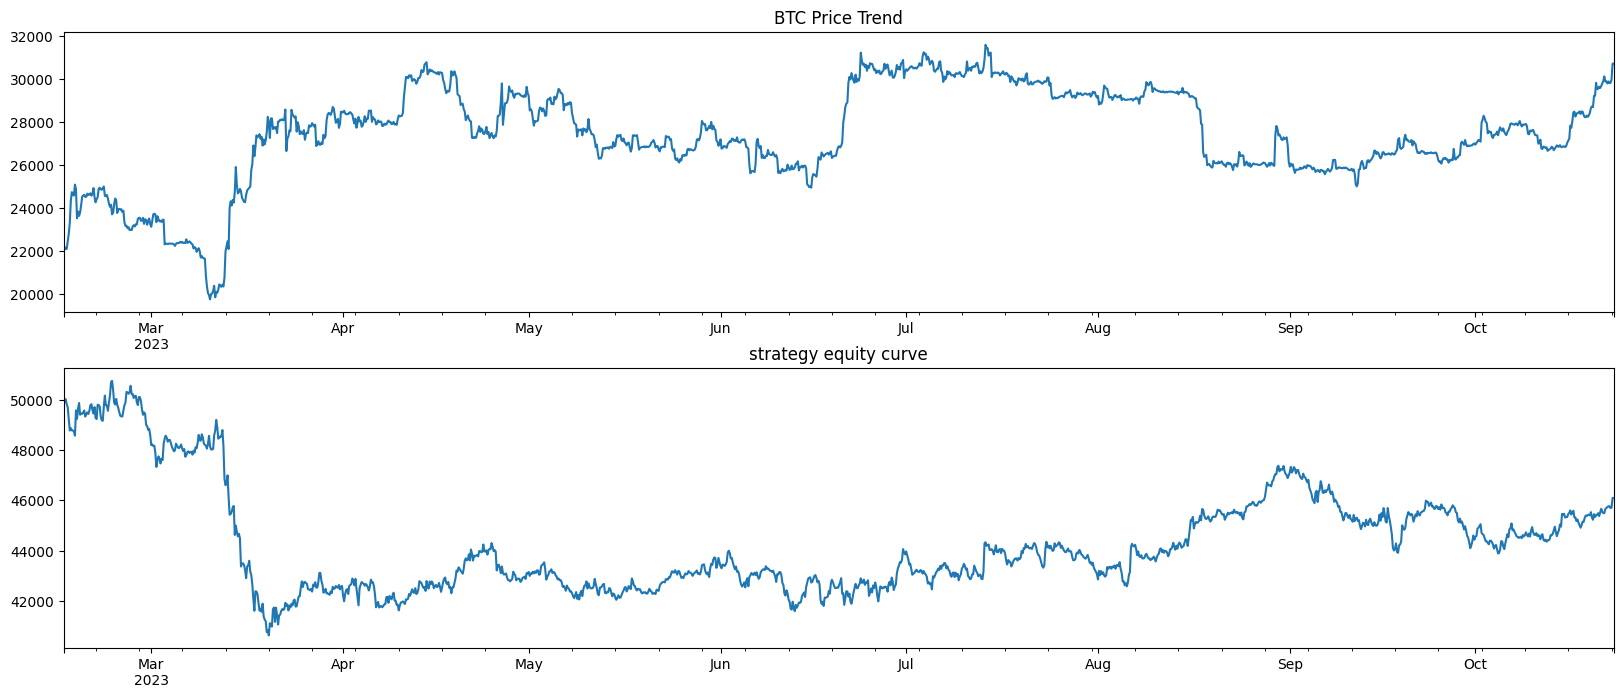

In [31]:
factor = 'dynamic_ts_std(ts_dema(dynamic_ts_max(ts_ht_trendmode(close),14),14),28)'
factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                    _function_map=_function_map, _extra_function_map=_extra_function_map)
data[factor] = factor_df

signal_generator = Signal_generator_IC(data, [factor])
signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                            buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')

simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                        position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000, plot=True)
simulator.start_loop()
simulator.result_analysis()

dynamic_ts_std(ts_dema(dynamic_ts_max(ts_ht_trendmode(close),14),14),28)
6012 小时, 68124 笔交易, 25620153.864 USDT, PnL -3665.13 USDT = -7.3648%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0048968%
最大多仓: 1107.983, 最大空仓: -16366.190, maker手续费损耗: 0.00, taker手续费损耗: 7686.05
最大总杠杆: 2.50,最小总杠杆: 1.90,最大多头风险头寸杠杆：0.03, 最大空头风险头寸杠杆：-0.33 
最大回撤: 19.943%,交易胜率: 49.401%,平均盈亏比: 98.820% 年化 PnL: -10.73%
月化交易量: 3068281 USDT, 每小时总换手率: 0.0426, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -0.46, 年化索提诺率: -0.74



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-10.731127,-0.004897,-0.455352,19.942901,0.000296,49.400799,98.819552


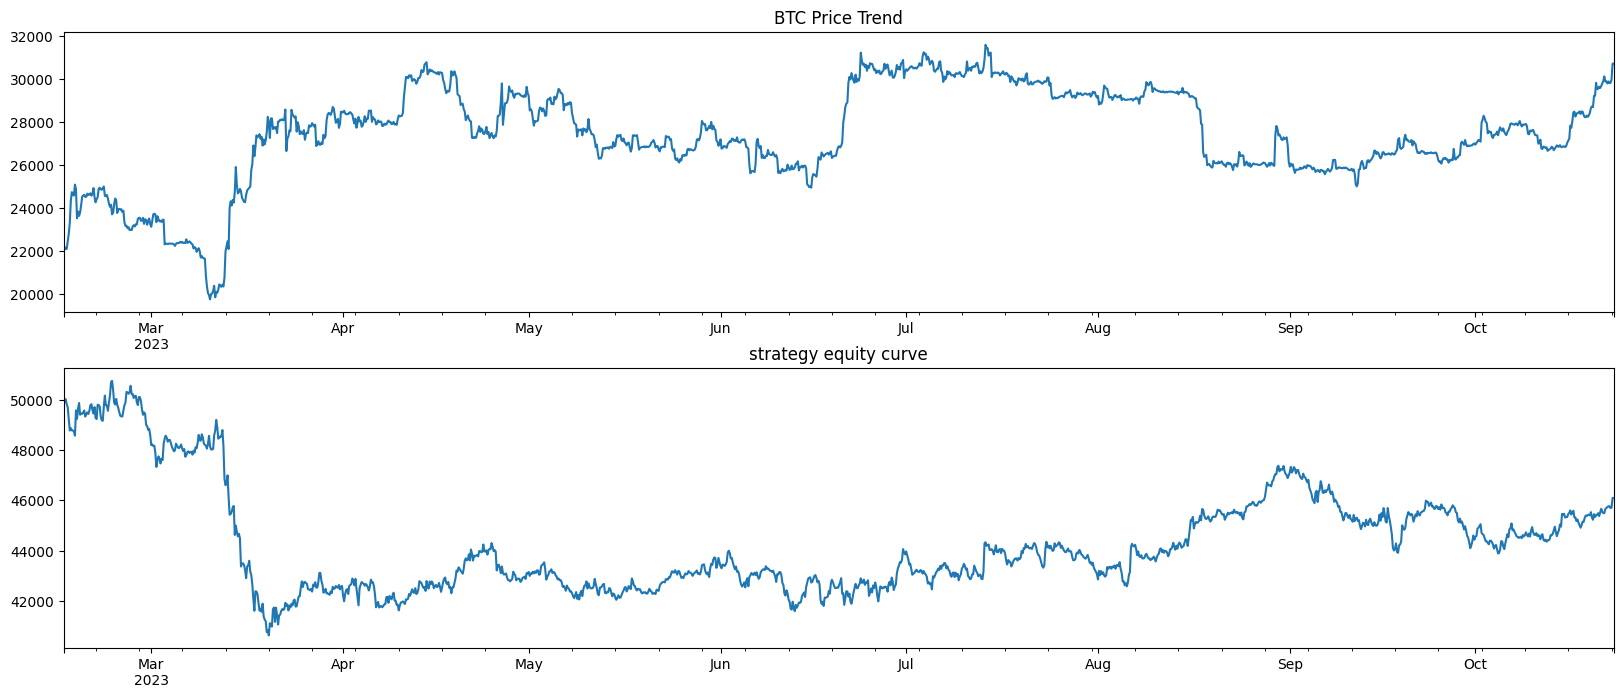

dynamic_ts_std(dynamic_ts_max(dynamic_ts_std(dynamic_ts_max(dynamic_ts_std(dynamic_ts_max(ts_ht_trendmode(close),14),28),14),28),14),28)
6012 小时, 70095 笔交易, 35593937.483 USDT, PnL -18823.39 USDT = -37.7533%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0251019%
最大多仓: 994.694, 最大空仓: -30895.236, maker手续费损耗: 0.00, taker手续费损耗: 10678.18
最大总杠杆: 3.37,最小总杠杆: 1.88,最大多头风险头寸杠杆：0.03, 最大空头风险头寸杠杆：-0.66 
最大回撤: 40.433%,交易胜率: 47.438%,平均盈亏比: 90.082% 年化 PnL: -55.01%
月化交易量: 4262747 USDT, 每小时总换手率: 0.0592, 每小时各标的的平均换手率: 0.0004, 年化夏普率: -2.94, 年化索提诺率: -4.60



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-55.009739,-0.025102,-2.940592,40.433443,0.000411,47.438456,90.081622


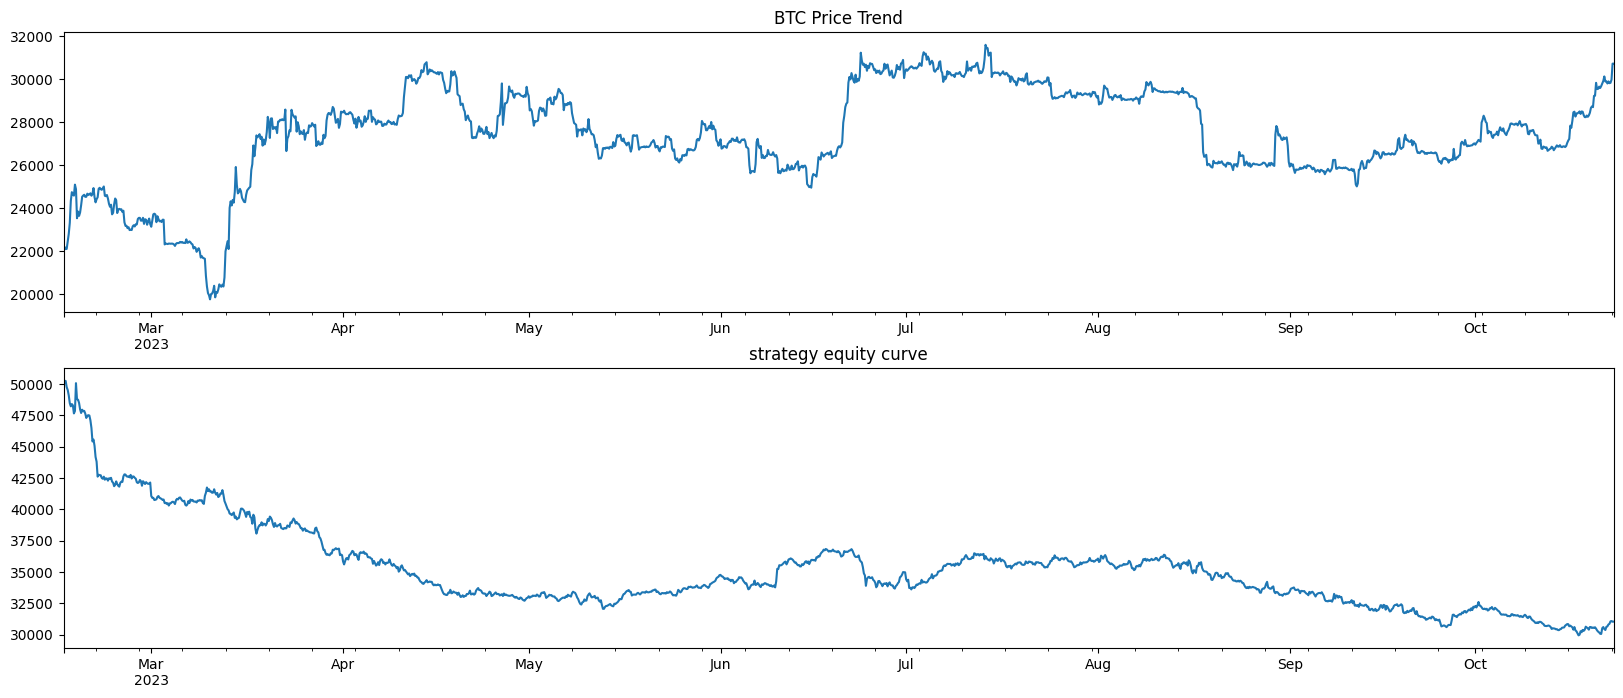

dynamic_ts_std(dynamic_ts_max(dynamic_ts_max(dynamic_ts_max(dynamic_ts_std(dynamic_ts_max(ts_ht_trendmode(close),14),28),14),14),14),28)
6012 小时, 69520 笔交易, 28499620.530 USDT, PnL -8479.66 USDT = -16.9828%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0112918%
最大多仓: 752.322, 最大空仓: -37709.954, maker手续费损耗: 0.00, taker手续费损耗: 8549.89
最大总杠杆: 2.45,最小总杠杆: 1.83,最大多头风险头寸杠杆：0.02, 最大空头风险头寸杠杆：-0.75 
最大回撤: 19.969%,交易胜率: 48.769%,平均盈亏比: 96.246% 年化 PnL: -24.75%
月化交易量: 3413128 USDT, 每小时总换手率: 0.0474, 每小时各标的的平均换手率: 0.0003, 年化夏普率: -1.38, 年化索提诺率: -2.28



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-24.745393,-0.011292,-1.380556,19.968711,0.000329,48.769128,96.245639


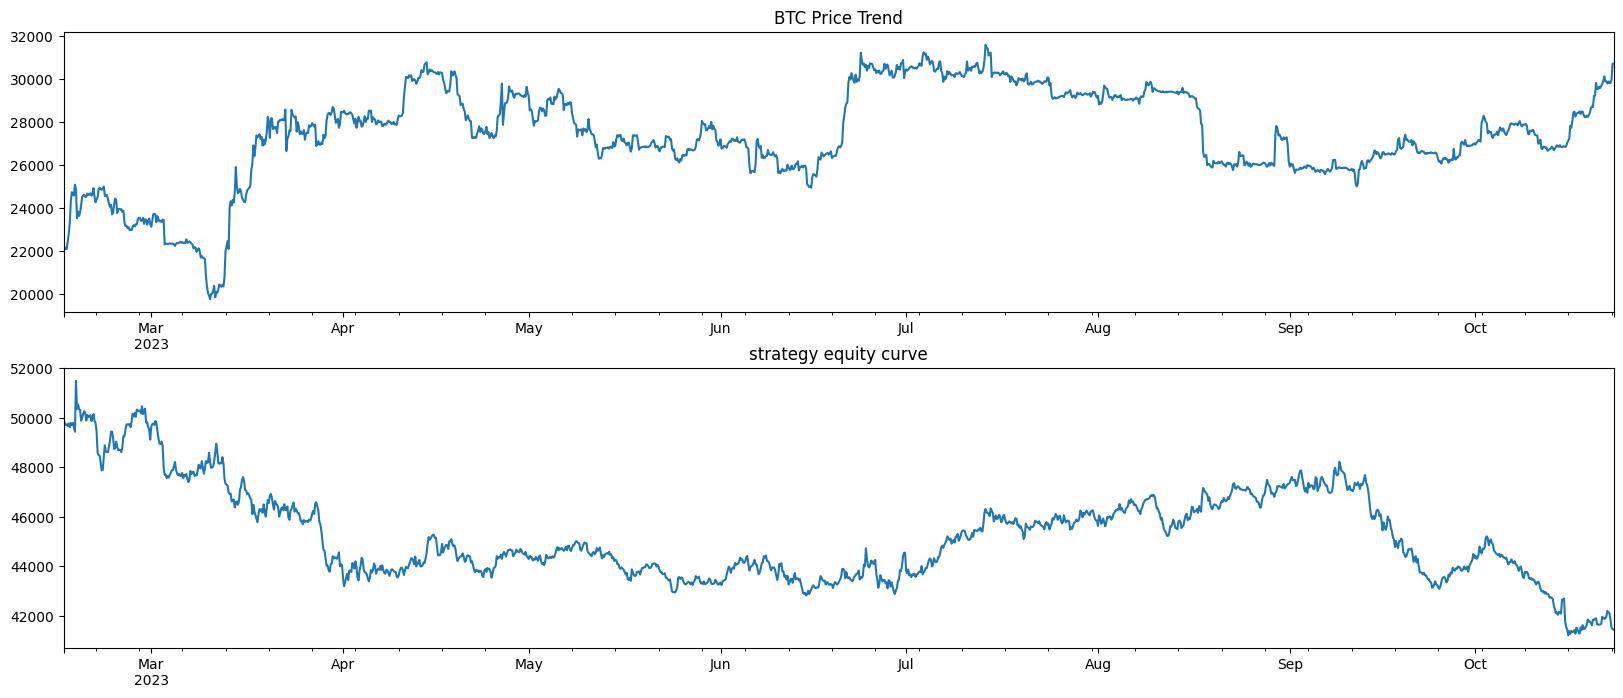

dynamic_ts_std(dynamic_ts_std(dynamic_ts_max(dynamic_ts_max(ts_ht_trendmode(close),14),14),28),28)
6012 小时, 53911 笔交易, 19837503.121 USDT, PnL 3737.30 USDT = 7.5193%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0049995%
最大多仓: 719.318, 最大空仓: -88745.534, maker手续费损耗: 0.00, taker手续费损耗: 5951.25
最大总杠杆: 2.69,最小总杠杆: 1.31,最大多头风险头寸杠杆：0.01, 最大空头风险头寸杠杆：-2.18 
最大回撤: 36.497%,交易胜率: 48.069%,平均盈亏比: 109.249% 年化 PnL: 10.96%
月化交易量: 2375748 USDT, 每小时总换手率: 0.0330, 每小时各标的的平均换手率: 0.0002, 年化夏普率: 0.50, 年化索提诺率: 0.85



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,10.956213,0.005000,0.496288,36.497471,0.000229,48.069241,109.249015


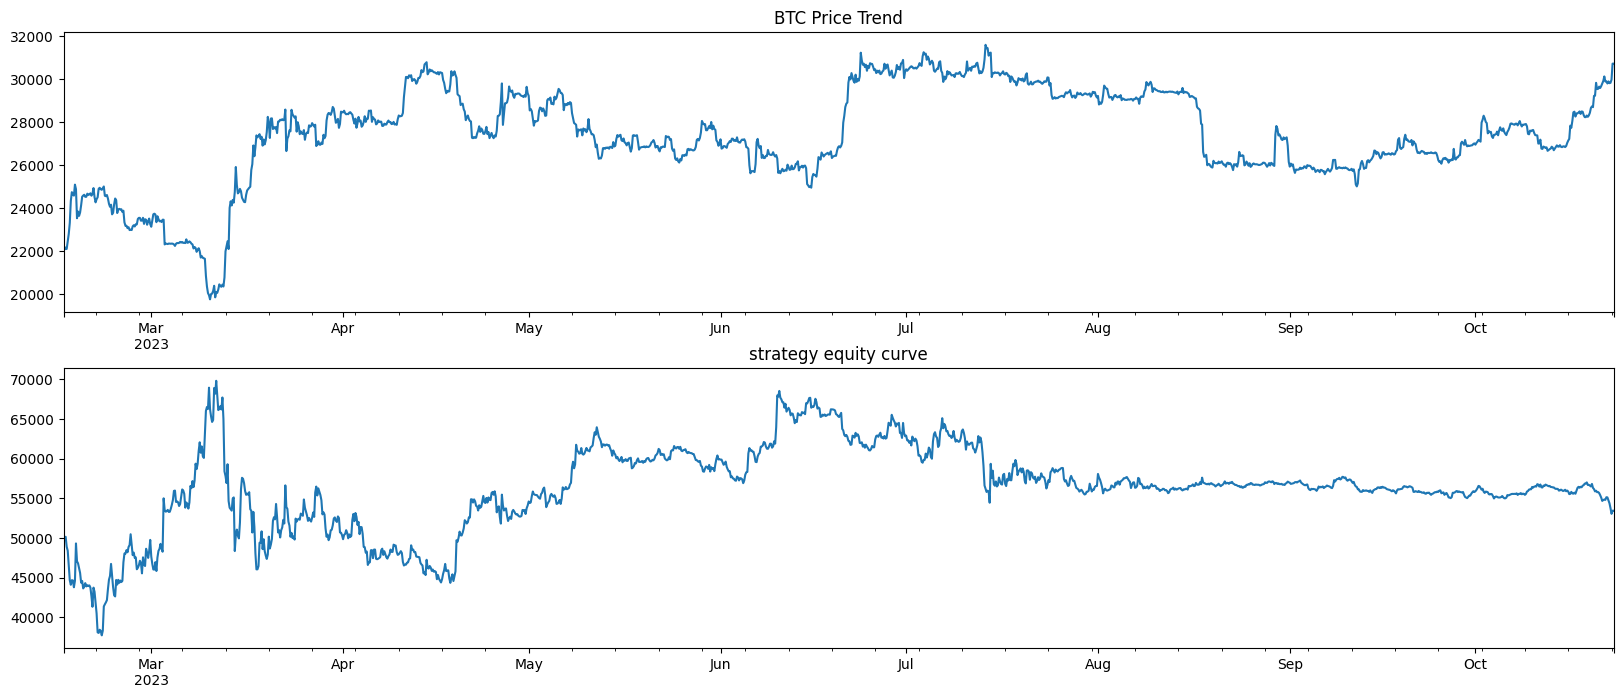

dynamic_ts_std(dynamic_ts_max(dynamic_ts_std(dynamic_ts_std(dynamic_ts_max(dynamic_ts_std(dynamic_ts_max(ts_ht_trendmode(close),14),28),14),28),28),14),28)
KeyboardInterrupt exception is caught


KeyboardInterrupt: 

In [18]:
# total_factor_lis = total_bt_result.sort_values('annual_sharpe', ascending=False).index[:50].tolist()
total_factor_lis = factor_lis
bt_result = pd.DataFrame(index=range(len(total_factor_lis)), columns=['factor', 'annual_sharpe_ratio', 'annual_pnl', 'max_drawdown', 'win_rate', 'pnl_ratio'])

for i in range(len(total_factor_lis)):
    try:
        factor = total_factor_lis[i]
        print(factor)
        factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                           _function_map=_function_map, _extra_function_map=_extra_function_map)
        data[factor] = factor_df
    
        signal_generator = Signal_generator_IC(data, [factor])
        signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                                 buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')
        
        simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                              position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000, plot=True)
        simulator.start_loop()
        simulator.result_analysis()
    
        bt_result.loc[i, :] = [factor, simulator.annual_sharpe_ratio, simulator.annual_pnl, simulator.max_drawdown, simulator.win_rate, simulator.pnl_ratio]
        
    except KeyboardInterrupt:
        print('KeyboardInterrupt exception is caught')
        raise
        
    except:
        print(f"{factor}出现问题")
        traceback.print_exc()

In [ ]:
total_bt_result.to_parquet('gplearn_total_bt_result_4h.parquet')

In [ ]:
old_total_bt_result = pd.read_parquet('gplearn_total_bt_result_4h.parquet')
new_total_bt_result = pd.concat([total_bt_result, old_total_bt_result])
new_total_bt_result = new_total_bt_result[~new_total_bt_result.index.duplicated(keep='first')]
new_total_bt_result.sort_values('annual_sharpe', ascending=False, inplace=True)
new_total_bt_result.to_parquet('gplearn_total_bt_result_4h.parquet')

## 组合因子

In [ ]:
old_total_bt_result = pd.read_parquet('gplearn_total_bt_result.parquet')

In [ ]:
old_total_bt_result.sort_values('annual_sharpe', ascending=False, inplace=True)

In [ ]:
total_factor_lis = old_total_bt_result.index[:60].tolist()
total_factor_lis = old_total_bt_result.index[:30].tolist()

In [ ]:
for factor in tqdm(total_factor_lis):
    try:
        factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                           _function_map=_function_map, _extra_function_map=_extra_function_map)
        data[factor] = factor_df
    except:
        traceback.print_exc()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [05:50<00:00,  8.77s/it]


In [ ]:
total_factor_lis = total_bt_result.sort_values('annual_sharpe', ascending=False).index[:50].tolist()
bt_result = pd.DataFrame(index=range(len(total_factor_lis)), columns=['factor', 'annual_sharpe_ratio', 'annual_pnl', 'max_drawdown', 'win_rate', 'pnl_ratio'])

for i in range(len(total_factor_lis)):
    try:
        selected_factor_lis = total_factor_lis[i]
        print(selected_factor_lis)
        signal_generator = Signal_generator_IC(data, [selected_factor_lis])
        signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                                 buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')
        
        simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                              position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000, plot=True)
        simulator.start_loop()
        simulator.result_analysis()
    
        bt_result.loc[i, :] = [total_factor_lis[i], simulator.annual_sharpe_ratio, simulator.annual_pnl, simulator.max_drawdown, simulator.win_rate, simulator.pnl_ratio]
        
    except KeyboardInterrupt:
        print('KeyboardInterrupt exception is caught')
        raise
        
    else:
        print(f"{selected_factor_lis}出现问题")
        traceback.print_exc()

### Optuna优化

In [ ]:
import sys
import os

# import pygad
import random

from tqdm import tqdm
import numpy as np
# from Signal_generator import *
# from multi_factor_bt import *
# from multi_factor_utils import *
import optuna
from optuna import Trial


# Optuna

def _cal_metric(data, core_factor_lis, param_grid, taker_fee, max_factor_num, signal_generator_type, rolling_window_1, rolling_window_2, metric):
    try:
        selected_factor_lis = core_factor_lis.copy()
        for key, value in param_grid.items():
            if value == 1:
                selected_factor_lis.append(key)
            else:
                pass
        if len(selected_factor_lis)>max_factor_num:
            return -np.inf
        else:
            if signal_generator_type == 'IC':
                signal_generator = Signal_generator_IC(data, selected_factor_lis)
                signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=rolling_window_1,
                                                                                              rolling_window_2=rolling_window_2,
                                                                                              rolling_type='avg',
                                                                                              buy_threshold=0.8,
                                                                                              sell_threshold=0.2,
                                                                                              ts_normalized=True,
                                                                                              double_normalized=False,
                                                                                              orthogonalize=True,
                                                                                              orthogonal_method='symmetry',
                                                                                              method='signal',
                                                                                              ic_type='spearmanr',
                                                                                              combine_type='weighted')
            elif signal_generator_type == 'Max IC-IR':
                signal_generator = Signal_generator_IC(data, selected_factor_lis)
                signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=rolling_window_1,
                                                                                              rolling_window_2=rolling_window_2,
                                                                                              rolling_type='Max IC-IR',
                                                                                              buy_threshold=0.8,
                                                                                              sell_threshold=0.2,
                                                                                              ts_normalized=True,
                                                                                              double_normalized=False,
                                                                                              orthogonalize=False,
                                                                                              orthogonal_method='symmetry',
                                                                                              method='signal',
                                                                                              ic_type='spearmanr',
                                                                                              combine_type='weighted')    
                
            
            elif signal_generator_type == 'ols':
                signal_generator = Signal_generator_Reg(data, selected_factor_lis)
                signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=rolling_window_1, rolling_window_2=rolling_window_2, rolling_type='avg',
                                         buy_threshold=0.8, sell_threshold=0.2, orthogonalize=False, orthogonal_method='symmetry', 
                                                ts_normalized=True, double_normalized=False, regression_method='ols', method='signal')
    
    
            simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix,
                                                        symbol_lis=symbol_lis, ts_lis=ts_lis,
                                                        position=0, cash=50000, order_size=100000, taker_fee=taker_fee,
                                                        step_size=1, max_leverage=5, plot=False)
            simulator.start_loop()
    
            simulator.mark_price_matrix = simulator.trade_p_matrix[:, :, 3]  # 收盘价
            simulator.filled_price_matrix = simulator.trade_p_matrix[:, :, 0]  # 开盘价
            simulator.res[:, :-1] = simulator.res[:, :-1] * simulator.mark_price_matrix  # 收盘价
            if not isinstance(simulator.symbol_lis, list):
                simulator.symbol_lis = simulator.symbol_lis.tolist()
            simulator.res = pd.DataFrame(simulator.res, index=simulator.ts_lis, columns=simulator.symbol_lis + ['cash'])
            simulator.res['equity'] = simulator.res.sum(axis=1)
            if metric == 'sharpe':
                hourly_equity = simulator.res.resample('1h').agg({'equity': 'last'})
                hourly_equity.dropna(inplace=True)
                hourly_return = hourly_equity.diff() / hourly_equity.shift(1).abs()
                hourly_return.dropna(inplace=True)
                annual_sharpe_ratio = hourly_return.mean() / hourly_return.std() * np.sqrt(
                    float(pd.Timedelta(days=365) / pd.Timedelta(hours=1)))
    
                return annual_sharpe_ratio[0]
            elif metric == 'pnl':
                return simulator.res['equity'][-1] / simulator.res['equity'][0]
    except:
        print(f"出现问题:{selected_factor_lis}")

def _constraints(param_grid, core_factor_lis, threshold):
    total_factor_num = len(core_factor_lis)
    for key, value in param_grid.items():
        if value == 1:
            total_factor_num += 1
    return total_factor_num - threshold


def _factor_selection_objective(trial: Trial, data, factor_lis, core_factor_lis=[], taker_fee=0.0003, max_factor_num=5, signal_generator_type='ols', rolling_window_1=300, rolling_window_2=90, metric='sharpe'):

    param_grid = {}
    
    p = int((len(factor_lis) / max_factor_num) // 1 + 1)
    choice_lis = list(range(p))
    for factor in factor_lis:
        param_grid[factor] = trial.suggest_categorical(factor, choice_lis)

    metric = _cal_metric(data, core_factor_lis, param_grid, taker_fee, max_factor_num, signal_generator_type, rolling_window_1, rolling_window_2, metric)

    # define constraints(only feasible if less than or equal to zero)
    c0 = _constraints(param_grid, core_factor_lis, threshold=max_factor_num)
    trial.set_user_attr("constraint", (c0,))

    return metric

def constraints_func(trial: Trial):
    return trial.user_attrs["constraint"]


def portfolio_factor_selection_optuna(data, factor_lis, objective, start_date='2022-08-01', end_date='2023-04-17', 
                                      n_trials=100, core_factor_lis=[], taker_fee=0.0003, max_factor_num=5, signal_generator_type='ols', rolling_window_1=300, rolling_window_2=90, metric='sharpe', verbosity='info'):
    
    data = data.copy()
    
    if isinstance(start_date, str):
        data = data.loc[(data.index.get_level_values(0) >= pd.to_datetime(start_date, utc=True)) & (
            data.index.get_level_values(0) <= pd.to_datetime(end_date, utc=True))]
    else:
        data = data.loc[(data.index.get_level_values(0) >= start_date) & (
            data.index.get_level_values(0) <= end_date)]
        
    factor_lis = factor_lis.copy()

    # 判断是否有core_factor
    overlap = set(core_factor_lis).intersection(set(factor_lis))

    if len(core_factor_lis) == 0:
        pass
    elif len(core_factor_lis) != 0 and len(overlap) != 0:
        for each in overlap:
            factor_lis.remove(each)
    else:
        pass
    
    if verbosity == 'info':
        optuna.logging.set_verbosity(optuna.logging.INFO)
    elif verbosity == 'warning':
        optuna.logging.set_verbosity(optuna.logging.WARNING)
    elif verbosity == 'critical':
        optuna.logging.set_verbosity(optuna.logging.CRITICAL)
    
    
    sampler = optuna.samplers.TPESampler(constraints_func=constraints_func)
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(lambda trial: objective(trial, data=data, factor_lis=factor_lis,
                                           core_factor_lis=core_factor_lis, taker_fee=taker_fee, 
                                           signal_generator_type=signal_generator_type, rolling_window_1=rolling_window_1, rolling_window_2=rolling_window_2,
                                           max_factor_num=max_factor_num, metric=metric),
                   n_trials=n_trials)

    selected_factor_lis = []
    for key, value in study.best_params.items():
        if value == 1:
            selected_factor_lis.append(key)
        else:
            pass
    selected_factor_lis.extend(core_factor_lis)
    return selected_factor_lis, study

### 把策略分开，看相关性
### 脚本跑、多个频率、不要拉满cpu
### 

In [ ]:
selected_factor_lis, study = portfolio_factor_selection_optuna(data=data, factor_lis=total_factor_lis, start_date='2020-01-01', end_date='2024-01-01',
                                                    objective=_factor_selection_objective, n_trials=50, core_factor_lis=[],
                                                    taker_fee=0.0003, max_factor_num=6, signal_generator_type='IC', rolling_window_1=180,
                                                            rolling_window_2=90, metric='pnl', verbosity='info')

[I 2023-09-12 07:21:19,211] A new study created in memory with name: no-name-2c560b6f-52d2-4d3d-b215-c57d6386bfa3
[W 2023-09-12 07:21:21,411] Trial 0 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 5, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 8, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 7, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 3, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 0, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21)

出现问题:['ts_delay(ts_dema(taker_buy_v,14),7)']


[W 2023-09-12 07:21:21,865] Trial 1 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 5, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 1, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 3, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 6, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 3, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 7, 'ts_delay(ts_kama(taker_buy_v,28),5)': 0, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)', 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),14),28),14)', 'ts_delay(ts_dema(taker_buy_v,14),7)', 'ts_delay(ts_kama(volume,28),14)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),21),21)']


[W 2023-09-12 07:21:22,978] Trial 2 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 6, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 5, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 5, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 0, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 6, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['ts_delay(ts_dema(toplongshortpositionratio_longShortRatio,7),7)', 'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(dynamic_ts_mean(volume,14),14),28),14)', 'dynamic_ts_mean(dynamic_ts_std(ts_delay(taker_buy_v,14),21),21)']


[W 2023-09-12 07:21:23,329] Trial 3 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 1, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 1, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 7, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 4, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 5, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 2, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 0, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'ts_dema(ts_delay(volume,7),21)', 'ts_delay(ts_dema(taker_buy_v,14),7)']


[W 2023-09-12 07:21:23,809] Trial 4 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 5, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 6, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 6, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 5, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 5, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['ts_delay(ts_delay(ts_ht_dcphase(close),7),7)', 'dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21)', 'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(dynamic_ts_mean(volume,14),14),28),14)', 'dynamic_ts_mean(ts_correl(ts_atr(high,low,close,7), ts_midpoint(ts_typprice(high,low,close),28),28),28)', 'dynamic_ts_mean(volume,14)']


[W 2023-09-12 07:21:24,351] Trial 5 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 1, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 1, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 7, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 6, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 6, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 7, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 7, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 1, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)', 'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_linearreg_slope(ts_obv(close,volume),14),14),28),14)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'dynamic_ts_mean(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),21)']


[W 2023-09-12 07:21:25,419] Trial 9 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 1, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 6, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 8, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 8, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 5, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 0, 'ts_delay(ts_kama(taker_buy_v,28),5)': 7, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clos

出现问题:['dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'ts_midpoint(ts_dema(toplongshortpositionratio_longShortRatio,7),21)', 'ts_delay(ts_dema(taker_buy_v,14),7)']


[W 2023-09-12 07:21:25,851] Trial 12 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 4, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 8, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 8, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 4, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 6, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 7, 'ts_delay(ts_kama(taker_buy_v,28),5)': 3, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_delay(ts_delay(ts_ht_dcphase(close),7),7)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)', 'ts_midpoint(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:26,341] Trial 14 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 1, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 8, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 8, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 8, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 0, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 7, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 0, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 0, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)', 'ts_midpoint(ts_delay(taker_buy_v,14),28)', 'dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_std(ts_linearreg_slope(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'dynamic_ts_std(ts_kama(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:26,555] Trial 16 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 2, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 2, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 7, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 0, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 3, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 4, 'ts_delay(ts_kama(taker_buy_v,28),5)': 5, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_delay(ts_ht_sine(close),7)']


[W 2023-09-12 07:21:26,922] Trial 17 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 1, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 7, 'ts_dema(ts_delay(volume,7),21)': 0, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 7, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 6, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 7, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 1, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 2, 'ts_delay(ts_kama(taker_buy_v,28),5)': 5, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)', 'dynamic_ts_mean(volume,28)', 'dynamic_ts_mean(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),21)']


[W 2023-09-12 07:21:28,038] Trial 19 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 7, 'ts_dema(ts_delay(volume,7),21)': 1, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 0, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 2, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 1, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 7, 'ts_delay(ts_kama(taker_buy_v,28),5)': 6, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_dema(ts_delay(volume,7),21)', 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)', 'ts_midpoint(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:28,401] Trial 20 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 8, 'ts_dema(ts_delay(volume,7),21)': 6, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 6, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 5, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 0, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 6, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(volume,28)', 'dynamic_ts_std(ts_avgprice(open,high,low,close),14)', 'ts_delay(ts_ht_sine(close),7)']


[W 2023-09-12 07:21:28,887] Trial 21 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 5, 'ts_dema(ts_delay(volume,7),21)': 1, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 4, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 1, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 7, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 4, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 7, 'ts_delay(ts_kama(taker_buy_v,28),5)': 0, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_dema(ts_delay(volume,7),21)', 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)', 'dynamic_ts_mean(toplongshortpositionratio_longShortRatio,21)', 'ts_delay(ts_dema(toplongshortpositionratio_longShortRatio,7),7)', 'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_linearreg_slope(ts_obv(close,volume),14),14),28),14)']


[W 2023-09-12 07:21:29,303] Trial 22 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 5, 'ts_dema(ts_delay(volume,7),21)': 7, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 0, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 2, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 4, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 1, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 8, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 5, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)', 'dynamic_ts_mean(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),21)', 'dynamic_ts_mean(ts_correl(ts_atr(high,low,close,7), ts_midpoint(ts_typprice(high,low,close),28),28),28)', 'dynamic_ts_std(ts_dema(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:29,782] Trial 23 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 1, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 4, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 1, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 6, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 5, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 4, 'ts_delay(ts_kama(taker_buy_v,28),5)': 8, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)', 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)', 'dynamic_ts_mean(dynamic_ts_mean(volume,14),21)', 'ts_dema(ts_delay(volume,7),7)', 'ts_delay(ts_kama(toplongshortpositionratio_longShortRatio,14),12)']


[W 2023-09-12 07:21:30,949] Trial 24 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 6, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 6, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 0, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 7, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 0, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 5, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),14)', 'dynamic_ts_mean(ts_correl(ts_atr(high,low,close,7), ts_midpoint(ts_typprice(high,low,close),28),28),28)', 'ts_delay(ts_ht_sine(close),7)']


[W 2023-09-12 07:21:31,260] Trial 26 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 0, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 0, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 7, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 4, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 8, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 6, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 0, 'ts_delay(ts_kama(taker_buy_v,28),5)': 6, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),14),28),14)', 'dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),14)']


[W 2023-09-12 07:21:31,716] Trial 27 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 2, 'ts_dema(ts_delay(volume,7),21)': 0, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 5, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 8, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 8, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 3, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 3, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 4, 'ts_delay(ts_kama(taker_buy_v,28),5)': 0, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_delay(ts_kama(volume,28),14)', 'ts_delay(ts_dema(toplongshortpositionratio_longShortRatio,7),7)', 'dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),14)', 'dynamic_ts_std(ts_dema(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:32,128] Trial 29 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 7, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 6, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 2, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 6, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_midpoint(ts_dema(toplongshortpositionratio_longShortRatio,7),21)', 'dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)']


[W 2023-09-12 07:21:33,277] Trial 30 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 4, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 6, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 7, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_midpoint(ts_dema(toplongshortpositionratio_longShortRatio,7),21)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'ts_delay(ts_kama(toplongshortpositionratio_longShortRatio,14),12)']


[W 2023-09-12 07:21:33,665] Trial 31 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 1, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 1, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 0, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 6, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_dema(ts_delay(volume,7),21)', 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)']


[W 2023-09-12 07:21:34,071] Trial 32 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 3, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 1, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 3, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 0, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 2, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 0, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'ts_delay(ts_kama(toplongshortpositionratio_longShortRatio,14),12)', 'dynamic_ts_std(ts_dema(ts_linearreg_slope(ts_obv(close,volume),14),28),14)']


[W 2023-09-12 07:21:34,613] Trial 34 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 1, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 8, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 1, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['ts_dema(ts_delay(volume,7),21)', 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)', 'dynamic_ts_max(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),14)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),21)', 'dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),14)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:34,869] Trial 36 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:35,092] Trial 37 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:36,199] Trial 38 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:36,407] Trial 39 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:36,611] Trial 40 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:36,895] Trial 41 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:37,164] Trial 42 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:37,439] Trial 43 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:37,647] Trial 44 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:37,921] Trial 45 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(toplongshortpositionratio_longShortRatio,28)', 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:38,164] Trial 46 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 2, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:39,228] Trial 47 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 5, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 4, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 3, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:39,501] Trial 48 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 3, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 5, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 2, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


[W 2023-09-12 07:21:39,758] Trial 49 failed with parameters: {'dynamic_ts_std(dynamic_ts_std(ts_linearreg_slope(ts_obv(close,volume),14),28),14)': 4, 'dynamic_ts_max(dynamic_ts_std(ts_kama(ts_obv(close,volume),14),28),14)': 0, 'ts_dema(ts_delay(volume,7),21)': 8, 'ts_delta(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),5)': 3, 'dynamic_ts_mean(dynamic_ts_std(ts_obv(close,volume),21),21)': 4, 'dynamic_ts_max(ts_linearreg_angle(ts_delay(taker_buy_usd,5),14),7)': 4, 'ts_linearreg_angle(dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21),7)': 3, 'dynamic_ts_std(dynamic_ts_std(ts_delta(ts_obv(close,volume),14),28),14)': 3, 'dynamic_ts_mean(ts_dema(toplongshortpositionratio_longShortRatio,7),21)': 8, 'ts_kama(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),7)': 7, 'dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_delay(taker_buy_v,14),21),21),21)': 8, 'ts_delay(ts_kama(taker_buy_v,28),5)': 4, 'dynamic_ts_max(dynamic_ts_std(dynamic_ts_mean(ts_obv(clo

出现问题:['dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(dynamic_ts_std(dynamic_ts_mean(ts_obv(close,volume),28),21),28),21),21)']


In [ ]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

In [ ]:
factor_lis_container = []
value_lis = []
for trial in study.trials:
    selected_factor_lis = []
    
    for key, value in trial.params.items():
        if value == 1:
            selected_factor_lis.append(key)
        else:
            pass
    factor_lis_container.append(selected_factor_lis)
    value_lis.append(trial.value)

In [ ]:
bt_result = pd.DataFrame(index=range(len(factor_lis_container)), columns=['annual_sharpe_ratio', 'annual_pnl', 'max_drawdown', 'win_rate', 'pnl_ratio'])

for i in range(len(factor_lis_container)):
    selected_factor_lis = factor_lis_container[i]
    signal_generator = Signal_generator_IC(data, selected_factor_lis)
    signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                             buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')
    
    simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                          position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000, plot=True)
    simulator.start_loop()
    simulator.result_analysis()


    bt_result.loc[i, :] = [simulator.annual_sharpe_ratio, simulator.annual_pnl, simulator.max_drawdown, simulator.win_rate, simulator.pnl_ratio]

ValueError: operands could not be broadcast together with shapes (0,140) (0,0) 

In [ ]:
bt_result.drop_duplicates(subset='annual_pnl', inplace=True)
bt_result.sort_values(by='annual_pnl', ascending=False, inplace=True)

In [ ]:
factor = old_total_bt_result_1.index[0]

11184 小时, 55249 笔交易, 50951107.820 USDT, PnL 21565.87 USDT = 43.6212%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0467537%
最大多仓: 3076.475, 最大空仓: -13464.396, maker手续费损耗: 0.00, taker手续费损耗: 15285.33
最大总杠杆: 3.46,最小总杠杆: 1.18,最大多头风险头寸杠杆：0.07, 最大空头风险头寸杠杆：-0.38 
最大回撤: 40.964%,交易胜率: 53.755%,平均盈亏比: 96.230% 年化 PnL: 34.17%
月化交易量: 3280114 USDT, 每小时总换手率: 0.0456, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 0.95, 年化索提诺率: 1.25



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,34.166790,0.046754,0.954905,40.964305,0.000376,53.755365,96.229921


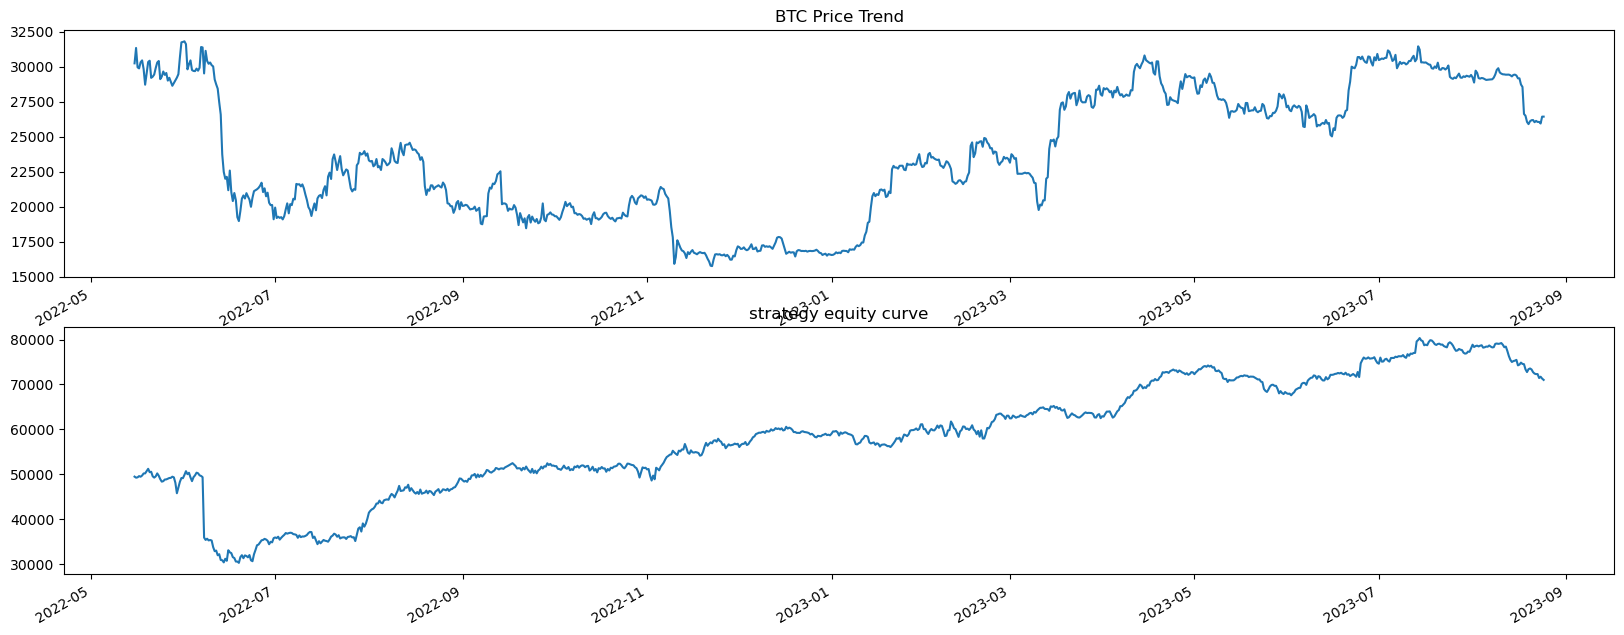

In [ ]:
signal_generator = Signal_generator_IC(data, [factor])
signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                         buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')

simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                      position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000, plot=True)
simulator.start_loop()
simulator.result_analysis()

## Add loss_stop and profit_stop mode

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import localtime, strftime
import statsmodels.regression.linear_model as sm
from tqdm import tqdm




import numba as nb
@nb.njit
def _start_loop(n, m, trade_p_matrix, signal_matrix, step_size, position, cash, order_size, max_leverage,
                taker_fee, volume_precision, stop_loss, stop_profit, stop_loss_threshold, stop_profit_threshold):
    
    res = np.zeros((n, m+1))
    res.fill(np.nan)
    # fee_matrix = np.zeros((n, m))

    _cnt = 0
    for i in range(n):
        # 获取当前各标的最新价格(open)
        present_price = trade_p_matrix[i][:, 0]
        high = trade_p_matrix[i][:, 1]
        low = trade_p_matrix[i][:, 2]
        # 计算当前仓位比重
        tmp_weight = position * present_price / order_size
        # 计算目标仓位比重
        allocated_weight = signal_matrix[i]
        if np.nansum(np.abs(allocated_weight)) == 0:
            allocated_weight = np.array([0.0] * m)
        else:
            allocated_weight = np.array([allocated_weight[i] / np.nansum(np.abs(allocated_weight)) for i in range(m)])

        # 计算要达到allocated_weight 需要交易的实际仓位
        trade_weight = allocated_weight - tmp_weight
        orders_v = trade_weight * order_size / present_price
        orders_v = np.array([round(orders_v[j], volume_precision[j]) for j in range(m)])

        
        
        _cnt += 1
        if _cnt == step_size:
            trade = -1 * orders_v * present_price * np.where(trade_weight > 0, 1+taker_fee, 1-taker_fee)
            position_change = orders_v

            tmp_position = position + position_change
            tmp_cash = cash + np.sum(trade)    
            
            tmp_equity = np.sum(tmp_position * present_price) + tmp_cash
            leverage = np.sum(np.abs(tmp_position) * present_price) / tmp_equity

            # 开始止盈止损
            if stop_profit:
                long_threshold = (1+stop_profit_threshold) * present_price
                short_threshold = (1-stop_profit_threshold) * present_price
                
                long_profit_stop_cond = (high > long_threshold) & (tmp_position > 0)
                short_profit_stop_cond = (low < short_threshold) & (tmp_position < 0)

                tmp_cash += np.sum(tmp_position[long_profit_stop_cond] * long_threshold[long_profit_stop_cond])
                tmp_cash += np.sum(tmp_position[short_profit_stop_cond] * short_threshold[short_profit_stop_cond])
                tmp_position[long_profit_stop_cond] = 0
                tmp_position[short_profit_stop_cond] = 0

            if stop_loss:
                long_threshold = (1-stop_loss_threshold) * present_price
                short_threshold = (1+stop_loss_threshold) * present_price
                
                long_loss_stop_cond = (low < long_threshold) & (tmp_position > 0)
                short_loss_stop_cond = (high > short_threshold) & (tmp_position < 0)
                tmp_cash += np.sum(tmp_position[long_loss_stop_cond] * long_threshold[long_loss_stop_cond])
                tmp_cash += np.sum(tmp_position[short_loss_stop_cond] * short_threshold[short_loss_stop_cond])
                tmp_position[long_loss_stop_cond] = 0
                tmp_position[short_loss_stop_cond] = 0
                
            if leverage < max_leverage:
                position = tmp_position
                cash = tmp_cash

                res[i] = np.append(position, cash)
            else:
                res[i] = np.append(position, cash)

            _cnt = 0

    return res


class multi_factor_simulator_v1_numba:
    """
    简单taker模式回测
    """

    def __init__(self, signal_matrix, trade_p_matrix, symbol_lis, ts_lis, position, cash, order_size, taker_fee, step_size, max_leverage,
                 stop_loss=False, stop_profit=False, stop_loss_threshold=0.5, stop_profit_threshold=0.5, plot=True, swap_info=None):
        self.signal_matrix = signal_matrix.astype(np.float64)
        self.trade_p_matrix = trade_p_matrix.astype(np.float64)
        self.ts_lis = ts_lis
        self.symbol_lis = symbol_lis
        if isinstance(position, (int, float)):
            self.position = np.array([float(position)] * len(symbol_lis))
        else:
            self.position = position
        self.cash = cash
        self.order_size = order_size

        self.taker_fee = taker_fee
        self.step_size = step_size
        self.max_leverage = max_leverage
        self.plot = plot
        self.n, self.m = len(self.ts_lis), len(self.symbol_lis)
        self.stop_loss=stop_loss
        self.stop_profit=stop_profit
        self.stop_loss_threshold = stop_loss_threshold
        self.stop_profit_threshold = stop_profit_threshold
        
        # 控制成交量精度
        if swap_info:
            pass
        else:
            
            swap_info = pd.read_parquet("/home/zzj/GPLearnFinance3D/data/swap_info.parquet")
        
        swap_info = swap_info.loc[symbol_lis, :]
        
        self.volume_precision = []
        for each in swap_info['volume_step'].apply(str).values:
            if '.' in each and each.split('.')[0] == '0':
                each_precision = len(each.split('.')[1])
            elif '.' in each and each.split('.')[0] != '0':
                each_precision = 0
            else:
                each_precision = 0
            self.volume_precision.append(each_precision)
            

    def start_loop(self):
        self.res = _start_loop(self.n, self.m, self.trade_p_matrix, self.signal_matrix, self.step_size,
                               self.position, self.cash, self.order_size, self.max_leverage, self.taker_fee,
                               self.volume_precision, self.stop_loss, self.stop_profit, self.stop_loss_threshold, self.stop_profit_threshold)
    
    
    def result_analysis(self):
        self.position_matrix = self.res[:, :-1].copy()
        self.mark_price_matrix = self.trade_p_matrix[:, :, 3] # 收盘价
        self.filled_price_matrix = self.trade_p_matrix[:, :, 0] # 开盘价
        self.res[:, :-1] = self.res[:, :-1] * self.mark_price_matrix # 收盘价
        if not isinstance(self.symbol_lis, list):
            self.symbol_lis = self.symbol_lis.tolist()
        self.res = pd.DataFrame(self.res, index=self.ts_lis, columns=self.symbol_lis + ['cash'])
        self.res['equity'] = self.res.sum(axis=1)
        self.res['net_leverage'] = self.res.loc[:, self.symbol_lis].sum(axis=1) / self.res.equity
        self.res['total_leverage'] = self.res.loc[:, self.symbol_lis].abs().sum(axis=1) / self.res.equity
        # 最后再dropna，否则index可能出现不匹配（）
        self.res.dropna(inplace=True)
        self.position_df = pd.DataFrame(self.position_matrix, index=self.ts_lis, columns=self.symbol_lis)
        self.mark_price_df = pd.DataFrame(self.mark_price_matrix, index=self.ts_lis,
                                                    columns=self.symbol_lis)
        self.filled_price_df = pd.DataFrame(self.filled_price_matrix, index=self.ts_lis,
                                                    columns=self.symbol_lis)
        time_span = self.res.index[-1] - self.res.index[0]
        freq = self.res.index[-1] - self.res.index[-2]
        
        position_usd_change = self.position_df.diff() * self.filled_price_df
        # 手续费计算
        taker_fee_cost = np.nansum(position_usd_change.abs()) * self.taker_fee
        maker_fee_cost = 0


        n_trades = (self.position_df.loc[:, self.symbol_lis].diff() != 0).sum().sum()
        profit = self.res.equity.iloc[-1] - self.res.equity.iloc[0]
        pnl_percentage = profit / self.res.equity.iloc[0] * 100
        equity_cummax = self.res.equity.cummax()
        max_drawdown_percentage = - (self.res.equity / equity_cummax - 1).min() * 100
        total_traded_quantity = np.nansum(position_usd_change.abs())
        
        sampled_return = self.res['equity'].diff() / self.res['equity'].shift(1).abs()
        sampled_return.dropna(inplace=True)
        annual_sharpe_ratio = sampled_return.mean() / sampled_return.std() * np.sqrt(
                float(pd.Timedelta(days=365) / freq))
        
        negative_returns = np.where(sampled_return>=0, 0, sampled_return)
        downside_deviation = np.std(negative_returns)

        if downside_deviation == 0:
            downside_deviation = -np.inf
        # Calculate the Sortino ratio
        annual_sortino_ratio = np.mean(sampled_return) / downside_deviation * np.sqrt(float(pd.Timedelta(days=365) / freq))
        
        """
        if (self.res.index[-1] - self.res.index[0]) < pd.Timedelta(hours=1):
            
            resampled_equity = self.res.resample('1h').agg({'equity': 'last'})
            resampled_equity.dropna(inplace=True)
            resampled_return = resampled_equity.diff() / resampled_equity.shift(1).abs()
            resampled_return.dropna(inplace=True)
            annual_sharpe_ratio = resampled_return.mean() / resampled_return.std() * np.sqrt(
                float(pd.Timedelta(days=365) / pd.Timedelta(hours=1)))
        else:
            resampled_equity = self.res.resample('1d').agg({'equity': 'last'})
            resampled_equity.dropna(inplace=True)
            resampled_return = resampled_equity.diff() / resampled_equity.shift(1).abs()
            resampled_return.dropna(inplace=True)
            annual_sharpe_ratio = resampled_return.mean() / resampled_return.std() * np.sqrt(
                float(pd.Timedelta(days=365) / pd.Timedelta(days=1)))
        """
        turnover = (self.position_df.diff().abs() * self.filled_price_df).resample('1h').agg('sum') / self.order_size

        equity_change = (self.res['equity'] - self.res['equity'].shift(1)).dropna()
        win_rate = len(equity_change[equity_change > 0]) / len(equity_change[equity_change != 0]) * 100

        # 平均盈亏比
        avg_pnl_ratio = equity_change[equity_change > 0].mean() / np.abs(equity_change[equity_change < 0].mean()) * 100
        
        convert_to_per_second = float(pd.Timedelta(seconds=1) / time_span)

        self.annual_pnl = pnl_percentage * float(pd.Timedelta(days=365) / time_span)
        self.annual_sharpe_ratio = annual_sharpe_ratio
        self.max_drawdown = max_drawdown_percentage
        self.win_rate = win_rate
        self.pnl_ratio = avg_pnl_ratio
        self.turnover = turnover.mean(axis=0).sum()
        
        
        print(
            (
                '%d 小时, %d 笔交易, %.3f USDT, PnL %.2f USDT = %.4f%%\n' \
                '平均每秒 %.2f 笔交易, 平均每秒 %.2f 次更新, 平均每次换仓 PnL: %.7f%%\n' \
                '最大多仓: %.3f, 最大空仓: %.3f, maker手续费损耗: %.2f, taker手续费损耗: %.2f\n' \
                '最大总杠杆: %.2f,最小总杠杆: %.2f,最大多头风险头寸杠杆：%.2f, 最大空头风险头寸杠杆：%.2f \n'\
                '最大回撤: %.3f%%,交易胜率: %.3f%%,平均盈亏比: %.3f%% 年化 PnL: %.2f%%\n' \
                '月化交易量: %d USDT, 每小时总换手率: %.4f, 每小时各标的的平均换手率: %.4f, 年化夏普率: %.2f, 年化索提诺率: %.2f\n'
            )
            %
            (
                time_span / pd.Timedelta(hours=1), n_trades, total_traded_quantity, profit, pnl_percentage,

                n_trades * convert_to_per_second, len(self.res) * convert_to_per_second, pnl_percentage / len(self.res),

                self.res.loc[:, self.symbol_lis].sum(axis=1).max(), self.res.loc[:, self.symbol_lis].sum(axis=1).min(),
                maker_fee_cost, taker_fee_cost,

                 self.res.total_leverage.max(),self.res.total_leverage.min(),self.res.net_leverage.max(),self.res.net_leverage.min()\
                ,max_drawdown_percentage,win_rate, avg_pnl_ratio,
                pnl_percentage * float(pd.Timedelta(days=365) / time_span),

                total_traded_quantity * float(pd.Timedelta(days=30) / time_span),
                turnover.mean(axis=0).sum(), turnover.mean(axis=0).mean(), annual_sharpe_ratio, annual_sortino_ratio
            )
        )
        
        self.describe_df = pd.DataFrame([pnl_percentage * float(pd.Timedelta(days=365) / time_span), pnl_percentage / len(self.res), annual_sharpe_ratio, max_drawdown_percentage,
                                         turnover.mean(axis=0).mean(), win_rate, avg_pnl_ratio],
            index=['annual_pnl_percentage', 'each_trade_pnl_percentage', 'annual_sharpe',  'max_drawdown_percentage', 'turnover', 'winrate', 'pnl_ratio'])
        display(self.describe_df.T.style.background_gradient(cmap='coolwarm'))
        
        if self.plot:
            # plot
            fig = plt.figure(figsize=(20, 8))
            ax1 = fig.add_subplot(211)
            self.filled_price_df['BTCUSDT'].plot(ax=ax1, title='BTC Price Trend', legend=None)
            # plt.legend()

            ax2 = fig.add_subplot(212)
            self.res['equity'].plot(ax=ax2, title='strategy equity curve')

            # plt.legend()
            plt.show()


In [ ]:
factor = 'common_add(ts_dema(common_max(common_abs(ts_cci(high,low,close,14)), taker_buy_usd),28), common_max(ts_ht_sine(close), ts_roc(close,5)))'

In [ ]:
factor_df = cal_gplearn_factor(factor, data, X, Y, feature_names=X_feature_names, 
                   _function_map=_function_map, _extra_function_map=_extra_function_map)
data[factor] = factor_df

9972 小时, 133514 笔交易, 49169406.702 USDT, PnL 47529.58 USDT = 94.5347%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0379048%
最大多仓: 1947.152, 最大空仓: -1898.865, maker手续费损耗: 0.00, taker手续费损耗: 14750.82
最大总杠杆: 2.07,最小总杠杆: 0.91,最大多头风险头寸杠杆：0.02, 最大空头风险头寸杠杆：-0.02 
最大回撤: 8.810%,交易胜率: 53.229%,平均盈亏比: 105.784% 年化 PnL: 83.04%
月化交易量: 3550137 USDT, 每小时总换手率: 0.0493, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 3.46, 年化索提诺率: 6.16



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,83.044890,0.037905,3.464982,8.810028,0.000374,53.229041,105.784412


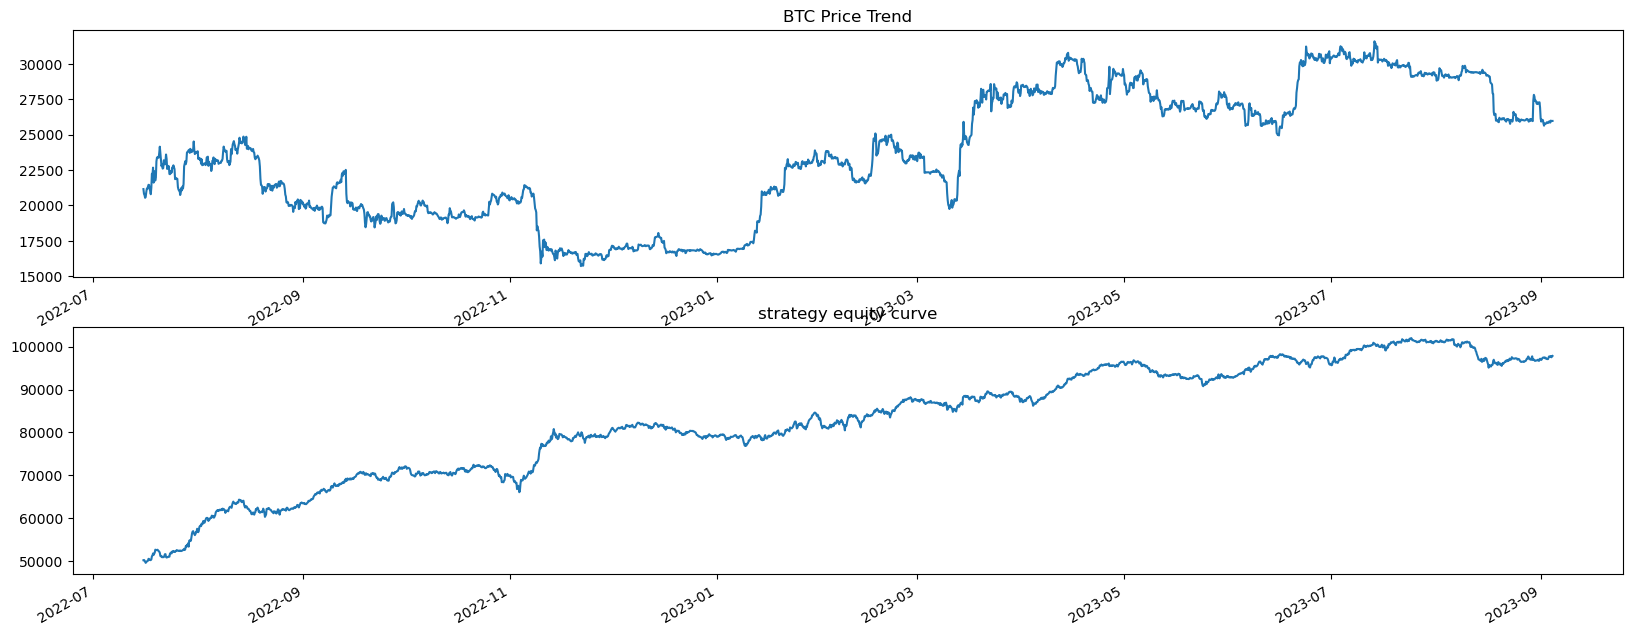

In [ ]:
signal_generator = Signal_generator_IC(data, ['common_add(ts_dema(common_max(common_abs(ts_cci(high,low,close,14)), taker_buy_usd),28), common_max(ts_ht_sine(close), ts_roc(close,5)))'])
signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                         buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')

simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                      position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000,
                                        stop_loss=False, stop_profit=True, stop_loss_threshold=0.2, stop_profit_threshold=0.4, plot=True)
simulator.start_loop()
simulator.result_analysis()

9972 小时, 133515 笔交易, 49161437.718 USDT, PnL 46219.14 USDT = 91.9283%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: 0.0368598%
最大多仓: 1739.093, 最大空仓: -1450.325, maker手续费损耗: 0.00, taker手续费损耗: 14748.43
最大总杠杆: 2.07,最小总杠杆: 0.92,最大多头风险头寸杠杆：0.02, 最大空头风险头寸杠杆：-0.02 
最大回撤: 8.884%,交易胜率: 53.229%,平均盈亏比: 105.270% 年化 PnL: 80.76%
月化交易量: 3549562 USDT, 每小时总换手率: 0.0493, 每小时各标的的平均换手率: 0.0004, 年化夏普率: 3.39, 年化索提诺率: 5.99



,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,80.755267,0.036860,3.392391,8.883746,0.000373,53.229041,105.269802


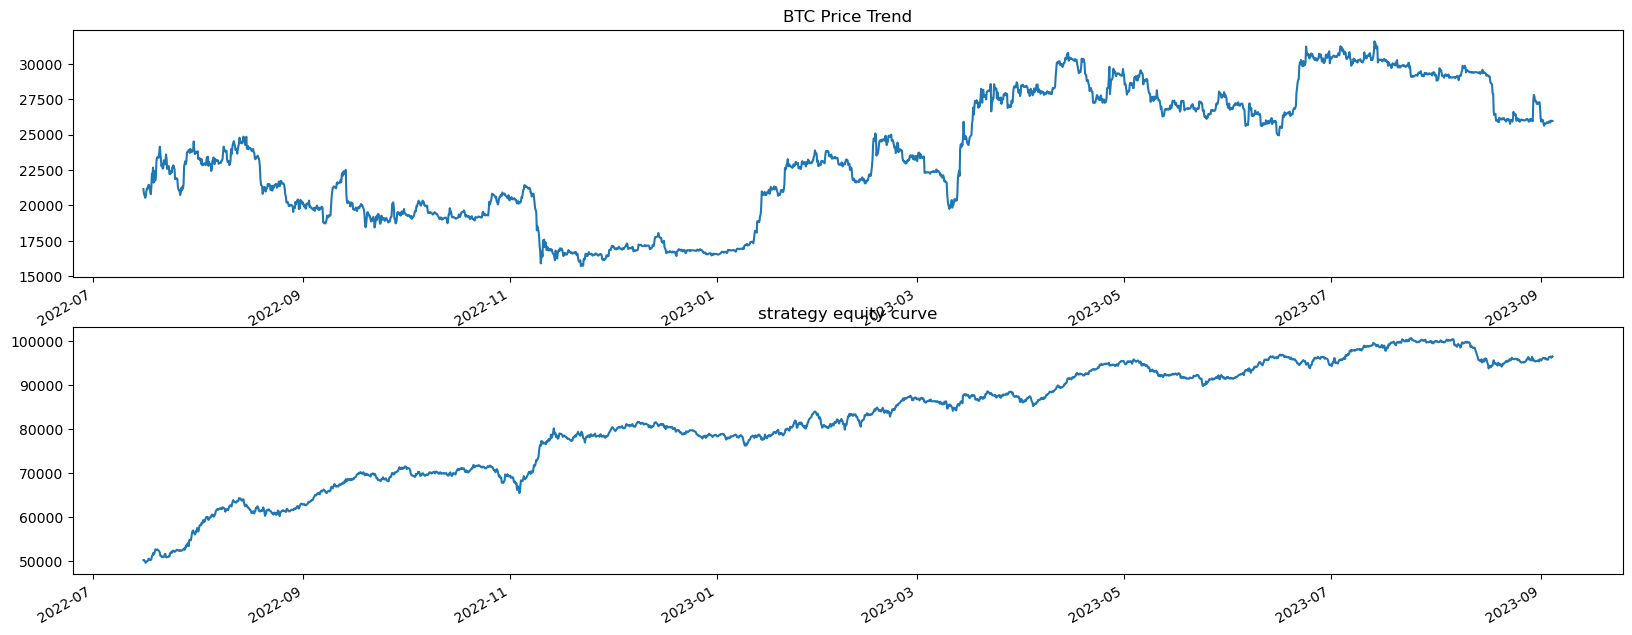

In [ ]:
signal_generator = Signal_generator_IC(data, ['common_add(ts_dema(common_max(common_abs(ts_cci(high,low,close,14)), taker_buy_usd),28), common_max(ts_ht_sine(close), ts_roc(close,5)))'])
signals_matrix, trade_p_matrix, ts_lis, symbol_lis = signal_generator.process(rolling_window_1=180, rolling_window_2=90, rolling_type='avg',
                         buy_threshold=0.8, sell_threshold=0.2, ts_normalized=True, double_normalized=False, method='signal', ic_type='spearmanr',combine_type='weighted')

simulator = multi_factor_simulator_v1_numba(signal_matrix=signals_matrix, trade_p_matrix=trade_p_matrix, symbol_lis=symbol_lis, ts_lis=ts_lis,
                                      position=0, cash=50000, order_size=100000, taker_fee=0.0003, step_size=1, max_leverage=5000,
                                        stop_loss=False, stop_profit=False, stop_loss_threshold=0.2, stop_profit_threshold=0.4, plot=True)
simulator.start_loop()
simulator.result_analysis()